# NFL Player Statistics Exploration

## Libraries

In [231]:
# Load in data exploration libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use for filtering data by date
from datetime import datetime, timedelta

## Data loading and cleaning

In [88]:
# - What am I doing? -
# Read in NFL Player Statistics data

#Player_Dimension = pd.read_csv(r'/Users/jacoblender/Desktop/Football dash/df_players 4.csv')

# Pull Week to week gamelogs for top QBs, RBs, and WR
QuarterbackWeektoWeek2023 = pd.read_csv(r'/Users/jacoblender/Desktop/Football dash/Data/PasserGamelog.csv')
RunningbackWeektoWeek2023 = pd.read_csv(r'/Users/jacoblender/Desktop/Football dash/Data/RunningbackGamelog.csv')
ReceiverWeektoWeek2023 = pd.read_csv(r'/Users/jacoblender/Desktop/Football dash/Data/ReceiverGamelog.csv')

# Create list of dataframes to iterate through.
files = [QuarterbackWeektoWeek2023, RunningbackWeektoWeek2023, ReceiverWeektoWeek2023]

# Removed unnamed index column
for i in range(len(files)):
    files[i].drop(['Unnamed: 0'], axis=1, inplace=True, errors='ignore')

In [89]:
# - What am I doing? -
# PASS_YDS column is being cast as an object type. This is because the commas in integer are messing 
# / with the data type.
# # Remove the commas from the column and then change datatype to int64.
# PassingLeaders2023['PASS_YDS'] = PassingLeaders2023['PASS_YDS'].str.replace(r',', '')
# PassingLeaders2023['PASS_YDS'] = PassingLeaders2023['PASS_YDS'].astype(int)

# # RUSH_YDS column is being cast as an object type. This is because the commas in integer are messing with the data type.
# # Remove the commas from the column and then change datatype to int64.
# RushingLeaders2023['RUSH_YDS'] = RushingLeaders2023['RUSH_YDS'].str.replace(r',', '')
# RushingLeaders2023['RUSH_YDS'] = RushingLeaders2023['RUSH_YDS'].astype(int)

# # REC_YDS column is being cast as an object type. This is because the commas in integer are messing with the data type.
# # Remove the commas from the column and then change datatype to int64.
# ReceivingLeaders2023['REC_YDS'] = ReceivingLeaders2023['REC_YDS'].str.replace(r',', '')
# ReceivingLeaders2023['REC_YDS'] = ReceivingLeaders2023['REC_YDS'].astype(int)

# QBR column is being cast as an object type. This is because the commas in integer are messing with 
# / the data type.
# Remove the commas from the column and then change datatype to int64.
QuarterbackWeektoWeek2023['QBR'] = QuarterbackWeektoWeek2023['QBR'].str.replace(r'.', '')
QuarterbackWeektoWeek2023['QBR'] = QuarterbackWeektoWeek2023['QBR'].str.replace(r'-', '')
QuarterbackWeektoWeek2023['QBR'] = QuarterbackWeektoWeek2023['QBR'].str.replace(r'', '')

# 2. Convert QBR dtype from object to numeric.
QuarterbackWeektoWeek2023['QBR'] = pd.to_numeric(QuarterbackWeektoWeek2023['QBR'], errors='coerce')

In [90]:
# - What am I doing? -
# Drop duplicate rows. We do this because a person can be a leader in Rushing and Receiving. When we put that player from 
# Rushing and Receiver leaderboard in their positional dataframe. There results are then doubled up.

QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop_duplicates()
RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop_duplicates()
ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop_duplicates()

In [91]:
# - What am I doing? -
# I want to look at QBs that have had their reps in regular season game. To be in this dataframe, a player must have taken a 100 snaps.

# Group by 'Player' and sum completions
grouped_QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.groupby('playerName')['ATT'].sum().reset_index()

# Filter players with total completions greater than or equal to 100
filtered_players = grouped_QuarterbackWeektoWeek2023.loc[grouped_QuarterbackWeektoWeek2023['ATT'] >= 50, 'playerName']

# Keep only rows in the original DataFrame for the filtered players
QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023[QuarterbackWeektoWeek2023['playerName'].isin(filtered_players)]

In [92]:
# - What am I doing? -
# I want to look at RBs that have had their reps in regular season game. 
# To be in this dataframe, a player must have taken a 100 snaps.

# Group by 'Player' and sum completions
grouped_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.groupby('playerName')['CAR'].sum().reset_index()

# Filter players with total completions greater than or equal to 100
filtered_players = grouped_RunningbackWeektoWeek2023.loc[grouped_RunningbackWeektoWeek2023['CAR'] >= 50, 'playerName']

# Keep only rows in the original DataFrame for the filtered players
RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023[RunningbackWeektoWeek2023['playerName'].isin(filtered_players)]

In [93]:
# - What am I doing? -
# I want to look at Receivers that have had their reps in regular season game. 
# To be in this dataframe, a player must have taken a 100 snaps.

# Group by 'Player' and sum completions
grouped_ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.groupby('playerName')['TGTS'].sum().reset_index()

# Filter players with total completions greater than or equal to 100
filtered_players = grouped_ReceiverWeektoWeek2023.loc[grouped_ReceiverWeektoWeek2023['TGTS'] >= 50, 'playerName']

# Keep only rows in the original DataFrame for the filtered players
ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023[ReceiverWeektoWeek2023['playerName'].isin(filtered_players)]

In [94]:
# - What am I doing? -
# Get high level information about NFL Player Statistics.

#PassingLeaders2023.info()
#RushingLeaders2023.info()
#ReceivingLeaders2023.info()
QuarterbackWeektoWeek2023.info()
RunningbackWeektoWeek2023.info()
ReceiverWeektoWeek2023.info()
# Player_Dimension.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574 entries, 0 to 583
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        574 non-null    object 
 1   Opponent    574 non-null    object 
 2   Result      574 non-null    object 
 3   CMP         574 non-null    int64  
 4   ATT         574 non-null    int64  
 5   PASS_YDS    574 non-null    int64  
 6   CMP%        574 non-null    float64
 7   PASS_AVG    574 non-null    float64
 8   PASS_TD     574 non-null    int64  
 9   INT         574 non-null    int64  
 10  PASS_LNG    574 non-null    int64  
 11  SACK        574 non-null    int64  
 12  RTG         574 non-null    float64
 13  QBR         573 non-null    float64
 14  RUSH_CAR    574 non-null    int64  
 15  RUSH_YDS    574 non-null    int64  
 16  RUSH_AVG    574 non-null    float64
 17  RUSH_TD     574 non-null    int64  
 18  LNG_RUSH    574 non-null    int64  
 19  playerName  574 non-null    object

In [95]:
# - What am I doing? -
# For [Date] column in Quarterback gamelog dataframe, need to remove day of the week and add year to the date.

# 1. Split [Date] column by a ' ' (space) into [Day of the week] and [MonthYear] columns.
QuarterbackWeektoWeek2023[['Day of the week', 'MonthYear']] = QuarterbackWeektoWeek2023['Date'].str.split(' ', expand=True)

# 2. Split [MonthYear] column by a '/' into [Month] and [Day] columns.
QuarterbackWeektoWeek2023[['Month', 'Day']] = QuarterbackWeektoWeek2023['MonthYear'].str.split('/', expand=True)

# 3. Convert [Month] column from an object to an int.
QuarterbackWeektoWeek2023['Month'] = QuarterbackWeektoWeek2023['Month'].astype(int)

# 4. If game happened after June it was 2023 otherwise it is 2024. The football season runs from August to February. 
# The logic above utilizes that to determine a year when the game took place. This will need to be changed for next season. 
QuarterbackWeektoWeek2023.loc[QuarterbackWeektoWeek2023['Month'] > 6, 'Date'] = QuarterbackWeektoWeek2023['MonthYear'] + '/23'
QuarterbackWeektoWeek2023.loc[QuarterbackWeektoWeek2023['Month'] < 6, 'Date'] = QuarterbackWeektoWeek2023['MonthYear'] + '/24'

# 5. Drop [Day of the week], [Month], [Day], [MonthYear] columns.
QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['Day of the week', 'Month', 'Day', 'MonthYear'])

# 6. Change Date to a datetime datetype
QuarterbackWeektoWeek2023['Date'] = pd.to_datetime(QuarterbackWeektoWeek2023['Date'].str.strip(), format='%m/%d/%y').dt.date

# Print success if data is imported and unnamed index column is removed.
print("Success!")

Success!


In [96]:
# - What am I doing? -
# For [Date] column in Runningback gamelog dataframe, need to remove day of the week and add year to the date.

# 1. Split [Date] column by a ' ' (space) into [Day of the week] and [MonthYear] columns.
RunningbackWeektoWeek2023[['Day of the week', 'MonthYear']] = RunningbackWeektoWeek2023['Date'].str.split(' ', expand=True)

# 2. Split [MonthYear] column by a '/' into [Month] and [Day] columns.
RunningbackWeektoWeek2023[['Month', 'Day']] = RunningbackWeektoWeek2023['MonthYear'].str.split('/', expand=True)

# 3. Convert [Month] column from an object to an int.
RunningbackWeektoWeek2023['Month'] = RunningbackWeektoWeek2023['Month'].astype(int)

# 4. If game happened after June it was 2023 otherwise it is 2024. The football season runs from August to February. 
# The logic above utilizes that to determine a year when the game took place. This will need to be changed for next season. 
RunningbackWeektoWeek2023.loc[RunningbackWeektoWeek2023['Month'] > 6, 'Date'] = RunningbackWeektoWeek2023['MonthYear'] + '/23'
RunningbackWeektoWeek2023.loc[RunningbackWeektoWeek2023['Month'] < 6, 'Date'] = RunningbackWeektoWeek2023['MonthYear'] + '/24'

# 5. Drop [Day of the week], [Month], [Day], [MonthYear] columns.
RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Day of the week', 'Month', 'Day', 'MonthYear'])

# 6. Change Date to a datetime datetype
RunningbackWeektoWeek2023['Date'] = pd.to_datetime(RunningbackWeektoWeek2023['Date'].str.strip(), format='%m/%d/%y').dt.date

# Print success if data is imported and unnamed index column is removed.
print("Success!")

Success!


In [97]:
# - What am I doing? -
# For [Date] column in Receiver gamelog dataframe, need to remove day of the week and add year to the date.

# 1. Split [Date] column by a ' ' (space) into [Day of the week] and [MonthYear] columns.
ReceiverWeektoWeek2023[['Day of the week', 'MonthYear']] = ReceiverWeektoWeek2023['Date'].str.split(' ', expand=True)

# 2. Split [MonthYear] column by a '/' into [Month] and [Day] columns.
ReceiverWeektoWeek2023[['Month', 'Day']] = ReceiverWeektoWeek2023['MonthYear'].str.split('/', expand=True)

# 3. Convert [Month] column from an object to an int.
ReceiverWeektoWeek2023['Month'] = ReceiverWeektoWeek2023['Month'].astype(int)

# 4. If game happened after June it was 2023 otherwise it is 2024. The football season runs from August to February. 
# The logic above utilizes that to determine a year when the game took place. This will need to be changed for next season. 
ReceiverWeektoWeek2023.loc[ReceiverWeektoWeek2023['Month'] > 6, 'Date'] = ReceiverWeektoWeek2023['MonthYear'] + '/23'
ReceiverWeektoWeek2023.loc[ReceiverWeektoWeek2023['Month'] < 6, 'Date'] = ReceiverWeektoWeek2023['MonthYear'] + '/24'

# 5. Drop [Day of the week], [Month], [Day], [MonthYear] columns.
ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop(columns=['Day of the week', 'Month', 'Day', 'MonthYear'])

# 6. Change Date to a datetime datetype
ReceiverWeektoWeek2023['Date'] = pd.to_datetime(ReceiverWeektoWeek2023['Date'].str.strip(), format='%m/%d/%y').dt.date

# Print success if data is imported and unnamed index column is removed.
print("Success!")

Success!


In [98]:
# - What am I doing? -
# Splitting [result] column into a winner score, loser score, and OT column in Quarterback gamelog dataframe

# 1. Split [Score] column into score and result of game (W/L).
QuarterbackWeektoWeek2023['Score'] = QuarterbackWeektoWeek2023['Result'].str[1:]
QuarterbackWeektoWeek2023['Game Result'] = QuarterbackWeektoWeek2023['Result'].str[:1]

# 2. Split [Score] column by a '-' into [Winner Score] and [Loser Score] columns.
QuarterbackWeektoWeek2023[['Winner Score', 'Loser Score']] = QuarterbackWeektoWeek2023['Score'].str.split('-', expand=True)

# 3. Convert [Winner Score] column from an object to an int.
QuarterbackWeektoWeek2023['Winner Score'] = QuarterbackWeektoWeek2023['Winner Score'].astype(int)

# 4. Split [Loser Score] column by a ' ' (space) into [Loser Score] and [OT?] columns.
QuarterbackWeektoWeek2023[['Loser Score', 'OT?']] = QuarterbackWeektoWeek2023['Loser Score'].str.split(' ', expand=True)

# 5. Convert [Loser Score] column from an object to an int.
QuarterbackWeektoWeek2023['Loser Score'] = QuarterbackWeektoWeek2023['Loser Score'].astype(int)

# 6. Drop [Score] and [Result] columns.
QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['Score', 'Result'])

# Print success if data is split and columns are removed.
print("Success!")

Success!


In [99]:
# - What am I doing? -
# Splitting [result] column into a winner score, loser score, and OT column in Runningback gamelog dataframe

# 1. Split [Score] column into score and result of game (W/L).
RunningbackWeektoWeek2023['Score'] = RunningbackWeektoWeek2023['Result'].str[1:]
RunningbackWeektoWeek2023['Game Result'] = RunningbackWeektoWeek2023['Result'].str[:1]

# 2. Split [Score] column by a '-' into [Winner Score] and [Loser Score] columns.
RunningbackWeektoWeek2023[['Winner Score', 'Loser Score']] = RunningbackWeektoWeek2023['Score'].str.split('-', expand=True)

# 3. Convert [Winner Score] column from an object to an int.
RunningbackWeektoWeek2023['Winner Score'] = RunningbackWeektoWeek2023['Winner Score'].astype(int)

# 4. Split [Loser Score] column by a ' ' (space) into [Loser Score] and [OT?] columns.
RunningbackWeektoWeek2023[['Loser Score', 'OT?']] = RunningbackWeektoWeek2023['Loser Score'].str.split(' ', expand=True)

# 5. Convert [Loser Score] column from an object to an int.
RunningbackWeektoWeek2023['Loser Score'] = RunningbackWeektoWeek2023['Loser Score'].astype(int)

# 6. Drop [Score] and [Result] columns.
RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Score', 'Result'])

# Print success if data is split and columns are removed.
print("Success!")

Success!


In [100]:
# - What am I doing? -
# Splitting [result] column into a winner score, loser score, and OT column in Receiver gamelog dataframe

# 1. Split [Score] column into score and result of game (W/L).
ReceiverWeektoWeek2023['Score'] = ReceiverWeektoWeek2023['Result'].str[1:]
ReceiverWeektoWeek2023['Game Result'] = ReceiverWeektoWeek2023['Result'].str[:1]

# 2. Split [Score] column by a '-' into [Winner Score] and [Loser Score] columns.
ReceiverWeektoWeek2023[['Winner Score', 'Loser Score']] = ReceiverWeektoWeek2023['Score'].str.split('-', expand=True)

# 3. Convert [Winner Score] column from an object to an int.
ReceiverWeektoWeek2023['Winner Score'] = ReceiverWeektoWeek2023['Winner Score'].astype(int)

# 4. Split [Loser Score] column by a ' ' (space) into [Loser Score] and [OT?] columns.
ReceiverWeektoWeek2023[['Loser Score', 'OT?']] = ReceiverWeektoWeek2023['Loser Score'].str.split(' ', expand=True)

# 5. Convert [Loser Score] column from an object to an int.
ReceiverWeektoWeek2023['Loser Score'] = ReceiverWeektoWeek2023['Loser Score'].astype(int)

# 6. Drop [Score] and [Result] columns.
ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop(columns=['Score', 'Result'])

# Print success if data is split and columns are removed.
print("Success!")

Success!


In [101]:
# - What am I doing? -
# Looking at [Opponent] column in Quarterback gamelog dataframe to determine if it was a Home/Away game.

# 1. Create function to determine 'Away' (@) or else 'Home'
def home_away_indicator(indicator):
    return 'Away' if '@' in indicator else 'Home'

# 2. Create function to remove 'vs' and '@' from [Opponent] column.
def remove_special_characters(text):
    return text.replace('@', '').replace('vs', '')

# 3. Apply the home_away_indicator() function to [Opponent] column to create a [Home/Away] column.
QuarterbackWeektoWeek2023['Home/Away'] = QuarterbackWeektoWeek2023['Opponent'].apply(lambda x: home_away_indicator(x))

# 4. Apply the remove_special_characters() function to [Opponent] to remove special characters from [Opponent].
QuarterbackWeektoWeek2023['Opponent'] = QuarterbackWeektoWeek2023['Opponent'].apply(lambda x: remove_special_characters(x))

# Print success if column is split and characters are removed.
print("Success!")

Success!


In [102]:
# - What am I doing? -
# Looking at [Opponent] column in Runningback gamelog dataframe to determine if it was a Home/Away game.

# 1. Create function to determine 'Away' (@) or else 'Home'
def home_away_indicator(indicator):
    return 'Away' if '@' in indicator else 'Home'

# 2. Create function to remove 'vs' and '@' from [Opponent] column.
def remove_special_characters(text):
    return text.replace('@', '').replace('vs', '')

# 3. Apply the home_away_indicator() function to [Opponent] column to create a [Home/Away] column.
RunningbackWeektoWeek2023['Home/Away'] = RunningbackWeektoWeek2023['Opponent'].apply(lambda x: home_away_indicator(x))

# 4. Apply the remove_special_characters() function to [Opponent] to remove special characters from [Opponent].
RunningbackWeektoWeek2023['Opponent'] = RunningbackWeektoWeek2023['Opponent'].apply(lambda x: remove_special_characters(x))

# Print success if column is split and characters are removed.
print("Success!")

Success!


In [103]:
# - What am I doing? -
# Looking at [Opponent] column in Receiver gamelog dataframe to determine if it was a Home/Away game.

# 1. Create function to determine 'Away' (@) or else 'Home'
def home_away_indicator(indicator):
    return 'Away' if '@' in indicator else 'Home'

# 2. Create function to remove 'vs' and '@' from [Opponent] column.
def remove_special_characters(text):
    return text.replace('@', '').replace('vs', '')

# 3. Apply the home_away_indicator() function to [Opponent] column to create a [Home/Away] column.
ReceiverWeektoWeek2023['Home/Away'] = ReceiverWeektoWeek2023['Opponent'].apply(lambda x: home_away_indicator(x))

# 4. Apply the remove_special_characters() function to [Opponent] to remove special characters from [Opponent].
ReceiverWeektoWeek2023['Opponent'] = ReceiverWeektoWeek2023['Opponent'].apply(lambda x: remove_special_characters(x))

# Print success if column is split and characters are removed.
print("Success!")

Success!


In [104]:
# - What am I doing? -
# Converting percentage to a decimal for calculation reasons.

# Don't put cap on number of columns shown.
pd.options.display.max_columns = None

# 1. Divide integer by 100 to convert percentage to decimal.
QuarterbackWeektoWeek2023['CMP%'] = QuarterbackWeektoWeek2023['CMP%'] / 100

# Print success if percentage is converted to decimal.
print("Success!")

Success!


In [105]:
# - What am I doing? -
# Look at columns with specific data types (float64(5), int64(13), object(6)).

# Tables: QuarterbackWeektoWeek2023, RunningbackWeektoWeek2023, ReceiverWeektoWeek2023

# Select columns only with specific data types.
RunningbackWeektoWeek2023.select_dtypes(include='float')

RUSH_AVG  REC_AVG
0          8.9      0.0
1          6.8     12.7
2          7.0      0.0
3         13.0      5.0
4          7.3      1.0
...        ...      ...
1068       3.0      1.5
1069       1.3      0.0
1070       2.1      6.0
1071       8.0      7.0
1072       8.0      5.5

[942 rows x 2 columns]

In [106]:
# - What am I doing? -
# Switch dates to datetime format
QuarterbackWeektoWeek2023['Date'] = pd.to_datetime(QuarterbackWeektoWeek2023['Date'])
RunningbackWeektoWeek2023['Date'] = pd.to_datetime(RunningbackWeektoWeek2023['Date'])
ReceiverWeektoWeek2023['Date'] = pd.to_datetime(ReceiverWeektoWeek2023['Date'])


In [107]:
# - What am I doing? -
# Add a column that calculates the points of the players according to Sleeper Scoring

# What do you get points for?

scoring = {
# Passing
'PASS_YDS' : 0.04,
'PASS_TD' : 4,
'INT' : -1,
    
# Rushing
'RUSH_YDS' : 0.1,
'RUSH_TD' : 6
}

# What did each player get for those scoring areas?

def calculate_fantasy_points(row):
    fantasy_points = 0
    for stat, value in scoring.items():
        fantasy_points += row[stat] * value

    return fantasy_points

# Run function and then add to dataframe
QuarterbackWeektoWeek2023['fantasy_points'] = QuarterbackWeektoWeek2023.apply(calculate_fantasy_points, axis=1)

In [108]:
# - What am I doing? -
# Add a column that calculates the points of the players according to Sleeper Scoring

# What do you get points for?

scoring = {
# Rushing
'RUSH_YDS' : 0.1,
'RUSH_TD' : 6,
'LST' : -2,

# Receiving
'REC':0.5,
'REC_YDS':0.1,
'REC_TD':6

}

# What did each player get for those scoring areas?

def calculate_fantasy_points(row):
    fantasy_points = 0
    for stat, value in scoring.items():
        fantasy_points += row[stat] * value

    return fantasy_points

# Run function and then add to dataframe
RunningbackWeektoWeek2023['fantasy_points'] = RunningbackWeektoWeek2023.apply(calculate_fantasy_points, axis=1)

In [109]:
# - What am I doing? -
# Add a column that calculates the points of the players according to Sleeper Scoring

# What do you get points for?

scoring = {
# Rushing
'RUSH_YDS' : 0.1,
'RUSH_TD' : 6,
'LST': -2,

# Receiving
'REC':0.5,
'REC_YDS':0.1,
'REC_TD':6

}

# What did each player get for those scoring areas?

def calculate_fantasy_points(row):
    fantasy_points = 0
    for stat, value in scoring.items():
        fantasy_points += row[stat] * value

    return fantasy_points

# Run function and then add to dataframe
ReceiverWeektoWeek2023['fantasy_points'] = ReceiverWeektoWeek2023.apply(calculate_fantasy_points, axis=1)

In [110]:
# - What am I doing? -
# Add Reception % to Runningback and Wide Receiver

RunningbackWeektoWeek2023['REC%'] = RunningbackWeektoWeek2023['REC'] / RunningbackWeektoWeek2023['TGTS']
ReceiverWeektoWeek2023['REC%'] = ReceiverWeektoWeek2023['REC'] / ReceiverWeektoWeek2023['TGTS']

## Basic Stats

In [111]:
# - What am I doing? -
# Get common statistics to learn more about quarterbacks week to week.
describe_QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['Date'])

# Get common statistics to learn more about quarterbacks week to week.
describe_QuarterbackWeektoWeek2023.describe()

CMP         ATT    PASS_YDS        CMP%    PASS_AVG     PASS_TD  \
count  574.000000  574.000000  574.000000  574.000000  574.000000  574.000000   
mean    19.702091   30.489547  214.733449    0.635105    6.856620    1.254355   
std      7.421498   10.520605   90.354704    0.135296    2.226585    1.101216   
min      0.000000    0.000000   -1.000000    0.000000   -0.100000    0.000000   
25%     15.250000   25.000000  162.000000    0.576000    5.600000    0.000000   
50%     20.000000   32.000000  223.500000    0.647000    6.900000    1.000000   
75%     24.750000   38.000000  276.500000    0.709500    8.100000    2.000000   
max     40.000000   58.000000  470.000000    1.000000   15.300000    5.000000   

              INT    PASS_LNG        SACK         RTG          QBR  \
count  574.000000  574.000000  574.000000  574.000000   573.000000   
mean     0.698606   35.890244    2.313589   87.145819   499.113438   
std      0.863107   16.273089    1.794676   27.748646   258.133915   
min      0.000000    0.000000    0.000000    0.000000     4.000000   
25%      0.000000   25.250000    1.000000   68.825000   287.000000   
50%      0.000000   33.000000    2.000000   87.300000   513.000000   
75%      1.000000   45.000000    3.000000  106.850000   717.000000   
max      4.000000   92.000000   10.000000  158.300000  1000.000000   

         RUSH_CAR    RUSH_YDS    RUSH_AVG     RUSH_TD    LNG_RUSH  \
count  574.000000  574.000000  574.000000  574.000000  574.000000   
mean     3.630662   15.510453    3.550871    0.184669    7.970383   
std      3.058391   18.791751    3.622042    0.446872    7.631397   
min      0.000000   -6.000000   -5.000000    0.000000   -5.000000   
25%      1.000000    1.000000    0.500000    0.000000    2.000000   
50%      3.000000    9.000000    3.150000    0.000000    7.000000   
75%      5.000000   24.000000    5.900000    0.000000   12.000000   
max     18.000000  104.000000   21.000000    2.000000   44.000000   

       Winner Score  Loser Score  fantasy_points  
count    574.000000   574.000000      574.000000  
mean      27.627178    16.047038       15.567213  
std        8.725623     7.922148        8.096243  
min        3.000000     0.000000       -0.880000  
25%       21.000000    10.000000        9.565000  
50%       27.000000    17.000000       15.410000  
75%       33.000000    20.000000       20.875000  
max       70.000000    38.000000       40.660000

In [112]:
# - What am I doing? -
# Get common statistics to learn more about quarterbacks overall season.
describe_QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['Date', 'Game Result', 'Opponent', 'OT?', 'Home/Away'])
# Group by and sum results by player to learn more about quarterbacks overall season.
describe_QuarterbackWeektoWeek2023.groupby('playerName').mean().describe()


CMP        ATT    PASS_YDS       CMP%   PASS_AVG    PASS_TD  \
count  56.000000  56.000000   56.000000  56.000000  56.000000  56.000000   
mean   18.569744  29.013096  200.525756   0.619382   6.557430   1.107858   
std     4.432047   6.373090   56.569760   0.080752   1.287334   0.560801   
min     6.666667   8.833333   58.166667   0.195333   2.066667   0.142857   
25%    16.321429  26.291667  166.725000   0.600861   5.877991   0.666667   
50%    19.191667  30.200000  201.262626   0.635292   6.781795   1.000000   
75%    21.911765  33.345588  242.361765   0.659778   7.277941   1.533333   
max    27.000000  40.800000  323.200000   0.736750   9.781250   2.600000   

             INT   PASS_LNG       SACK         RTG         QBR   RUSH_CAR  \
count  56.000000  56.000000  56.000000   56.000000   56.000000  56.000000   
mean    0.716864  34.474244   2.295359   82.775161  461.718770   3.428941   
std     0.364307   8.789817   0.859094   15.904339  133.810014   2.000050   
min     0.000000  11.000000   0.857143   29.466667  154.600000   1.000000   
25%     0.532353  30.346154   1.700000   73.722500  369.750000   2.046875   
50%     0.677083  36.044444   2.153409   86.208889  480.472727   2.899160   
75%     0.900000  39.946429   2.783333   92.450000  558.679412   4.083333   
max     1.600000  53.000000   5.000000  112.068750  711.000000   9.538462   

        RUSH_YDS   RUSH_AVG    RUSH_TD   LNG_RUSH  Winner Score  Loser Score  \
count  56.000000  56.000000  56.000000  56.000000     56.000000    56.000000   
mean   14.352544   3.349201   0.164696   7.394598     27.336376    15.808511   
std    12.199942   1.725716   0.225415   4.250441      3.194198     3.199323   
min     0.400000   0.140000   0.000000   0.500000     21.500000     9.000000   
25%     4.875000   2.150000   0.000000   3.656250     24.675000    13.491667   
50%     9.960784   3.180000   0.111111   6.966667     27.035948    15.873016   
75%    21.700000   4.845536   0.231900  10.700000     29.361607    17.812500   
max    50.600000   7.740000   1.000000  16.538462     35.562500    23.600000   

       fantasy_points  
count       56.000000  
mean        14.159030  
std          5.027315  
min          3.442857  
25%         10.708250  
50%         14.785882  
75%         18.034286  
max         23.992500

In [113]:
# - What am I doing? -
# Get common statistics to learn more about runningbacks week to week.
describe_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date'])

# Get common statistics to learn more about runningbacks week to week.
describe_RunningbackWeektoWeek2023.describe()

# Conclusions:
# Who had 13 receptions and 16 targets? This would be valuable in PPR league

CAR    RUSH_YDS    RUSH_AVG     RUSH_TD    RUSH_LNG         REC  \
count  942.000000  942.000000  942.000000  942.000000  942.000000  942.000000   
mean    10.836518   45.368365    4.015180    0.321656   14.229299    2.202760   
std      6.526072   34.737167    2.173327    0.586365   11.805116    1.941294   
min      0.000000   -6.000000   -2.500000    0.000000   -2.000000    0.000000   
25%      6.000000   18.000000    2.800000    0.000000    7.000000    1.000000   
50%     10.000000   39.000000    3.800000    0.000000   11.000000    2.000000   
75%     15.000000   65.000000    4.900000    1.000000   17.000000    3.000000   
max     37.000000  203.000000   16.000000    3.000000   83.000000   13.000000   

             TGTS     REC_YDS     REC_AVG      REC_TD     LNG_REC         FUM  \
count  942.000000  942.000000  942.000000  942.000000  942.000000  942.000000   
mean     2.833333   15.787686    5.723461    0.085987    9.540340    0.101911   
std      2.333700   18.510690    6.960585    0.298838   10.699448    0.326343   
min      0.000000  -11.000000   -7.000000    0.000000   -7.000000    0.000000   
25%      1.000000    1.000000    0.300000    0.000000    1.000000    0.000000   
50%      2.000000   10.000000    5.000000    0.000000    7.000000    0.000000   
75%      4.000000   24.000000    8.000000    0.000000   13.000000    0.000000   
max     16.000000  119.000000   80.000000    2.000000   80.000000    2.000000   

              LST          FF     KB  Winner Score  Loser Score  \
count  942.000000  942.000000  942.0    942.000000   942.000000   
mean     0.057325    0.001062    0.0     27.606157    16.234607   
std      0.237111    0.032582    0.0      9.002827     7.816924   
min      0.000000    0.000000    0.0      3.000000     0.000000   
25%      0.000000    0.000000    0.0     21.000000    10.000000   
50%      0.000000    0.000000    0.0     27.000000    17.000000   
75%      0.000000    0.000000    0.0     33.000000    20.000000   
max      2.000000    1.000000    0.0     70.000000    38.000000   

       fantasy_points        REC%  
count      942.000000  798.000000  
mean         9.548195    0.773689  
std          7.462979    0.285705  
min         -0.600000    0.000000  
25%          3.900000    0.666667  
50%          7.650000    0.866071  
75%         13.900000    1.000000  
max         49.300000    1.000000

In [221]:
# - What am I doing? -
# Get common statistics to learn more about runningbacks overall season.
describe_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date', 'Game Result', 'Opponent', 'OT?', 'Home/Away'])

# Get subset of data to include the top rushers by rushing yards, rushing TD, etc.
# describe_RunningbackWeektoWeek2023 = describe_RunningbackWeektoWeek2023.sort_values(by='RUSH_TD', ascending=False).head(24)


# Group by and sum results by player to learn more about runningbacks overall season.
describe_RunningbackWeektoWeek2023.groupby('playerName').sum().describe()

CAR     RUSH_YDS   RUSH_AVG    RUSH_TD    RUSH_LNG        REC  \
count   66.000000    66.000000  66.000000  66.000000   66.000000  66.000000   
mean   154.666667   647.530303  57.307576   4.590909  203.090909  31.439394   
std     67.940094   304.762567  13.982399   3.757975   80.938481  17.828351   
min     50.000000   167.000000  28.600000   0.000000   74.000000   1.000000   
25%     90.750000   374.250000  47.750000   2.000000  141.000000  17.000000   
50%    160.000000   661.500000  59.250000   4.000000  183.000000  29.500000   
75%    216.750000   901.000000  67.475000   6.000000  263.500000  44.000000   
max    272.000000  1459.000000  85.400000  17.000000  430.000000  76.000000   

            TGTS     REC_YDS     REC_AVG     REC_TD     LNG_REC        FUM  \
count  66.000000   66.000000   66.000000  66.000000   66.000000  66.000000   
mean   40.439394  225.333333   81.689394   1.227273  136.166667   1.454545   
std    22.227584  138.742965   36.473958   1.547161   69.200396   1.326439   
min     2.000000   12.000000    5.200000   0.000000   12.000000   0.000000   
25%    22.000000  136.500000   57.400000   0.000000   96.500000   0.000000   
50%    37.500000  197.500000   78.500000   1.000000  128.000000   1.000000   
75%    57.500000  307.250000  103.950000   2.000000  179.750000   2.750000   
max    95.000000  591.000000  161.400000   7.000000  293.000000   5.000000   

             LST         FF    KB  Winner Score  Loser Score  fantasy_points  \
count  66.000000  66.000000  66.0     66.000000    66.000000       66.000000   
mean    0.818182   0.015152   0.0    394.015152   231.712121      136.278788   
std     0.909930   0.123091   0.0     78.430075    49.182788       67.901466   
min     0.000000   0.000000   0.0    174.000000   114.000000       32.400000   
25%     0.000000   0.000000   0.0    349.500000   203.000000       83.525000   
50%     1.000000   0.000000   0.0    393.000000   232.500000      128.900000   
75%     1.000000   0.000000   0.0    451.250000   264.750000      186.725000   
max     4.000000   1.000000   0.0    581.000000   345.000000      357.800000   

            REC%  
count  66.000000  
mean    9.354609  
std     3.100269  
min     1.000000  
25%     7.700000  
50%     9.394048  
75%    11.450595  
max    15.730952

In [115]:
# - What am I doing? -
# Get common statistics to learn more about runningbacks week to week.
describe_ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop(columns=['Date'])

# Get common statistics to learn more about runningbacks week to week.
describe_ReceiverWeektoWeek2023.describe()

REC         TGTS      REC_YDS      REC_AVG       REC_TD  \
count  1353.000000  1353.000000  1353.000000  1353.000000  1353.000000   
mean      4.420547     6.676275    55.070214    12.339098     0.326681   
std       2.562778     3.306821    39.326150     6.906818     0.565010   
min       0.000000     0.000000    -1.000000    -1.000000     0.000000   
25%       3.000000     4.000000    27.000000     8.300000     0.000000   
50%       4.000000     6.000000    48.000000    11.200000     0.000000   
75%       6.000000     9.000000    76.000000    15.000000     1.000000   
max      18.000000    21.000000   265.000000    58.000000     3.000000   

           LNG_REC          CAR     RUSH_YDS     RUSH_AVG     LNG_RUSH  \
count  1353.000000  1353.000000  1353.000000  1353.000000  1353.000000   
mean     22.798965     0.178123     0.974871     0.619956     0.832964   
std      14.523326     0.561375     4.760938     3.008528     3.913473   
min      -1.000000     0.000000   -20.000000   -20.000000   -20.000000   
25%      13.000000     0.000000     0.000000     0.000000     0.000000   
50%      20.000000     0.000000     0.000000     0.000000     0.000000   
75%      30.000000     0.000000     0.000000     0.000000     0.000000   
max      92.000000     5.000000    54.000000    37.000000    45.000000   

           RUSH_TD          FUM          LST           FF      KB  \
count  1353.000000  1353.000000  1353.000000  1353.000000  1353.0   
mean      0.012565     0.054693     0.031042     0.002217     0.0   
std       0.111427     0.233878     0.177708     0.047053     0.0   
min       0.000000     0.000000     0.000000     0.000000     0.0   
25%       0.000000     0.000000     0.000000     0.000000     0.0   
50%       0.000000     0.000000     0.000000     0.000000     0.0   
75%       0.000000     0.000000     0.000000     0.000000     0.0   
max       1.000000     2.000000     2.000000     1.000000     0.0   

       Winner Score  Loser Score  fantasy_points         REC%  
count   1353.000000  1353.000000     1353.000000  1351.000000  
mean      27.798965    16.601626        9.788174     0.660093  
std        8.358787     7.840037        7.160333     0.223899  
min        3.000000     0.000000       -0.600000     0.000000  
25%       22.000000    10.000000        4.500000     0.500000  
50%       27.000000    17.000000        8.000000     0.666667  
75%       33.000000    21.000000       13.600000     0.800000  
max       70.000000    38.000000       45.000000     1.000000

In [116]:
# - What am I doing? -
# Get common statistics to learn more about runningbacks overall season.
describe_ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop(columns=['Date', 'Game Result', 'Opponent', 'OT?', 'Home/Away'])

# Group by and sum results by player to learn more about runningbacks overall season.
describe_ReceiverWeektoWeek2023.groupby('playerName').sum().describe()

REC        TGTS      REC_YDS     REC_AVG     REC_TD     LNG_REC  \
count   90.000000   90.000000    90.000000   90.000000  90.000000   90.000000   
mean    66.455556  100.366667   827.888889  185.497778   4.911111  342.744444   
std     22.763148   31.618317   308.877360   40.776480   2.807072   88.845221   
min     31.000000   50.000000   352.000000  107.000000   0.000000  172.000000   
25%     48.250000   75.000000   583.750000  152.850000   3.000000  287.000000   
50%     63.500000   95.000000   759.500000  181.750000   5.000000  324.000000   
75%     79.750000  122.750000  1023.000000  212.400000   7.000000  400.000000   
max    135.000000  181.000000  1749.000000  291.500000  13.000000  565.000000   

             CAR    RUSH_YDS   RUSH_AVG    LNG_RUSH    RUSH_TD        FUM  \
count  90.000000   90.000000  90.000000   90.000000  90.000000  90.000000   
mean    2.677778   14.655556   9.320000   12.522222   0.188889   0.822222   
std     5.544159   37.128735  19.548569   28.509107   0.668630   0.894148   
min     0.000000  -12.000000 -12.000000  -12.000000   0.000000   0.000000   
25%     0.000000    0.000000   0.000000    0.000000   0.000000   0.000000   
50%     1.000000    0.000000   0.000000    0.000000   0.000000   1.000000   
75%     3.000000    9.000000   6.750000   10.500000   0.000000   1.000000   
max    37.000000  225.000000  86.500000  145.000000   5.000000   3.000000   

             LST         FF    KB  Winner Score  Loser Score  fantasy_points  \
count  90.000000  90.000000  90.0     90.000000    90.000000       90.000000   
mean    0.466667   0.033333   0.0    417.911111   249.577778      147.148889   
std     0.706312   0.180511   0.0     73.090777    45.860310       54.675776   
min     0.000000   0.000000   0.0    253.000000   140.000000       60.700000   
25%     0.000000   0.000000   0.0    376.500000   227.250000      102.750000   
50%     0.000000   0.000000   0.0    420.000000   243.500000      141.550000   
75%     1.000000   0.000000   0.0    466.750000   282.750000      179.125000   
max     3.000000   1.000000   0.0    581.000000   355.000000      333.700000   

            REC%  
count  90.000000  
mean    9.908729  
std     1.810546  
min     5.280844  
25%     8.966667  
50%    10.192045  
75%    11.174026  
max    13.233694

## Null Columns

In [117]:
# - What am I doing? -

# Look at null values of columns for quarterbacks week to week.
QuarterbackWeektoWeek2023.isnull().sum()

Date                0
Opponent            0
CMP                 0
ATT                 0
PASS_YDS            0
CMP%                0
PASS_AVG            0
PASS_TD             0
INT                 0
PASS_LNG            0
SACK                0
RTG                 0
QBR                 1
RUSH_CAR            0
RUSH_YDS            0
RUSH_AVG            0
RUSH_TD             0
LNG_RUSH            0
playerName          0
Game Result         0
Winner Score        0
Loser Score         0
OT?               546
Home/Away           0
fantasy_points      0
dtype: int64

In [118]:
# - What am I doing? -

# Look at null values of columns for runningbacks week to week.
RunningbackWeektoWeek2023.isnull().sum()

Date                0
Opponent            0
CAR                 0
RUSH_YDS            0
RUSH_AVG            0
RUSH_TD             0
RUSH_LNG            0
REC                 0
TGTS                0
REC_YDS             0
REC_AVG             0
REC_TD              0
LNG_REC             0
FUM                 0
LST                 0
FF                  0
KB                  0
playerName          0
Game Result         0
Winner Score        0
Loser Score         0
OT?               901
Home/Away           0
fantasy_points      0
REC%              144
dtype: int64

In [119]:
# - What am I doing? -

# Look at null values of columns for receivers week to week.
ReceiverWeektoWeek2023.isnull().sum()

Date                 0
Opponent             0
REC                  0
TGTS                 0
REC_YDS              0
REC_AVG              0
REC_TD               0
LNG_REC              0
CAR                  0
RUSH_YDS             0
RUSH_AVG             0
LNG_RUSH             0
RUSH_TD              0
FUM                  0
LST                  0
FF                   0
KB                   0
playerName           0
Game Result          0
Winner Score         0
Loser Score          0
OT?               1281
Home/Away            0
fantasy_points       0
REC%                 2
dtype: int64

## Unique values, Histograms, Scatter Plots, KDE, and value counts

In [120]:
# - What am I doing? -

# Show how many unique values are in columns for quarterbacks week to week.
QuarterbackWeektoWeek2023.nunique()

Date               56
Opponent           32
CMP                40
ATT                55
PASS_YDS          263
CMP%              212
PASS_AVG          101
PASS_TD             6
INT                 5
PASS_LNG           78
SACK               11
RTG               414
QBR               424
RUSH_CAR           17
RUSH_YDS           77
RUSH_AVG          117
RUSH_TD             3
LNG_RUSH           41
playerName         56
Game Result         2
Winner Score       42
Loser Score        33
OT?                 1
Home/Away           2
fantasy_points    511
dtype: int64

<Axes: ylabel='Frequency'>

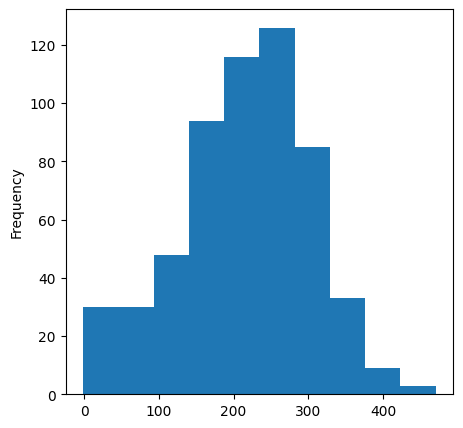

In [121]:
# - What am I doing? -
# Look at distribution of data using histogram. Play with bin size to see different views.

# Resize area of plot
plt.rcParams['figure.figsize'] = (5, 5)

# Plot on histogram
QuarterbackWeektoWeek2023['PASS_YDS'].plot(kind='hist', bins=10)

<Axes: ylabel='Density'>

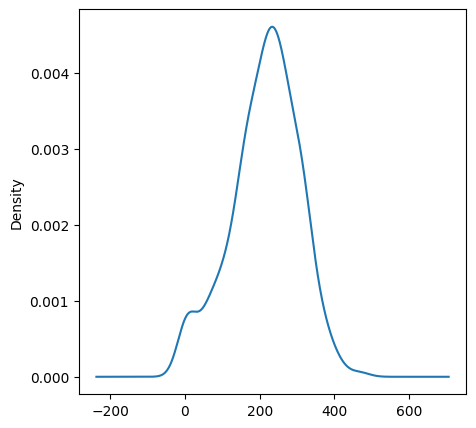

In [122]:
# - What am I doing? -
# Get density of data on ALL features

# Resize area of plot
plt.rcParams['figure.figsize'] = (5, 5)

# Plot on kernel density
QuarterbackWeektoWeek2023['PASS_YDS'].plot(kind='kde')

<Axes: xlabel='PASS_YDS', ylabel='ATT'>

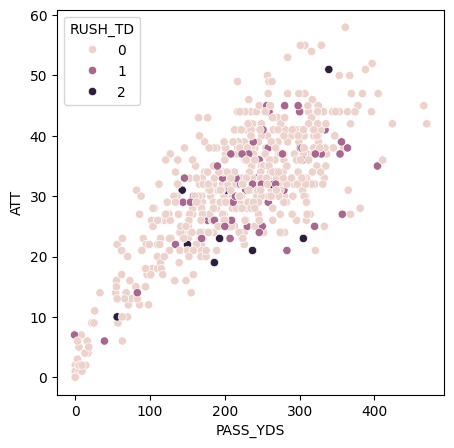

In [123]:
# - What am I doing? -
# Use seaborn to create with color
sns.scatterplot(data=QuarterbackWeektoWeek2023, x="PASS_YDS", y="ATT", hue="RUSH_TD")

In [124]:
# - What am I doing? -
# Look at value distributions

QuarterbackWeektoWeek2023['Opponent'].value_counts()#.head(10).plot()

Opponent
HOU    22
DEN    20
NO     20
CHI    19
PHI    19
NYG    19
IND    19
ARI    19
LV     19
DAL    19
SEA    18
TB     18
DET    18
MIA    18
MIN    18
SF     18
JAX    18
BAL    18
NYJ    18
TEN    18
CIN    17
CLE    17
BUF    17
LAR    17
CAR    17
WSH    17
ATL    17
KC     16
GB     16
NE     16
PIT    16
LAC    16
Name: count, dtype: int64

In [125]:
# - What am I doing? -
# Show how many unique values are in columns for runningbacks week to week.
RunningbackWeektoWeek2023.nunique()

Date               56
Opponent           32
CAR                33
RUSH_YDS          146
RUSH_AVG          106
RUSH_TD             4
RUSH_LNG           64
REC                12
TGTS               14
REC_YDS            89
REC_AVG           147
REC_TD              3
LNG_REC            60
FUM                 3
LST                 3
FF                  2
KB                  1
playerName         66
Game Result         2
Winner Score       42
Loser Score        33
OT?                 1
Home/Away           2
fantasy_points    371
REC%               26
dtype: int64

In [126]:
RunningbackWeektoWeek2023.columns

Index(['Date', 'Opponent', 'CAR', 'RUSH_YDS', 'RUSH_AVG', 'RUSH_TD',
       'RUSH_LNG', 'REC', 'TGTS', 'REC_YDS', 'REC_AVG', 'REC_TD', 'LNG_REC',
       'FUM', 'LST', 'FF', 'KB', 'playerName', 'Game Result', 'Winner Score',
       'Loser Score', 'OT?', 'Home/Away', 'fantasy_points', 'REC%'],
      dtype='object')

<Axes: ylabel='Frequency'>

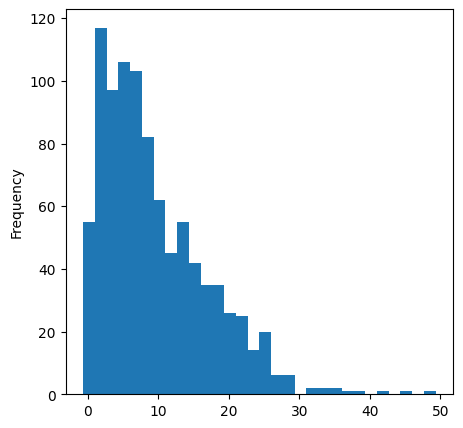

In [127]:
# - What am I doing? -
# Look at distribution of data using histogram. Play with bin size to see different views.

# Resize area of plot
plt.rcParams['figure.figsize'] = (5, 5)

# Use for overall season statistics
grouped_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date', 'Game Result', 'Opponent', 'OT?', 'Home/Away'])
#grouped_RunningbackWeektoWeek2023 = grouped_RunningbackWeektoWeek2023.groupby('playerName').sum()

# Plot on histogram. Use grouped_RunningbackWeektoWeek2023 (player overall season) or RunningbackWeektoWeek2023 (player per game)
grouped_RunningbackWeektoWeek2023['fantasy_points'].plot(kind='hist', bins=30)

<Axes: ylabel='Density'>

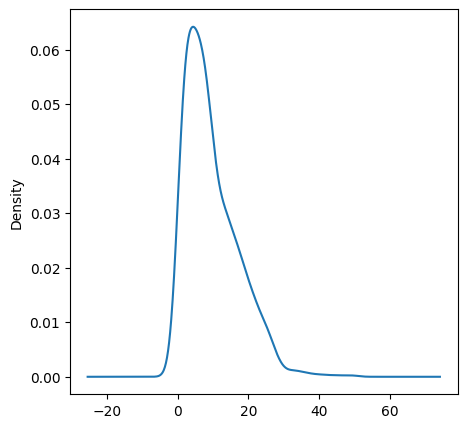

In [128]:
# - What am I doing? -
# Get density of data on ALL features

# Resize area of plot
plt.rcParams['figure.figsize'] = (5, 5)

# Use for overall season statistics
grouped_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date', 'Game Result', 'Opponent', 'OT?', 'Home/Away'])
#grouped_RunningbackWeektoWeek2023 = grouped_RunningbackWeektoWeek2023.groupby('playerName').sum()

# Plot on kernel density
grouped_RunningbackWeektoWeek2023['fantasy_points'].plot(kind='kde')

<Axes: xlabel='RUSH_AVG', ylabel='RUSH_TD'>

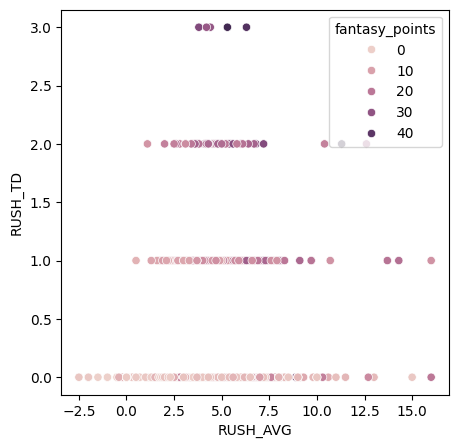

In [129]:
# - What am I doing? -
# Use seaborn to create with color
sns.scatterplot(data=RunningbackWeektoWeek2023, x="RUSH_AVG", y="RUSH_TD", hue="fantasy_points")

In [130]:
RunningbackWeektoWeek2023.columns

Index(['Date', 'Opponent', 'CAR', 'RUSH_YDS', 'RUSH_AVG', 'RUSH_TD',
       'RUSH_LNG', 'REC', 'TGTS', 'REC_YDS', 'REC_AVG', 'REC_TD', 'LNG_REC',
       'FUM', 'LST', 'FF', 'KB', 'playerName', 'Game Result', 'Winner Score',
       'Loser Score', 'OT?', 'Home/Away', 'fantasy_points', 'REC%'],
      dtype='object')

<Axes: xlabel='CAR'>

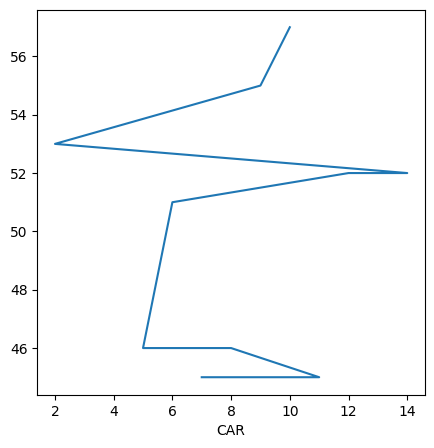

In [131]:
# - What am I doing? -
# Look at value distributions

RunningbackWeektoWeek2023['CAR'].value_counts().head(10).plot()

In [132]:
# - What am I doing? -
# Show how many unique values are in columns for receivers week to week.
ReceiverWeektoWeek2023.nunique()

Date               56
Opponent           32
REC                17
TGTS               21
REC_YDS           172
REC_AVG           239
REC_TD              4
LNG_REC            80
CAR                 6
RUSH_YDS           41
RUSH_AVG           52
LNG_RUSH           39
RUSH_TD             2
FUM                 3
LST                 3
FF                  2
KB                  1
playerName         90
Game Result         2
Winner Score       42
Loser Score        33
OT?                 1
Home/Away           2
fantasy_points    325
REC%               60
dtype: int64

<Axes: ylabel='Frequency'>

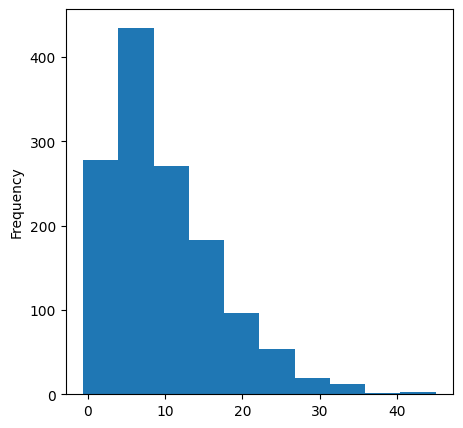

In [133]:
# - What am I doing? -
# Look at distribution of data using histogram. Play with bin size to see different views.
ReceiverWeektoWeek2023['fantasy_points'].plot(kind='hist', bins=10)

<Axes: ylabel='Density'>

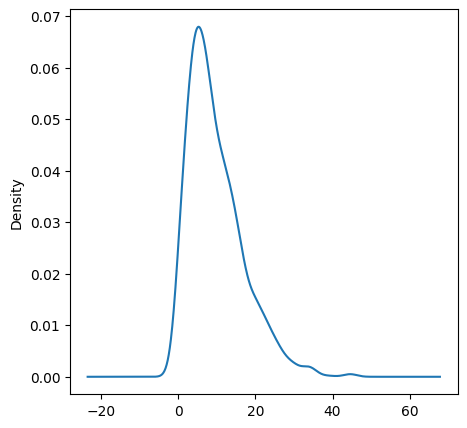

In [134]:
# - What am I doing? -
# Get density of data on ALL features

# Resize area of plot
plt.rcParams['figure.figsize'] = (5, 5)

# Plot on kernel density
ReceiverWeektoWeek2023['fantasy_points'].plot(kind='kde')

<Axes: xlabel='REC_TD', ylabel='fantasy_points'>

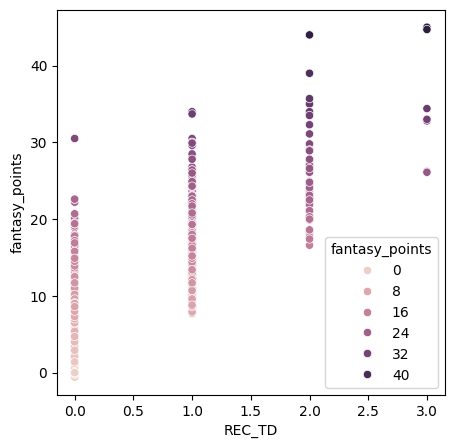

In [135]:
# - What am I doing? -
# Use seaborn to create with color
sns.scatterplot(data=ReceiverWeektoWeek2023, x="REC_TD", y="fantasy_points", hue="fantasy_points")

In [136]:
ReceiverWeektoWeek2023.columns

Index(['Date', 'Opponent', 'REC', 'TGTS', 'REC_YDS', 'REC_AVG', 'REC_TD',
       'LNG_REC', 'CAR', 'RUSH_YDS', 'RUSH_AVG', 'LNG_RUSH', 'RUSH_TD', 'FUM',
       'LST', 'FF', 'KB', 'playerName', 'Game Result', 'Winner Score',
       'Loser Score', 'OT?', 'Home/Away', 'fantasy_points', 'REC%'],
      dtype='object')

<Axes: xlabel='Game Result'>

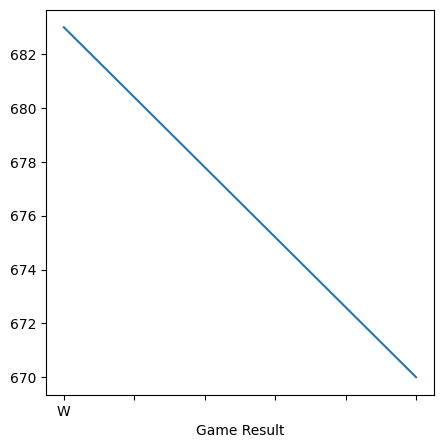

In [137]:
# - What am I doing? -
# Look at value distributions

ReceiverWeektoWeek2023['Game Result'].value_counts().head(10).plot()

## Sort values by column

In [138]:
# - What am I doing? -
# Look at most sacked passers for quarterback week to week.
QuarterbackWeektoWeek2023.sort_values(by='CMP', ascending=False).head(10)

Date Opponent  CMP  ATT  PASS_YDS   CMP%  PASS_AVG  PASS_TD  INT  \
276 2023-09-24      MIN   40   47       405  0.851       8.6        3    0   
188 2023-10-29      PHI   39   52       397  0.750       7.6        4    1   
181 2023-10-05      CHI   37   51       388  0.726       7.6        2    1   
370 2023-10-08      ARI   36   46       317  0.783       6.9        3    1   
359 2023-10-23       SF   35   45       378  0.778       8.4        2    1   
401 2023-09-10      PHI   35   54       316  0.648       5.9        3    1   
174 2023-09-17       SF   34   55       307  0.618       5.6        1    2   
562 2023-09-24      SEA   34   58       361  0.586       6.2        2    0   
21  2023-10-22      BAL   33   53       284  0.623       5.4        0    1   
375 2023-11-06      LAC   33   49       263  0.674       5.4        0    0   

     PASS_LNG  SACK    RTG    QBR  RUSH_CAR  RUSH_YDS  RUSH_AVG  RUSH_TD  \
276        35     1  123.8  958.0         2        11       5.5        0   
188        26     1  114.0  605.0         3        11       3.7        0   
181        41     5   99.1  539.0         4        19       4.8        0   
370        63     3  108.1  608.0         4         7       1.8        0   
359        60     0  107.2  793.0         2        -1      -0.5        0   
401        32     2   91.3  350.0         2        15       7.5        0   
174        20     1   67.8  515.0         4        17       4.3        0   
562        47     3   88.4  495.0         2        11       5.5        0   
21         22     5   68.4  161.0         0         0       0.0        0   
375        33     8   80.6  183.0         2         7       3.5        0   

     LNG_RUSH        playerName Game Result  Winner Score  Loser Score   OT?  \
276        12    Justin Herbert           W            28           24  None   
188         5        Sam Howell           L            38           31  None   
181        10        Sam Howell           L            40           20  None   
370        10        Joe Burrow           W            34           20  None   
359         0      Kirk Cousins           W            22           17  None   
401         8         Mac Jones           L            25           20  None   
174         7  Matthew Stafford           L            30           23  None   
562        10       Andy Dalton           L            37           27  None   
21          0        Jared Goff           L            38            6  None   
375         7       Zach Wilson           L            27            6  None   

    Home/Away  fantasy_points  
276      Away           29.30  
188      Home           31.98  
181      Home           24.42  
370      Away           24.38  
359      Home           22.02  
401      Home           25.14  
174      Home           15.98  
562      Away           23.54  
21       Away           10.36  
375      Home           11.22

In [139]:
# - What am I doing? -
# Look at most sacked passers for runningbacks week to week.
RunningbackWeektoWeek2023.sort_values(by='fantasy_points', ascending=False).head(10)

Date Opponent  CAR  RUSH_YDS  RUSH_AVG  RUSH_TD  RUSH_LNG  REC  \
440 2023-09-24      DEN   18       203      11.3        2        67    4   
66  2023-10-01      ARI   20       106       5.3        3        18    7   
202 2023-09-24      DEN   13        82       6.3        3        20    7   
61  2023-12-17      ARI   18       115       6.4        1        26    5   
244 2023-12-24      WSH   20        95       4.8        2        36   12   
100 2023-11-26      ARI   16       143       8.9        0        56    6   
113 2023-12-17      DAL   25       179       7.2        1        24    2   
195 2023-09-28       GB   32       121       3.8        3        16    2   
208 2023-10-15      CAR   17       115       6.8        2        49    3   
446 2023-10-08      TEN   23       165       7.2        2        56    2   

     TGTS  REC_YDS  REC_AVG  REC_TD  LNG_REC  FUM  LST  FF  KB  \
440     4       30      7.5       2       17    0    0   0   0   
66      8       71     10.1       1       13    0    0   0   0   
202     7       60      8.6       1       19    0    0   0   0   
61      5       72     14.4       2       41    0    0   0   0   
244    16       96      8.0       0       15    0    0   0   0   
100     6       61     10.2       2       24    0    0   0   0   
113     3       42     21.0       1       24    0    0   0   0   
195     2       20     10.0       0       12    0    0   0   0   
208     3       17      5.7       1        8    0    0   0   0   
446     2       30     15.0       0       26    0    0   0   0   

              playerName Game Result  Winner Score  Loser Score   OT?  \
440        De'Von Achane           W            70           20  None   
66   Christian McCaffrey           W            35           16  None   
202       Raheem Mostert           W            70           20  None   
61   Christian McCaffrey           W            45           29  None   
244          Breece Hall           W            30           28  None   
100       Kyren Williams           W            37           14  None   
113           James Cook           W            31           10  None   
195     David Montgomery           W            34           20  None   
208       Raheem Mostert           W            42           21  None   
446            Zack Moss           W            23           16  None   

    Home/Away  fantasy_points      REC%  
440      Home            49.3  1.000000  
66       Home            45.2  0.875000  
202      Home            41.7  1.000000  
61       Away            39.2  1.000000  
244      Home            37.1  0.750000  
100      Away            35.4  1.000000  
113      Home            35.1  0.666667  
195      Away            33.1  1.000000  
208      Home            32.7  1.000000  
446      Home            32.5  1.000000

In [140]:
# - What am I doing? -
# Look at most sacked passers for receivers week to week.
ReceiverWeektoWeek2023.sort_values(by='REC_TD', ascending=False).head(10)

Date Opponent  REC  TGTS  REC_YDS  REC_AVG  REC_TD  LNG_REC  CAR  \
579  2023-10-08      DAL    3     4       67     22.3       3       38    0   
76   2023-10-29      ATL    4     6      128     32.0       3       61    0   
390  2023-10-08      ARI   15    19      192     12.8       3       63    0   
407  2023-10-01      MIA    6     7      120     20.0       3       55    0   
484  2023-11-30      DAL    6     8      134     22.3       3       73    0   
290  2023-10-05      WSH    8    10      230     28.8       3       58    0   
777  2023-12-16      DEN    5     6       56     11.2       3       19    0   
1011 2023-10-01      DEN    7     9       85     12.1       2       22    1   
282  2023-10-01      WSH    9    13      175     19.4       2       59    0   
1370 2023-10-22      DET    4     6       63     15.8       2       22    0   

      RUSH_YDS  RUSH_AVG  LNG_RUSH  RUSH_TD  FUM  LST  FF  KB  \
579          0       0.0         0        0    0    0   0   0   
76           0       0.0         0        0    0    0   0   0   
390          0       0.0         0        0    0    0   0   0   
407          0       0.0         0        0    0    0   0   0   
484          0       0.0         0        0    0    0   0   0   
290          0       0.0         0        0    0    0   0   0   
777          0       0.0         0        0    0    0   0   0   
1011         1       1.0         1        0    0    0   0   0   
282          0       0.0         0        0    0    0   0   0   
1370         0       0.0         0        0    0    0   0   0   

           playerName Game Result  Winner Score  Loser Score   OT? Home/Away  \
579     George Kittle           W            42           10  None      Home   
76    DeAndre Hopkins           W            28           23  None      Home   
390     Ja'Marr Chase           W            34           20  None      Away   
407      Stefon Diggs           W            48           20  None      Home   
484        DK Metcalf           L            41           35  None      Away   
290          DJ Moore           W            40           20  None      Away   
777       Sam LaPorta           W            42           17  None      Home   
1011        Cole Kmet           L            31           28  None      Home   
282        A.J. Brown           W            34           31    OT      Home   
1370     Mark Andrews           W            38            6  None      Home   

      fantasy_points      REC%  
579             26.2  0.750000  
76              32.8  0.666667  
390             44.7  0.789474  
407             33.0  0.857143  
484             34.4  0.750000  
290             45.0  0.800000  
777             26.1  0.833333  
1011            24.1  0.777778  
282             34.0  0.692308  
1370            20.3  0.666667

## Correlation with heat maps

In [141]:
# - What am I doing? -

# Remove text columns for correlation statistics.
Correlation_QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'playerName', 'OT?', 'Home/Away'])

# Looking at correlations between numeric values.
Correlation_QuarterbackWeektoWeek2023.corr()

CMP       ATT  PASS_YDS      CMP%  PASS_AVG   PASS_TD  \
CMP             1.000000  0.921671  0.850199  0.497870  0.402434  0.456229   
ATT             0.921671  1.000000  0.785028  0.239341  0.244797  0.342176   
PASS_YDS        0.850199  0.785028  1.000000  0.436405  0.725019  0.586947   
CMP%            0.497870  0.239341  0.436405  1.000000  0.617117  0.342969   
PASS_AVG        0.402434  0.244797  0.725019  0.617117  1.000000  0.524804   
PASS_TD         0.456229  0.342176  0.586947  0.342969  0.524804  1.000000   
INT             0.139076  0.238646  0.129613 -0.085813 -0.022162 -0.055078   
PASS_LNG        0.361498  0.336505  0.615956  0.277955  0.676753  0.392766   
SACK            0.152075  0.204817  0.062820  0.025064 -0.033494 -0.134033   
RTG             0.437883  0.205385  0.579853  0.699848  0.764965  0.716659   
QBR             0.370086  0.201202  0.488634  0.467833  0.564584  0.547097   
RUSH_CAR        0.141616  0.155383  0.135210  0.074298  0.117736  0.036233   
RUSH_YDS        0.092956  0.126635  0.070954  0.024466  0.041160 -0.008731   
RUSH_AVG        0.078492  0.113700  0.046651  0.007150  0.025807 -0.030421   
RUSH_TD        -0.014430 -0.007013  0.048636  0.021849  0.117338 -0.056607   
LNG_RUSH        0.130249  0.152166  0.113341  0.055101  0.080087  0.021042   
Winner Score    0.074658  0.010718  0.188113  0.097326  0.228577  0.412731   
Loser Score     0.246995  0.224423  0.357097  0.067463  0.237587  0.382514   
fantasy_points  0.629719  0.538234  0.784497  0.403472  0.659952  0.791177   

                     INT  PASS_LNG      SACK       RTG       QBR  RUSH_CAR  \
CMP             0.139076  0.361498  0.152075  0.437883  0.370086  0.141616   
ATT             0.238646  0.336505  0.204817  0.205385  0.201202  0.155383   
PASS_YDS        0.129613  0.615956  0.062820  0.579853  0.488634  0.135210   
CMP%           -0.085813  0.277955  0.025064  0.699848  0.467833  0.074298   
PASS_AVG       -0.022162  0.676753 -0.033494  0.764965  0.564584  0.117736   
PASS_TD        -0.055078  0.392766 -0.134033  0.716659  0.547097  0.036233   
INT             1.000000  0.103132  0.159142 -0.457480 -0.305813  0.023209   
PASS_LNG        0.103132  1.000000  0.000045  0.443854  0.331273  0.092564   
SACK            0.159142  0.000045  1.000000 -0.113416 -0.377385  0.110801   
RTG            -0.457480  0.443854 -0.113416  1.000000  0.692647  0.082325   
QBR            -0.305813  0.331273 -0.377385  0.692647  1.000000  0.145870   
RUSH_CAR        0.023209  0.092564  0.110801  0.082325  0.145870  1.000000   
RUSH_YDS        0.066423  0.065883  0.132791 -0.000433  0.149082  0.783415   
RUSH_AVG        0.076201  0.061492  0.144640 -0.020609  0.093736  0.236737   
RUSH_TD         0.035962  0.069749 -0.020108  0.016543  0.147070  0.397318   
LNG_RUSH        0.025668  0.116010  0.130526  0.055371  0.173842  0.543583   
Winner Score    0.001738  0.114593 -0.109985  0.260603  0.220590 -0.095613   
Loser Score     0.013052  0.176404 -0.113231  0.242454  0.285610  0.109699   
fantasy_points -0.051386  0.516050 -0.037683  0.702904  0.632323  0.391011   

                RUSH_YDS  RUSH_AVG   RUSH_TD  LNG_RUSH  Winner Score  \
CMP             0.092956  0.078492 -0.014430  0.130249      0.074658   
ATT             0.126635  0.113700 -0.007013  0.152166      0.010718   
PASS_YDS        0.070954  0.046651  0.048636  0.113341      0.188113   
CMP%            0.024466  0.007150  0.021849  0.055101      0.097326   
PASS_AVG        0.041160  0.025807  0.117338  0.080087      0.228577   
PASS_TD        -0.008731 -0.030421 -0.056607  0.021042      0.412731   
INT             0.066423  0.076201  0.035962  0.025668      0.001738   
PASS_LNG        0.065883  0.061492  0.069749  0.116010      0.114593   
SACK            0.132791  0.144640 -0.020108  0.130526     -0.109985   
RTG            -0.000433 -0.020609  0.016543  0.055371      0.260603   
QBR             0.149082  0.093736  0.147070  0.173842      0.220590   
RUSH_CAR        0.783415  0.236737 

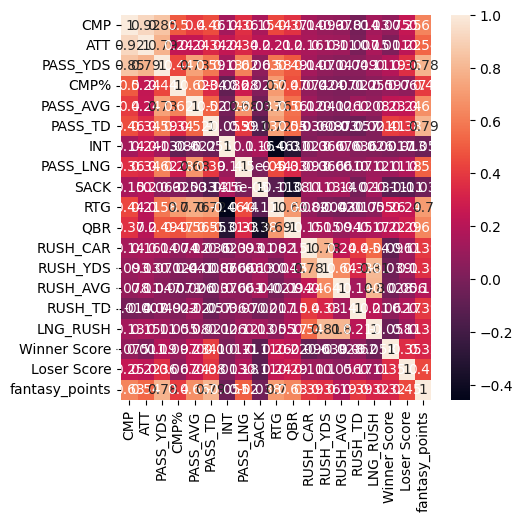

In [142]:
# - What am I doing? -

# Remove text columns for correlation statistics.
Correlation_QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'playerName', 'OT?', 'Home/Away'])

# Visualize correlations for quarterbacks week to week.
# Good step to understand what your focus should be on during data analysis.
sns.heatmap(Correlation_QuarterbackWeektoWeek2023.corr(), annot=True)

plt.rcParams['figure.figsize'] = (11, 13)

plt.show()

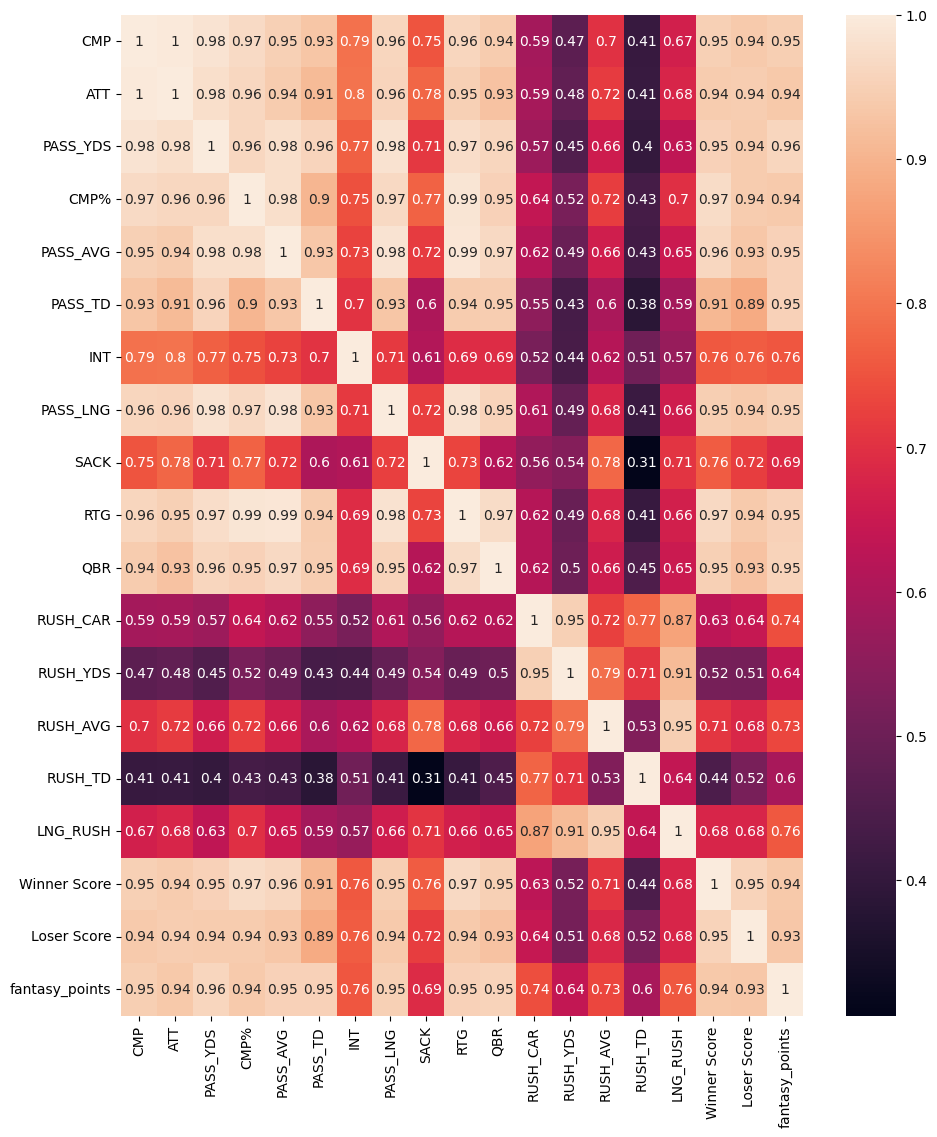

In [143]:
# - What am I doing? -

# Remove text columns for correlation statistics.
Correlation_QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'OT?', 'Home/Away'])

# Visualize correlations for quarterbacks week to week.
# Good step to understand what your focus should be on during data analysis.
sns.heatmap(Correlation_QuarterbackWeektoWeek2023.groupby('playerName').sum().corr(), annot=True)

plt.rcParams['figure.figsize'] = (9, 9)

plt.show()

In [144]:
# - What am I doing? -

# Remove text columns for correlation statistics.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'playerName', 'OT?', 'Home/Away', 'FF', 'KB'])

# Looking at correlations between numeric values.
Correlation_RunningbackWeektoWeek2023.corr()

CAR  RUSH_YDS  RUSH_AVG   RUSH_TD  RUSH_LNG       REC  \
CAR             1.000000  0.822300  0.132854  0.409215  0.430651  0.199657   
RUSH_YDS        0.822300  1.000000  0.547887  0.436971  0.756977  0.147450   
RUSH_AVG        0.132854  0.547887  1.000000  0.177205  0.701357  0.023249   
RUSH_TD         0.409215  0.436971  0.177205  1.000000  0.328772  0.045338   
RUSH_LNG        0.430651  0.756977  0.701357  0.328772  1.000000  0.085008   
REC             0.199657  0.147450  0.023249  0.045338  0.085008  1.000000   
TGTS            0.209843  0.151997  0.022311  0.054750  0.098750  0.928627   
REC_YDS         0.178266  0.133685  0.027037  0.095787  0.078773  0.740171   
REC_AVG         0.131594  0.104245  0.013364  0.088056  0.058379  0.235961   
REC_TD          0.141263  0.176608  0.103690  0.017866  0.135985  0.244689   
LNG_REC         0.189956  0.136114  0.005364  0.066447  0.069397  0.493919   
FUM             0.064715  0.052556  0.019992  0.006226  0.049097  0.081414   
LST             0.030786  0.018722 -0.000866 -0.010467  0.010865  0.037057   
Winner Score   -0.036024  0.071298  0.157364  0.210637  0.131369  0.032970   
Loser Score     0.036333  0.074792  0.042602  0.185924  0.085338  0.035238   
fantasy_points  0.677826  0.765034  0.373254  0.709424  0.569907  0.460087   
REC%           -0.010762  0.007201  0.005052 -0.018144 -0.014751  0.355318   

                    TGTS   REC_YDS   REC_AVG    REC_TD   LNG_REC       FUM  \
CAR             0.209843  0.178266  0.131594  0.141263  0.189956  0.064715   
RUSH_YDS        0.151997  0.133685  0.104245  0.176608  0.136114  0.052556   
RUSH_AVG        0.022311  0.027037  0.013364  0.103690  0.005364  0.019992   
RUSH_TD         0.054750  0.095787  0.088056  0.017866  0.066447  0.006226   
RUSH_LNG        0.098750  0.078773  0.058379  0.135985  0.069397  0.049097   
REC             0.928627  0.740171  0.235961  0.244689  0.493919  0.081414   
TGTS            1.000000  0.688902  0.218977  0.204952  0.457388  0.068373   
REC_YDS         0.688902  1.000000  0.674956  0.396939  0.856135  0.044575   
REC_AVG         0.218977  0.674956  1.000000  0.280735  0.846483  0.031367   
REC_TD          0.204952  0.396939  0.280735  1.000000  0.374319 -0.013673   
LNG_REC         0.457388  0.856135  0.846483  0.374319  1.000000  0.042039   
FUM             0.068373  0.044575  0.031367 -0.013673  0.042039  1.000000   
LST             0.040330 -0.008846 -0.021485  0.020347  0.002858  0.762171   
Winner Score    0.037337  0.083870  0.070973  0.122411  0.074386 -0.026112   
Loser Score     0.039254  0.090011  0.067996  0.050040  0.079560 -0.026462   
fantasy_points  0.434887  0.547611  0.356948  0.459868  0.461021 -0.002673   
REC%            0.020265  0.254478  0.198753  0.099964  0.244725  0.068812   

                     LST  Winner Score  Loser Score  fantasy_points      REC%  
CAR             0.030786     -0.036024     0.036333        0.677826 -0.010762  
RUSH_YDS        0.018722      0.071298     0.074792        0.765034  0.007201  
RUSH_AVG       -0.000866      0.157364     0.042602        0.373254  0.005052  
RUSH_TD        -0.010467      0.210637     0.185924        0.709424 -0.018144  
RUSH_LNG        0.010865      0.131369     0.085338        0.569907 -0.014751  
REC             0.037057      0.032970     0.035238        0.460087  0.355318  
TGTS            0.040330      0.037337     0.039254        0.434887  0.020265  
REC_YDS        -0.008846      0.083870     0.090011        0.547611  0.254478  
REC_AVG        -0.021485      0.070973     0.067996        0.356948  0.198753  
REC_TD          0.020347      0.122411     0.050040        0.459868  0.099964  
LNG_REC         0.002858      0.074386     0.079560        0.461021  0.244725  
FUM             0.762171     -0.026112    -0.026462       -0.002673  0.068812  
LST             1.000000     -0.005841    -0.033638       -0.052249  0.021137  
Winner Score   -0.005841      1.000000     0.353175        0.187356 -0.010007  
Loser Score

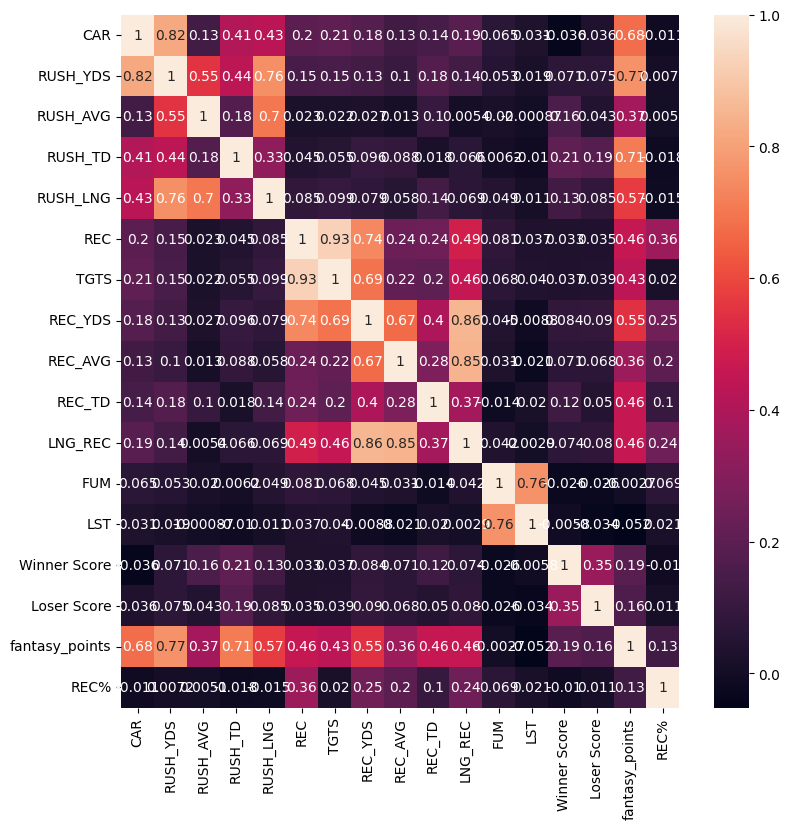

In [145]:
# - What am I doing? -
# Visualize correlations for runningbacks week to week.
# Good step to understand what your focus should be on during data analysis.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'playerName', 'OT?', 'Home/Away', 'FF', 'KB'])


# Get subset of data to include the top rushers by rushing yards, rushing TD, etc.
#Correlation_RunningbackWeektoWeek2023 = Correlation_RunningbackWeektoWeek2023.sort_values(by='fantasy_points', ascending=False).head(10)

sns.heatmap(Correlation_RunningbackWeektoWeek2023.corr(), annot=True)

plt.rcParams['figure.figsize'] = (10, 12)

plt.show()

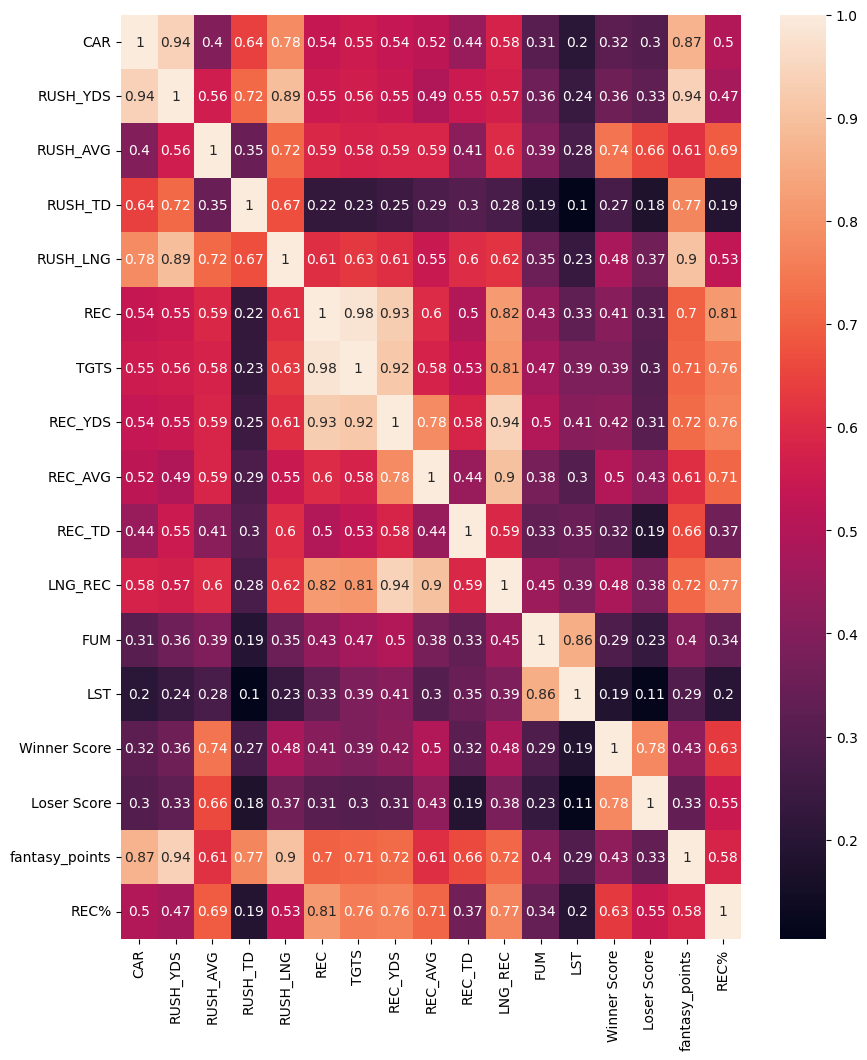

In [146]:
# - What am I doing? -

# Remove text columns for correlation statistics.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

# Get subset of data to include the top rushers by rushing yards, rushing TD, etc.
#Correlation_RunningbackWeektoWeek2023 = Correlation_RunningbackWeektoWeek2023.sort_values(by='fantasy_points', ascending=True).head(40)


# Visualize correlations for quarterbacks week to week.
# Good step to understand what your focus should be on during data analysis.
sns.heatmap(Correlation_RunningbackWeektoWeek2023.groupby('playerName').sum().corr(), annot=True)

plt.rcParams['figure.figsize'] = (12, 12)

plt.show()

In [147]:
# - What am I doing? -

# Remove text columns for correlation statistics.
Correlation_ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop(columns=['Date', 'Opponent', 'Game Result', 'playerName', 'OT?', 'Home/Away'])

# Looking at correlations between numeric values.
Correlation_ReceiverWeektoWeek2023.corr()

REC      TGTS   REC_YDS   REC_AVG    REC_TD   LNG_REC  \
REC             1.000000  0.863278  0.765807  0.030878  0.318804  0.347473   
TGTS            0.863278  1.000000  0.660395  0.019312  0.259332  0.293525   
REC_YDS         0.765807  0.660395  1.000000  0.539866  0.419526  0.763122   
REC_AVG         0.030878  0.019312  0.539866  1.000000  0.247479  0.790108   
REC_TD          0.318804  0.259332  0.419526  0.247479  1.000000  0.354675   
LNG_REC         0.347473  0.293525  0.763122  0.790108  0.354675  1.000000   
CAR             0.019870  0.020726 -0.005659 -0.020912  0.012289  0.002490   
RUSH_YDS        0.011960  0.006624 -0.013766 -0.029286  0.025876  0.009298   
RUSH_AVG        0.014231  0.014701 -0.008933 -0.029666  0.049595  0.003142   
LNG_RUSH        0.015048  0.014222 -0.009757 -0.029380  0.036404  0.012136   
RUSH_TD         0.041055  0.031121  0.014146 -0.019091  0.016993 -0.000266   
FUM             0.165211  0.124285  0.131066  0.017586  0.004621  0.060291   
LST             0.140218  0.119064  0.100656 -0.002135  0.002058  0.040822   
FF             -0.007739  0.009370 -0.005281  0.000416 -0.027266 -0.005841   
KB                   NaN       NaN       NaN       NaN       NaN       NaN   
Winner Score    0.066100  0.023787  0.132125  0.111877  0.201380  0.109726   
Loser Score     0.135090  0.122435  0.177957  0.093582  0.195540  0.126934   
fantasy_points  0.748161  0.637410  0.880302  0.415578  0.764120  0.647794   
REC%            0.441839  0.018431  0.350711  0.142703  0.160591  0.248283   

                     CAR  RUSH_YDS  RUSH_AVG  LNG_RUSH   RUSH_TD       FUM  \
REC             0.019870  0.011960  0.014231  0.015048  0.041055  0.165211   
TGTS            0.020726  0.006624  0.014701  0.014222  0.031121  0.124285   
REC_YDS        -0.005659 -0.013766 -0.008933 -0.009757  0.014146  0.131066   
REC_AVG        -0.020912 -0.029286 -0.029666 -0.029380 -0.019091  0.017586   
REC_TD          0.012289  0.025876  0.049595  0.036404  0.016993  0.004621   
LNG_REC         0.002490  0.009298  0.003142  0.012136 -0.000266  0.060291   
CAR             1.000000  0.697963  0.512519  0.650537  0.401698  0.027148   
RUSH_YDS        0.697963  1.000000  0.870852  0.966540  0.510891 -0.002750   
RUSH_AVG        0.512519  0.870852  1.000000  0.932174  0.415594 -0.016374   
LNG_RUSH        0.650537  0.966540  0.932174  1.000000  0.489922 -0.011830   
RUSH_TD         0.401698  0.510891  0.415594  0.489922  1.000000  0.001993   
FUM             0.027148 -0.002750 -0.016374 -0.011830  0.001993  1.000000   
LST            -0.003567 -0.022681 -0.021911 -0.023381 -0.019712  0.742154   
FF             -0.014963 -0.009656 -0.009718 -0.010037 -0.005318 -0.011028   
KB                   NaN       NaN       NaN       NaN       NaN       NaN   
Winner Score    0.028601  0.006359 -0.005661  0.008334  0.026538  0.042328   
Loser Score     0.006724  0.020558  0.019610  0.020779 -0.005273 -0.003840   
fantasy_points  0.090357  0.122149  0.118916  0.125740  0.151480  0.066903   
REC%           -0.001155  0.011999  0.006461  0.007235  0.011463  0.096357   

                     LST        FF  KB  Winner Score  Loser Score  \
REC             0.140218 -0.007739 NaN      0.066100     0.135090   
TGTS            0.119064  0.009370 NaN      0.023787     0.122435   
REC_YDS         0.100656 -0.005281 NaN      0.132125     0.177957   
REC_AVG        -0.002135  0.000416 NaN      0.111877     0.093582   
REC_TD          0.002058 -0.027266 NaN      0.201380     0.195540   
LNG_REC         0.040822 -0.005841 NaN      0.109726     0.126934   
CAR            -0.003567 -0.014963 NaN      0.028601     0.006724   
RUSH_YDS       -0.022681 -0.009656 NaN      0.006359     0.020558   
RUSH_AVG       -0.021911 -0.009718 NaN     -0.005661     0.019610   
LNG_RUSH       -0.023381 -0.010037 NaN      0.008334     0.020779   
RUSH_TD        -0.019712 -0.005318 NaN      0.026538    -0.005273   
FUM             0.742154 -0.011028 NaN      0.042328    -0.003840   
LS

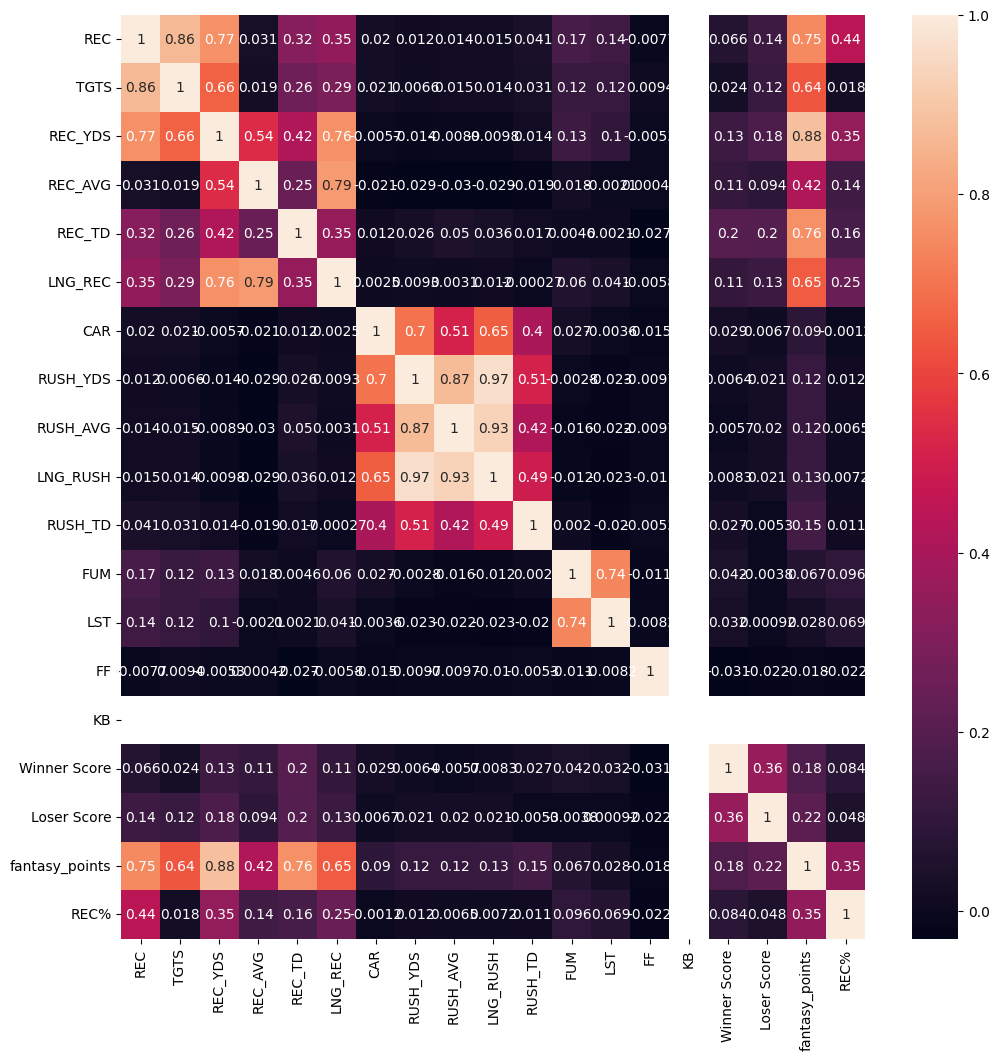

In [148]:
# - What am I doing? -

# Visualize correlations for receivers week to week.
# Good step to understand what your focus should be on during data analysis.
sns.heatmap(Correlation_ReceiverWeektoWeek2023.corr(), annot=True)

plt.rcParams['figure.figsize'] = (12, 15)

plt.show()

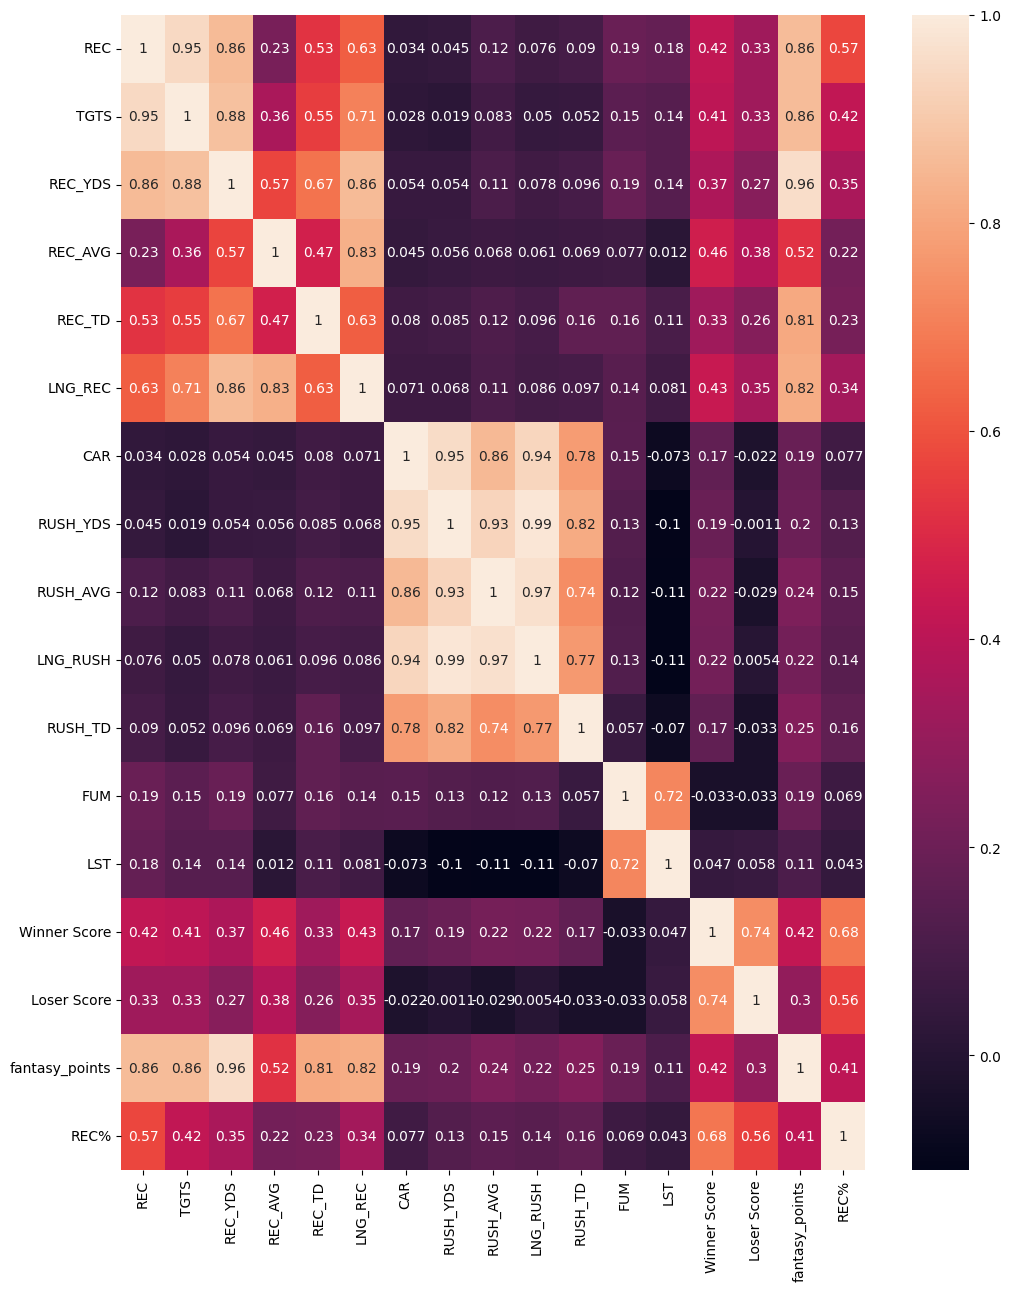

In [149]:
# - What am I doing? -

# Remove text columns for correlation statistics.
Correlation_ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

# Visualize correlations for quarterbacks week to week.
# Good step to understand what your focus should be on during data analysis.
sns.heatmap(Correlation_ReceiverWeektoWeek2023.groupby('playerName').sum().corr(), annot=True)

plt.rcParams['figure.figsize'] = (12, 12)

plt.show()

## Group by

In [150]:
# - What am I doing? -

# Remove text columns for group by statistics.
Groupby_QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['Date', 'Game Result', 'Opponent', 'OT?', 'Home/Away'])

# Group columns to look at Quarterback WeektoWeek 2023 dataset closer.
Groupby_QuarterbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='fantasy_points', ascending=False).head(10)

CMP  ATT  PASS_YDS    CMP%  PASS_AVG  PASS_TD  INT  PASS_LNG  \
playerName                                                                      
Josh Allen       358  539      3947  10.551     119.9       27   17       631   
Jalen Hurts      352  538      3858  11.135     120.7       23   15       617   
Dak Prescott     410  590      4516  11.755     130.1       36    9       647   
Jordan Love      372  579      4159  10.964     123.6       32   11       708   
Lamar Jackson    286  427      3455  10.230     125.9       23    6       610   
Brock Purdy      308  444      4280  11.193     156.5       31   11       696   
Jared Goff       407  605      4575  11.455     130.5       30   12       672   
Baker Mayfield   364  566      4044  10.935     123.5       28   10       680   
C.J. Stroud      319  499      4108   9.497     122.3       23    5       636   
Patrick Mahomes  381  567      3998  10.110     106.7       25   14       590   

                 SACK     RTG      QBR  RUSH_CAR  RUSH_YDS  RUSH_AVG  RUSH_TD  \
playerName                                                                      
Josh Allen         24  1461.3  10434.0       107       510      80.2       14   
Jalen Hurts        36  1498.7   9573.0       157       605      62.9       15   
Dak Prescott       39  1764.8  11856.0        55       242      72.9        2   
Jordan Love        30  1659.2  10365.0        50       247      86.3        4   
Lamar Jackson      36  1540.4   9537.0       135       759      83.2        5   
Brock Purdy        28  1793.1  11376.0        39       144      41.5        2   
Jared Goff         30  1678.4  10047.0        32        21       8.7        2   
Baker Mayfield     40  1613.0   8720.0        62       163      41.9        1   
C.J. Stroud        38  1498.1   8346.0        39       167      46.5        3   
Patrick Mahomes    25  1383.2   9395.0        69       365      74.3        0   

                 LNG_RUSH  Winner Score  Loser Score  fantasy_points  
playerName                                                            
Josh Allen            177           452          265          383.88  
Jalen Hurts           202           506          355          381.82  
Dak Prescott          143           581          243          351.84  
Jordan Love           197           438          295          332.06  
Lamar Jackson         234           461          235          330.10  
Brock Purdy            97           506          242          310.60  
Jared Goff             29           522          334          305.10  
Baker Mayfield        115           417          256          286.06  
C.J. Stroud           104           394          243          286.02  
Patrick Mahomes       169           374          231          282.42

In [151]:
# - What am I doing? -

# Remove text columns for group by statistics.
Groupby_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date', 'Opponent', 'Game Result', 'OT?', 'Home/Away'])

# Group columns to look at Passing Leaders for 2023 dataset closer.
Groupby_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by=['fantasy_points'], ascending=False).head(10)

CAR  RUSH_YDS  RUSH_AVG  RUSH_TD  RUSH_LNG  REC  TGTS  \
playerName                                                                   
Christian McCaffrey  272      1459      85.4       14       430   67    83   
Breece Hall          223       994      73.0        5       410   76    95   
Raheem Mostert       197       927      63.9       17       288   25    31   
Joe Mixon            257      1034      68.9        9       260   52    64   
Kyren Williams       228      1144      59.5       12       241   32    48   
Rachaad White        272       990      62.1        6       254   64    70   
Jahmyr Gibbs         182       945      78.1       10       325   52    71   
Travis Etienne Jr.   221       817      54.5        9       264   51    65   
James Cook           232      1126      75.8        2       287   41    50   
Derrick Henry        268      1070      60.9       11       289   26    34   

                     REC_YDS  REC_AVG  REC_TD  LNG_REC  FUM  LST  FF  KB  \
playerName                                                                 
Christian McCaffrey      564    138.1       7      289    3    2   0   0   
Breece Hall              591    134.4       4      280    2    0   0   0   
Raheem Mostert           175     74.8       3      101    3    1   0   0   
Joe Mixon                376    124.8       3      255    0    0   0   0   
Kyren Williams           206     57.0       3      120    3    2   0   0   
Rachaad White            549    161.4       3      293    3    2   0   0   
Jahmyr Gibbs             316     67.8       1      131    2    1   0   0   
Travis Etienne Jr.       411    118.9       1      219    0    0   0   0   
James Cook               420    158.0       4      237    4    2   0   0   
Derrick Henry            198    112.9       0      161    0    0   0   0   

                     Winner Score  Loser Score  fantasy_points       REC%  
playerName                                                                 
Christian McCaffrey           506          242           357.8  13.582143  
Breece Hall                   420          203           250.5  12.916667  
Raheem Mostert                492          250           240.7  10.433333  
Joe Mixon                     468          282           239.0  13.757143  
Kyren Williams                351          229           237.0   6.950000  
Rachaad White                 417          256           235.9  15.730952  
Jahmyr Gibbs                  460          304           216.1  10.232540  
Travis Etienne Jr.            437          236           208.3  12.233333  
James Cook                    452          265           207.1  11.690476  
Derrick Henry                 391          241           205.8  10.166667

In [152]:
# - What am I doing? -

# Remove text columns for group by statistics.
Groupby_ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop(columns=['Date',  'Opponent', 'Game Result', 'OT?', 'Home/Away'])

# Group columns to look at receiver WeektoWeek 2023 dataset closer.
Groupby_ReceiverWeektoWeek2023.groupby('playerName').sum().sort_values(by='fantasy_points', ascending=False)

REC  TGTS  REC_YDS  REC_AVG  REC_TD  LNG_REC  CAR  \
playerName                                                             
CeeDee Lamb        135   181     1749    221.3      12      516   14   
Tyreek Hill        111   161     1737    244.0      13      565    5   
Amon-Ra St. Brown  119   164     1515    219.0      10      463    4   
Puka Nacua         105   160     1486    241.1       6      525   12   
Mike Evans          79   136     1255    258.0      13      522    0   
...                ...   ...      ...      ...     ...      ...  ...   
Chigoziem Okonkwo   52    73      510    150.5       1      256    2   
Alec Pierce         31    64      493    253.1       2      324    0   
DeMario Douglas     43    70      477    161.3       0      267    8   
Michael Thomas      39    64      448    107.0       1      181    0   
Tanner Hudson       39    50      352    109.9       1      172    0   

                   RUSH_YDS  RUSH_AVG  LNG_RUSH  RUSH_TD  FUM  LST  FF  KB  \
playerName                                                                   
CeeDee Lamb             113      86.5       102        2    3    2   0   0   
Tyreek Hill              12      14.0        22        0    0    0   0   0   
Amon-Ra St. Brown        24      19.5        21        0    1    1   1   0   
Puka Nacua               89      51.0        74        0    1    0   0   0   
Mike Evans                0       0.0         0        0    0    0   0   0   
...                     ...       ...       ...      ...  ...  ...  ..  ..   
Chigoziem Okonkwo         6       6.0         6        0    0    0   0   0   
Alec Pierce               0       0.0         0        0    0    0   0   0   
DeMario Douglas          41      33.0        35        0    3    1   0   0   
Michael Thomas            0       0.0         0        0    0    0   0   0   
Tanner Hudson             0       0.0         0        0    0    0   0   0   

                   Winner Score  Loser Score  fantasy_points       REC%  
playerName                                                               
CeeDee Lamb                 581          243           333.7  12.696306  
Tyreek Hill                 539          283           308.4  10.399373  
Amon-Ra St. Brown           480          310           271.4  11.366570  
Puka Nacua                  476          305           246.0  10.838672  
Mike Evans                  417          256           243.0  10.302778  
...                         ...          ...             ...        ...  
Chigoziem Okonkwo           391          241            83.6  11.262698  
Alec Pierce                 474          321            76.8   8.323810  
DeMario Douglas             323          180            71.3   7.991667  
Michael Thomas              254          158            70.3   5.432540  
Tanner Hudson               335          205            60.7   9.552381  

[90 rows x 19 columns]

## String Contains

In [41]:
# - What am I doing? -

# Look at rows that contain specified string in column.
QuarterbackWeektoWeek2023[QuarterbackWeektoWeek2023['Opponent'].str.contains('MIA')]

Date Opponent  CMP  ATT  PASS_YDS   CMP%  PASS_AVG  PASS_TD  INT  \
34   2023-12-24      MIA   20   32       253  0.625       7.9        2    0   
50   2024-01-07      MIA   30   38       359  0.790       9.4        2    2   
64   2023-10-01      MIA   21   25       320  0.840      12.8        4    0   
177  2023-12-03      MIA   12   23       127  0.522       5.5        0    1   
214  2023-10-22      MIA   23   31       279  0.742       9.0        2    1   
226  2023-12-31      MIA   18   21       321  0.857      15.3        5    0   
277  2023-09-10      MIA   23   33       229  0.697       6.9        1    0   
290  2023-09-24      MIA   23   38       306  0.605       8.1        1    1   
312  2023-10-15      MIA   23   38       217  0.605       5.7        1    0   
373  2023-12-17      MIA    4   11        26  0.364       2.4        0    0   
388  2023-11-19      MIA   24   41       271  0.585       6.6        1    3   
402  2023-10-29      MIA   19   29       161  0.655       5.6        2    1   
405  2023-09-17      MIA   31   42       231  0.738       5.5        1    1   
428  2023-12-11      MIA   23   38       327  0.605       8.6        1    1   
465  2023-10-08      MIA    9   12        86  0.750       7.2        0    0   
511  2023-10-08      MIA   14   20       119  0.700       6.0        0    0   
528  2023-12-17      MIA   14   26       110  0.539       4.2        0    2   
658  2023-12-31      MIA   18   21       321  0.857      15.3        5    0   
691  2023-10-22      MIA   23   31       279  0.742       9.0        2    1   
703  2024-01-07      MIA   30   38       359  0.790       9.4        2    2   
717  2023-10-01      MIA   21   25       320  0.840      12.8        4    0   
769  2023-09-24      MIA   23   38       306  0.605       8.1        1    1   
794  2023-12-03      MIA   12   23       127  0.522       5.5        0    1   
822  2023-10-15      MIA   23   38       217  0.605       5.7        1    0   
851  2023-12-24      MIA   20   32       253  0.625       7.9        2    0   
873  2023-09-10      MIA   23   33       229  0.697       6.9        1    0   
880  2023-12-17      MIA    4   11        26  0.364       2.4        0    0   
895  2023-10-08      MIA   14   20       119  0.700       6.0        0    0   
906  2023-10-08      MIA    9   12        86  0.750       7.2        0    0   

     PASS_LNG  SACK    RTG    QBR  RUSH_CAR  RUSH_YDS  RUSH_AVG  RUSH_TD  \
34         49     4  107.9  540.0         5        25       5.0        0   
50         46     3  101.6  721.0        15        67       4.5        0   
64         55     2  158.3  909.0         4        17       4.3        1   
177        33     3   50.5  180.0         4        21       5.3        2   
214        42     3  109.5  803.0        11        21       1.9        1   
226        75     1  158.3  956.0         6        35       5.8        0   
277        36     3   99.2  525.0         5        17       3.4        1   
290        46     1   83.9  689.0         0         0       0.0        0   
312        27     4   85.1  514.0         0         0       0.0        0   
373         8     4   44.9   35.0         0         0       0.0        0   
388        46     2   56.0  194.0         1         3       3.0        0   
402        24     3   88.4  464.0         1        -2      -2.0        0   
405        14     4   84.5  648.0         5        25       5.0        0   
428        45     1   86.2  463.0         4        15       3.8        0   
465        20     1   94.4  556.0         3        14       4.7        0   
511        21     6   85.2  577.0         4        24       6.0        0   
528        21     2   32.5  255.0         0         0       0.0        0   
658        75     1  158.3  956.0         6        35       5.8        0   
691        42     3  109.5  803.0        11        21       1.9        1   
703        46     3  101.6  721.0        15        67       4.5        0   
717        55     2  158.3  909.0         4 

In [42]:
# - What am I doing? -

# Look at rows that contain specified string in column.
RunningbackWeektoWeek2023[RunningbackWeektoWeek2023['Opponent'].str.contains('ATL')]

Date Opponent  CAR  RUSH_YDS  RUSH_AVG  RUSH_TD  RUSH_LNG  REC  \
21    2023-10-29      ATL   22       101       4.6        0        14    4   
38    2023-10-08      ATL    0         0       0.0        0         0    0   
81    2023-10-29      ATL   22       101       4.6        0        14    4   
146   2023-11-12      ATL   16        73       4.6        0        11    0   
254   2023-12-03      ATL   13        16       1.2        0         9    6   
262   2023-12-10      ATL   25       102       4.1        0        12    2   
274   2023-10-22      ATL   13        34       2.6        0        13    6   
313   2023-09-24      ATL   17        80       4.7        0        21    1   
358   2023-09-10      ATL    9        60       6.7        0        21    2   
360   2023-12-17      ATL   22        87       4.0        0        22    2   
373   2023-10-08      ATL    0         0       0.0        0         0    0   
488   2023-12-24      ATL   18        43       2.4        1        13    0   
508   2023-10-15      ATL   10        31       3.1        0         9    2   
522   2023-11-05      ATL   16        44       2.8        0         8    2   
536   2023-11-26      ATL   15        69       4.6        0        16    4   
622   2023-09-17      ATL   15        55       3.7        0         8    1   
629   2023-12-31      ATL   18       124       6.9        1        38    2   
702   2023-12-17      ATL    6         2       0.3        0         3    2   
708   2023-09-10      ATL   18        72       4.0        0        10    4   
722   2023-10-08      ATL   20        66       3.3        0        15    1   
858   2024-01-07      ATL   14        26       1.9        1         8    3   
861   2023-11-26      ATL    2         6       3.0        0         3    2   
1099  2023-12-03      ATL   13        16       1.2        0         9    6   
1123  2023-12-10      ATL   25       102       4.1        0        12    2   
1135  2023-10-22      ATL   13        34       2.6        0        13    6   
1178  2023-11-26      ATL   15        69       4.6        0        16    4   

      TGTS  REC_YDS  REC_AVG  REC_TD  LNG_REC  FUM  LST  FF  KB  \
21       4       21      5.3       0        8    0    0   0   0   
38       1        0      0.0       0        0    0    0   0   0   
81       4       21      5.3       0        8    0    0   0   0   
146      0        0      0.0       0        0    0    0   0   0   
254      8       29      4.8       0        9    0    0   0   0   
262      2       33     16.5       1       31    1    0   0   0   
274      6       65     10.8       0       22    0    0   0   0   
313      2        2      2.0       0        2    0    0   0   0   
358      2        9      4.5       0        7    0    0   0   0   
360      2       16      8.0       0       10    0    0   0   0   
373      1        0      0.0       0        0    0    0   0   0   
488      1        0      0.0       0        0    0    0   0   0   
508      2       25     12.5       1       24    0    0   0   0   
522      2       49     24.5       1       47    0    0   0   0   
536      5       50     12.5       0       20    0    0   0   0   
622      1        8      8.0       0        8    0    0   0   0   
629      3        5      2.5       0        5    0    0   0   0   
702      2       11      5.5       0        7    0    0   0   0   
708      6       26      6.5       0       11    1    1   0   0   
722      1       16     16.0       0       16    0    0   0   0   
858      3        8      2.7       0        5    0    0   0   0   
861      2        4      2.0       0        4    0    0   0   0   
1099     8       29      4.8       0        9    0    0   0   0   
1123     2       33     16.5       1       31    1    0   0   0   
1135     6       65     10.8       0       22    0    0   0   0   
1178     5       50     12.5       0       20    0    0   0   0   

              playerName Game Result  Winner Score  Loser Score   OT?  \
21         Derrick Hen

In [43]:
# - What am I doing? -

# Look at rows that contain specified string in column.
ReceiverWeektoWeek2023[ReceiverWeektoWeek2023['Opponent'].str.contains('DEN')]

Date Opponent  REC  TGTS  REC_YDS  REC_AVG  REC_TD  LNG_REC  CAR  \
0     2023-12-10      DEN    6    12       68     11.3       0       22    0   
40    2023-10-22      DEN    1     1       17     17.0       0       17    1   
43    2024-01-07      DEN    3     5       61     20.3       1       33    1   
58    2023-09-10      DEN    9    10       81      9.0       2       21    0   
215   2023-09-24      DEN    9    11      157     17.4       1       54    0   
243   2023-12-16      DEN    7     9      112     16.0       1       29    0   
299   2023-10-01      DEN    8     9      131     16.4       1       29    0   
319   2023-12-03      DEN    9    12      191     21.2       1       59    0   
351   2023-11-26      DEN    2     6       16      8.0       0       11    0   
364   2023-12-10      DEN    6    12       68     11.3       0       22    0   
404   2023-11-13      DEN    3     5       34     11.3       0       14    0   
424   2024-01-07      DEN    5     8       46      9.2       1       17    0   
432   2023-09-10      DEN    6     9       66     11.0       0       18    0   
538   2023-10-08      DEN    3     7       54     18.0       0       32    0   
643   2023-09-17      DEN    5     6       54     10.8       1       30    0   
648   2023-10-29      DEN    6     9       58      9.7       0       19    0   
649   2023-10-12      DEN    9     9      124     13.8       0       40    0   
675   2023-11-19      DEN    4     7       55     13.8       0       29    0   
692   2023-10-29      DEN    4     5       56     14.0       0       39    0   
693   2023-10-12      DEN    4     4       72     18.0       0       28    0   
706   2023-11-19      DEN    3     6       44     14.7       0       18    0   
777   2023-12-16      DEN    5     6       56     11.2       3       19    0   
794   2023-11-26      DEN    6     9       59      9.8       0       17    0   
832   2024-01-07      DEN    3     5       61     20.3       1       33    1   
847   2023-09-10      DEN    9    10       81      9.0       2       21    0   
1139  2023-11-26      DEN    3     9       44     14.7       0       26    1   
1291  2023-10-22      DEN    1     1       17     17.0       0       17    1   

      RUSH_YDS  RUSH_AVG  LNG_RUSH  RUSH_TD  FUM  LST  FF  KB  \
0            0       0.0         0        0    0    0   0   0   
40           1       1.0         1        0    0    0   0   0   
43           5       5.0         5        1    0    0   0   0   
58           0       0.0         0        0    0    0   0   0   
215          0       0.0         0        0    0    0   0   0   
243          0       0.0         0        0    0    0   0   0   
299          0       0.0         0        0    0    0   0   0   
319          0       0.0         0        0    0    0   0   0   
351          0       0.0         0        0    0    0   0   0   
364          0       0.0         0        0    0    0   0   0   
404          0       0.0         0        0    0    0   0   0   
424          0       0.0         0        0    0    0   0   0   
432          0       0.0         0        0    0    0   0   0   
538          0       0.0         0        0    0    0   0   0   
643          0       0.0         0        0    0    0   0   0   
648          0       0.0         0        0    0    0   0   0   
649          0       0.0         0        0    0    0   0   0   
675          0       0.0         0        0    0    0   0   0   
692          0       0.0         0        0    0    0   0   0   
693          0       0.0         0        0    0    0   0   0   
706          0       0.0         0        0    0    0   0   0   
777          0       0.0         0        0    0    0   0   0   
794          0       0.0         0        0    0    0   0   0   
832          5       5.0         5        1    0    0   0   0   
847          0       0.0         0        0    0    0   0   0   
1139         0       0.0         0        0    1    1   0   0   
1291         1  

## Pair Plots

In [122]:
QuarterbackWeektoWeek2023.columns

Index(['Date', 'Opponent', 'CMP', 'ATT', 'PASS_YDS', 'CMP%', 'PASS_AVG',
       'PASS_TD', 'INT', 'PASS_LNG', 'SACK', 'RTG', 'QBR', 'RUSH_CAR',
       'RUSH_YDS', 'RUSH_AVG', 'RUSH_TD', 'LNG_RUSH', 'playerName',
       'Game Result', 'Winner Score', 'Loser Score', 'OT?', 'Home/Away'],
      dtype='object')

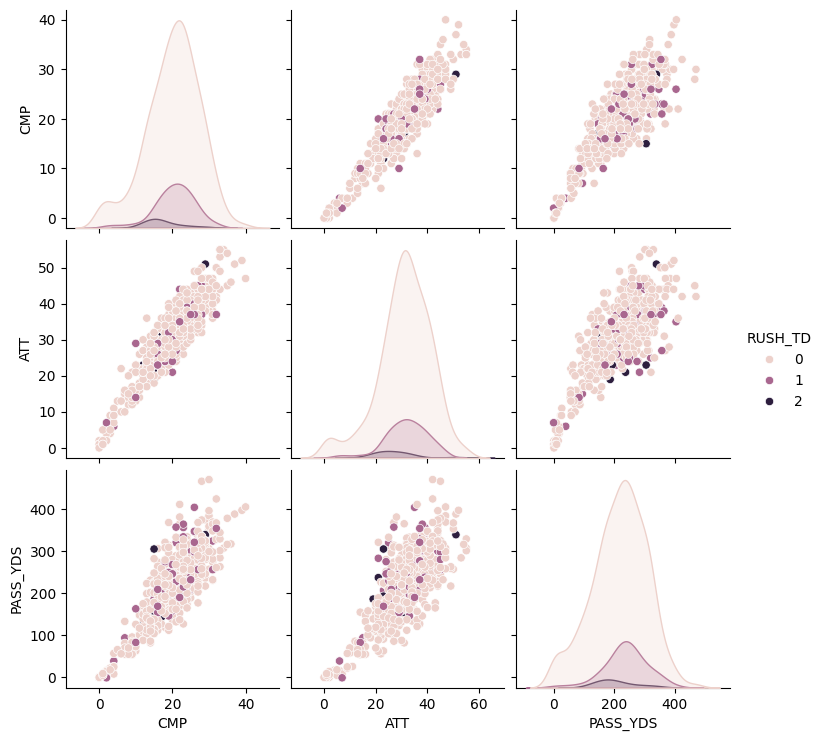

In [125]:
# - What am I doing? -
# What if we want to compare more than two features?

# Pick columns to use for plot
MultiScatter_QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023[['CMP','ATT','PASS_YDS', 'RUSH_TD']]

# Use pairplot to compare more features
sns.pairplot(MultiScatter_QuarterbackWeektoWeek2023, hue="RUSH_TD")

In [272]:
# - What am I doing? -
# Look at columns

RunningbackWeektoWeek2023.columns

Index(['Date', 'Opponent', 'CAR', 'RUSH_YDS', 'RUSH_AVG', 'RUSH_TD',
       'RUSH_LNG', 'REC', 'TGTS', 'REC_YDS', 'REC_AVG', 'REC_TD', 'LNG_REC',
       'FUM', 'LST', 'FF', 'KB', 'playerName', 'Game Result', 'Winner Score',
       'Loser Score', 'OT?', 'Home/Away', 'fantasy_points', 'REC%'],
      dtype='object')

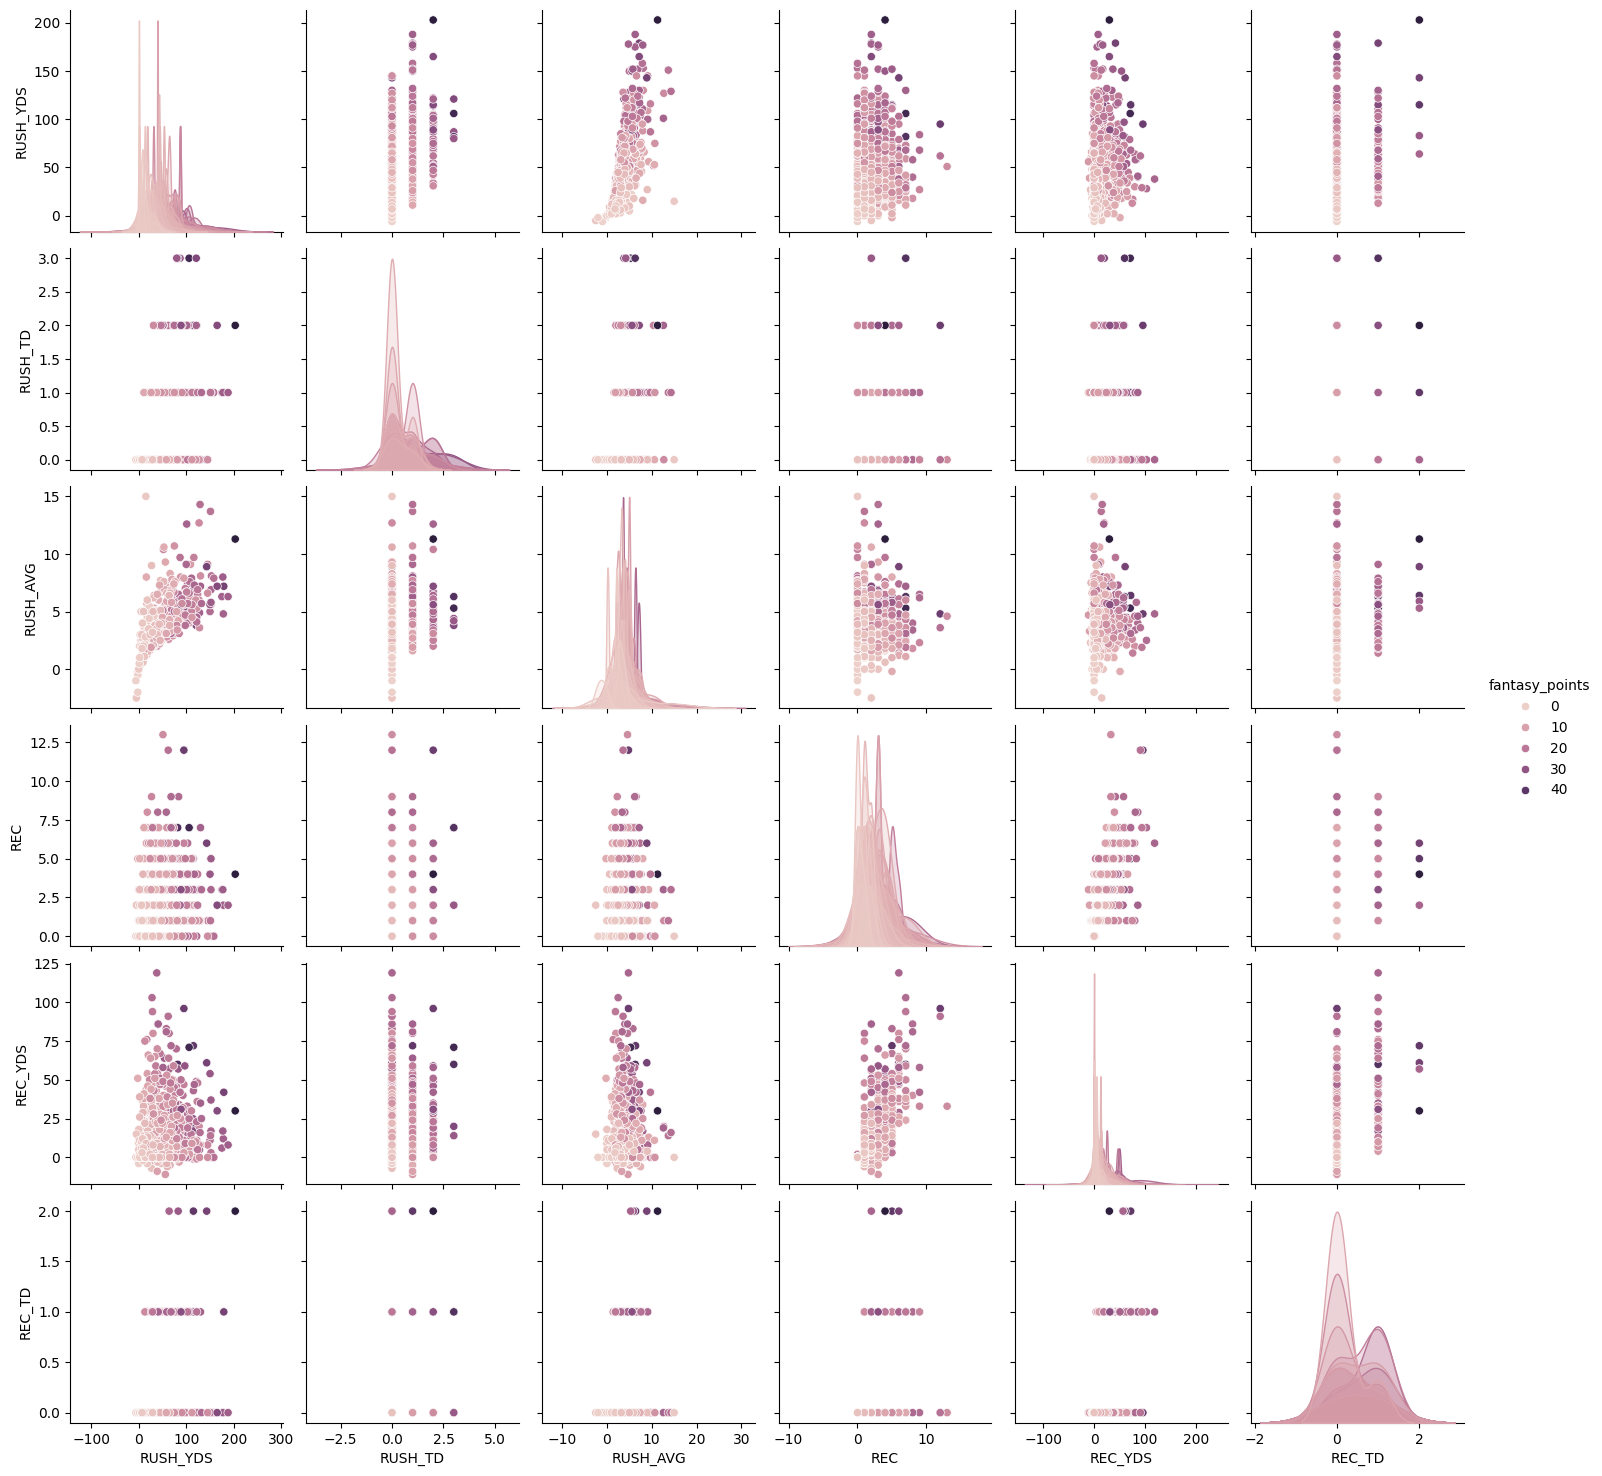

In [303]:
# - What am I doing? -
# What if we want to compare more than two features?

# Pick columns to use for plot
MultiScatter_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023[['RUSH_YDS', 'RUSH_TD', 'RUSH_AVG', 'REC', 'REC_YDS', 'REC_TD', 'fantasy_points']]

# Get subset of data to include the top rushers by rushing yards, rushing TD, etc.
# MultiScatter_RunningbackWeektoWeek2023 = MultiScatter_RunningbackWeektoWeek2023.sort_values(by='fantasy_points', ascending=False).head(20)


# Use pairplot to compare more features
sns.pairplot(MultiScatter_RunningbackWeektoWeek2023, hue="fantasy_points")

In [130]:
# - What am I doing? -
# Look at columns

ReceiverWeektoWeek2023.columns

Index(['Date', 'Opponent', 'REC', 'TGTS', 'REC_YDS', 'REC_AVG', 'REC_TD',
       'LNG_REC', 'CAR', 'RUSH_YDS', 'RUSH_AVG', 'LNG_RUSH', 'RUSH_TD', 'FUM',
       'LST', 'FF', 'KB', 'playerName', 'Game Result', 'Winner Score',
       'Loser Score', 'OT?', 'Home/Away'],
      dtype='object')

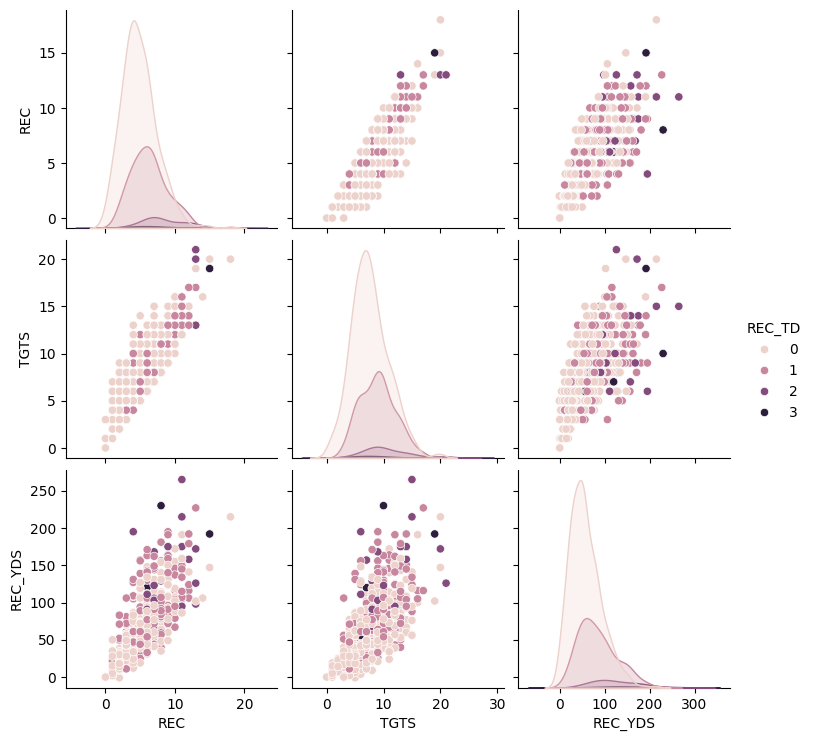

In [132]:
# - What am I doing? -
# What if we want to compare more than two features?

# Pick columns to use for plot
MultiScatter_ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023[['REC','TGTS','REC_YDS', 'REC_TD']]

# Use pairplot to compare more features
sns.pairplot(MultiScatter_ReceiverWeektoWeek2023, hue="REC_TD")

## Box Plots

<Axes: >

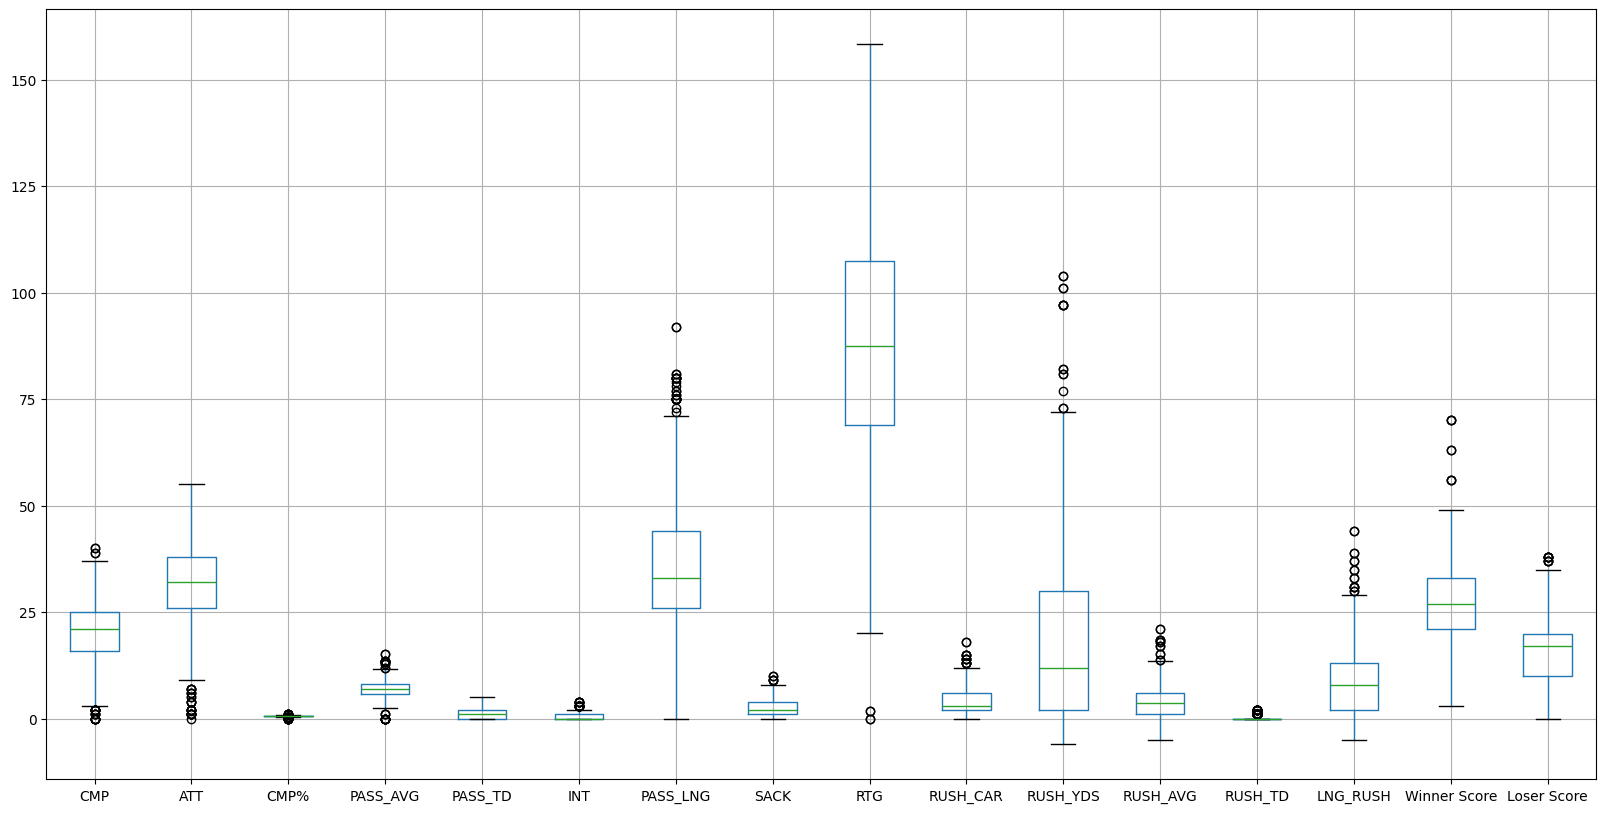

In [49]:
# - What am I doing? -

# Use this line to remove large column values that distort boxplot view
BP_QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['QBR', 'PASS_YDS'])

# Look at boxplots to find outliers.
BP_QuarterbackWeektoWeek2023.boxplot(figsize=(20,10))

<Axes: >

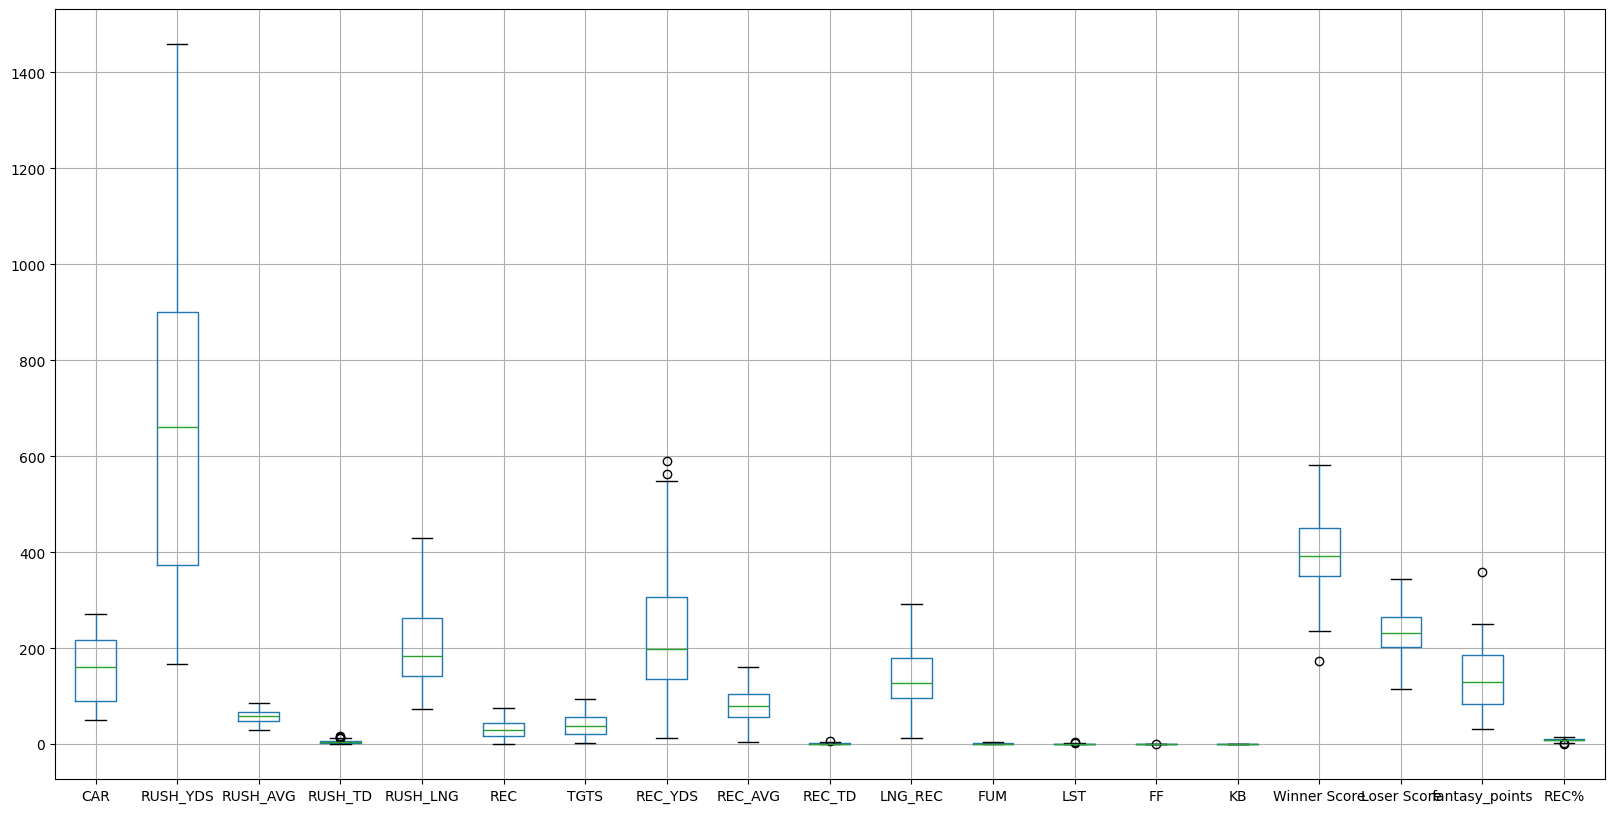

In [185]:
# - What am I doing? -

# Remove text columns for group by statistics.
Groupby_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date', 'Opponent', 'Game Result', 'OT?', 'Home/Away'])

# IF need to see boxplot by season instead of by game
# Groupby_RunningbackWeektoWeek2023 = Groupby_RunningbackWeektoWeek2023.groupby('playerName').sum()

# Look at boxplots to find outliers.
Groupby_RunningbackWeektoWeek2023.boxplot(figsize=(20,10))

<Axes: >

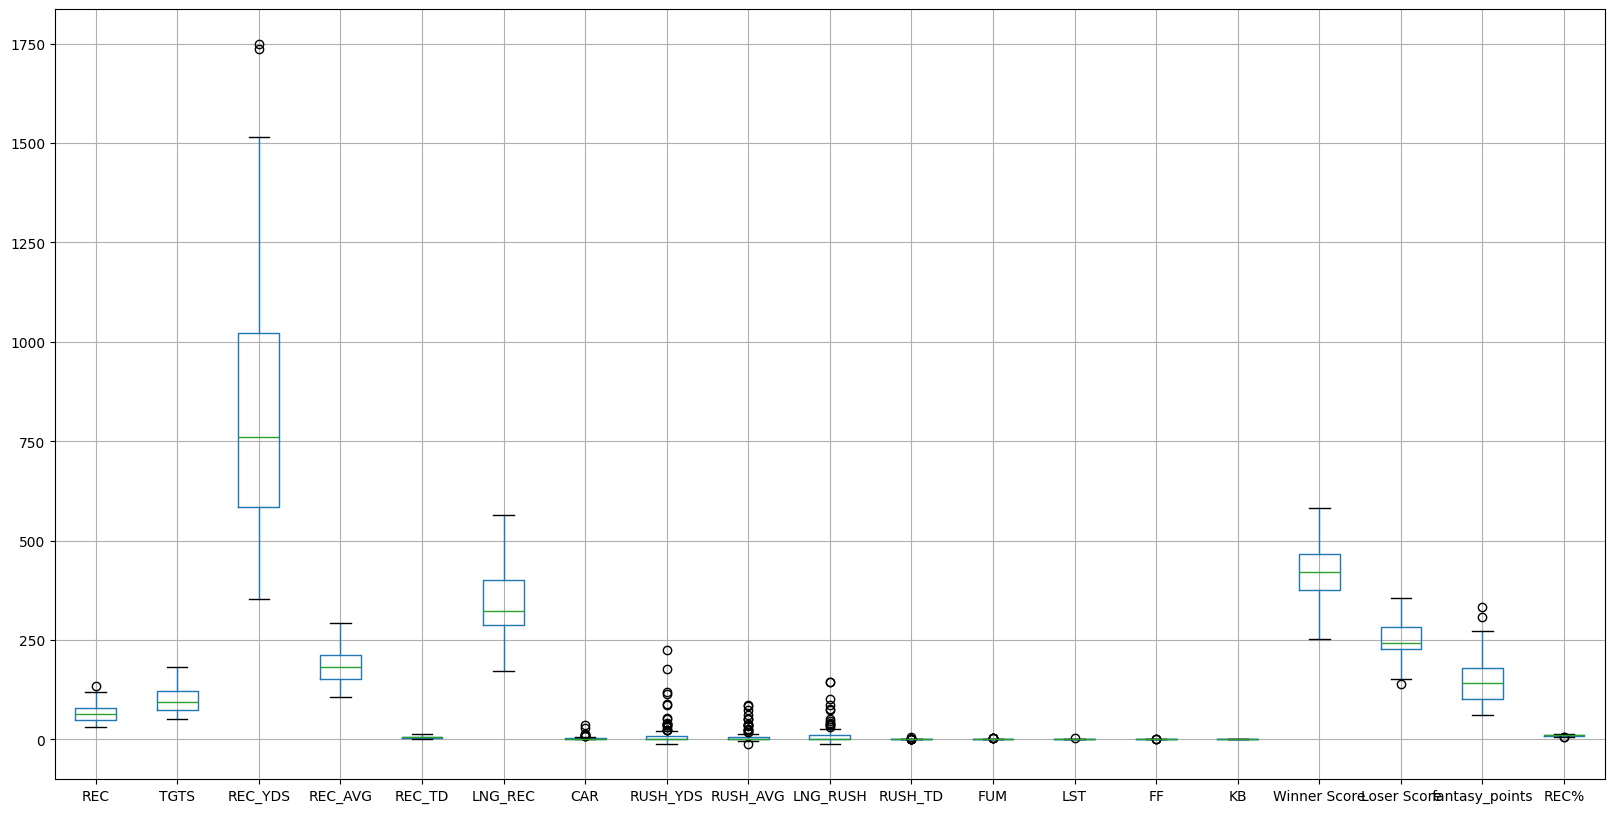

In [294]:
# - What am I doing? -


# Remove text columns for group by statistics.
Groupby_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date', 'Opponent', 'Game Result', 'OT?', 'Home/Away'])

# IF need to see boxplot by season instead of by game
Groupby_RunningbackWeektoWeek2023 = Groupby_RunningbackWeektoWeek2023.groupby('playerName').sum()

# Look at boxplots to find outliers.
Groupby_ReceiverWeektoWeek2023.boxplot(figsize=(20,10))

## Quarterback Exploration Questions

In [ ]:
# 1. QBs get double the amount of TDs than RBs and WRs

In [173]:
# Week to Week

# QB Week to Week Mean TD
print('Week to Week Quarterback: ', QuarterbackWeektoWeek2023['PASS_TD'].mean())

# RB Week to Week Mean TD
print('Week to Week Runningback: ', RunningbackWeektoWeek2023['RUSH_TD'].mean())

# WR Week to Week Mean TD
print('Week to Week Receiver: ', ReceiverWeektoWeek2023['REC_TD'].mean())


# Overall Season
# Remove text columns for group by statistics.
Groupby_QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['Date',  'Opponent', 'Game Result', 'OT?', 'Home/Away'])

# Group columns to look at receiver WeektoWeek 2023 dataset closer.
Groupby_QuarterbackWeektoWeek2023 = Groupby_QuarterbackWeektoWeek2023.groupby('playerName').sum()

print('Overall Season Quarterback: ', Groupby_QuarterbackWeektoWeek2023['PASS_TD'].mean())


# Overall Season
# Remove text columns for group by statistics.
Groupby_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',  'Opponent', 'Game Result', 'OT?', 'Home/Away'])

# Group columns to look at receiver WeektoWeek 2023 dataset closer.
Groupby_RunningbackWeektoWeek2023 = Groupby_RunningbackWeektoWeek2023.groupby('playerName').sum()

print('Overall Season Runningback: ', Groupby_RunningbackWeektoWeek2023['RUSH_TD'].mean())


# Overall Season
# Remove text columns for group by statistics.
Groupby_ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop(columns=['Date',  'Opponent', 'Game Result', 'OT?', 'Home/Away'])

# Group columns to look at receiver WeektoWeek 2023 dataset closer.
Groupby_ReceiverWeektoWeek2023 = Groupby_ReceiverWeektoWeek2023.groupby('playerName').sum()

print('Overall Season Receiver: ', Groupby_ReceiverWeektoWeek2023['REC_TD'].mean())

# Conclusion: QBs get triple the amount of TDs that RBs and WRs get on average

Week to Week Quarterback:  1.254355400696864
Week to Week Runningback:  0.321656050955414
Week to Week Receiver:  0.3266814486326681
Overall Season Quarterback:  12.857142857142858
Overall Season Runningback:  4.590909090909091
Overall Season Receiver:  4.911111111111111


In [74]:
QuarterbackWeektoWeek2023.columns

Index(['Date', 'Opponent', 'CMP', 'ATT', 'PASS_YDS', 'CMP%', 'PASS_AVG',
       'PASS_TD', 'INT', 'PASS_LNG', 'SACK', 'RTG', 'QBR', 'RUSH_CAR',
       'RUSH_YDS', 'RUSH_AVG', 'RUSH_TD', 'LNG_RUSH', 'playerName',
       'Game Result', 'Winner Score', 'Loser Score', 'OT?', 'Home/Away',
       'fantasy_points'],
      dtype='object')

In [174]:
# 2. QBs throw alot of interceptions. Therefore, we should consider this in analysis. Does this result in worse scoring QBs?

# Find Top 10 Interception QB for the season

# Remove text columns for group by statistics.
Groupby_QuarterbackWeektoWeek2023 = QuarterbackWeektoWeek2023.drop(columns=['Date',  'Opponent', 'Game Result', 'OT?', 'Home/Away'])

# Group columns to look at receiver WeektoWeek 2023 dataset closer.
INT_Groupby_QuarterbackWeektoWeek2023 = Groupby_QuarterbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='INT', ascending=False).head(10)

# Find Top 10 fantasy scoring QB for the season
TD_Groupby_QuarterbackWeektoWeek2023 = Groupby_QuarterbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='fantasy_points', ascending=False).head(10)

# Compare the two lists
merged_data = pd.merge(INT_Groupby_QuarterbackWeektoWeek2023, TD_Groupby_QuarterbackWeektoWeek2023, on='playerName', how='inner')

merged_data

# Conclusion: About half of players in Top INT throwing QBs are in Top 10 scoring players. While INTs may influence overall results, it is
# not the key decider in success of QB

CMP_x  ATT_x  PASS_YDS_x  CMP%_x  PASS_AVG_x  PASS_TD_x  \
playerName                                                                 
Josh Allen         358    539        3947  10.551       119.9         27   
Jalen Hurts        352    538        3858  11.135       120.7         23   
Patrick Mahomes    381    567        3998  10.110       106.7         25   
Jared Goff         407    605        4575  11.455       130.5         30   
Jordan Love        372    579        4159  10.964       123.6         32   

                 INT_x  PASS_LNG_x  SACK_x   RTG_x    QBR_x  RUSH_CAR_x  \
playerName                                                                
Josh Allen          17         631      24  1461.3  10434.0         107   
Jalen Hurts         15         617      36  1498.7   9573.0         157   
Patrick Mahomes     14         590      25  1383.2   9395.0          69   
Jared Goff          12         672      30  1678.4  10047.0          32   
Jordan Love         11         708      30  1659.2  10365.0          50   

                 RUSH_YDS_x  RUSH_AVG_x  RUSH_TD_x  LNG_RUSH_x  \
playerName                                                       
Josh Allen              510        80.2         14         177   
Jalen Hurts             605        62.9         15         202   
Patrick Mahomes         365        74.3          0         169   
Jared Goff               21         8.7          2          29   
Jordan Love             247        86.3          4         197   

                 Winner Score_x  Loser Score_x  fantasy_points_x  CMP_y  \
playerName                                                                
Josh Allen                  452            265            383.88    358   
Jalen Hurts                 506            355            381.82    352   
Patrick Mahomes             374            231            282.42    381   
Jared Goff                  522            334            305.10    407   
Jordan Love                 438            295            332.06    372   

                 ATT_y  PASS_YDS_y  CMP%_y  PASS_AVG_y  PASS_TD_y  INT_y  \
playerName                                                                 
Josh Allen         539        3947  10.551       119.9         27     17   
Jalen Hurts        538        3858  11.135       120.7         23     15   
Patrick Mahomes    567        3998  10.110       106.7         25     14   
Jared Goff         605        4575  11.455       130.5         30     12   
Jordan Love        579        4159  10.964       123.6         32     11   

                 PASS_LNG_y  SACK_y   RTG_y    QBR_y  RUSH_CAR_y  RUSH_YDS_y  \
playerName                                                                     
Josh Allen              631      24  1461.3  10434.0         107         510   
Jalen Hurts             617      36  1498.7   9573.0         157         605   
Patrick Mahomes         590      25  1383.2   9395.0          69         365   
Jared Goff              672      30  1678.4  10047.0          32          21   
Jordan Love             708      30  1659.2  10365.0          50         247   

                 RUSH_AVG_y  RUSH_TD_y  LNG_RUSH_y  Winner Score_y  \
playerName                                                           
Josh Allen             80.2         14         177             452   
Jalen Hurts            62.9         15         202             506   
Patrick Mahomes        74.3          0         169             374   
Jared Goff              8.7          2          29             522   
Jordan Love            86.3          4         197             438   

                 Loser Score_y  fantasy_points_y  
playerName                                        
Josh Allen                 265            383.88  
Jalen Hurts                355            381.82  
Patrick Mahomes            231            282.42  
Jared Goff                 334            305.10  
Jordan Love                295            332.06

## Runningback Exploration Questions

In [177]:
RunningbackWeektoWeek2023.sort_values(by='RUSH_YDS', ascending=False)

Date Opponent  CAR  RUSH_YDS  RUSH_AVG  RUSH_TD  RUSH_LNG  REC  \
440 2023-09-24      DEN   18       203      11.3        2        67    4   
487 2024-01-06      HOU   30       188       6.3        1        49    2   
113 2023-12-17      DAL   25       179       7.2        1        24    2   
243 2024-01-07       NE   37       178       4.8        1        50    2   
249 2023-10-08      DEN   22       177       8.0        1        72    3   
..         ...      ...  ...       ...       ...      ...       ...  ...   
903 2023-09-17      NYG    1        -2      -2.0        0        -2    2   
913 2023-10-15      CLE    2        -3      -1.5        0         0    0   
12  2023-10-29      WSH    2        -4      -2.0        0         0    5   
697 2023-11-09      CHI    2        -5      -2.5        0         1    2   
709 2023-12-17      CLE    6        -6      -1.0        0         2    0   

     TGTS  REC_YDS  REC_AVG  REC_TD  LNG_REC  FUM  LST  FF  KB  \
440     4       30      7.5       2       17    0    0   0   0   
487     2        8      4.0       0        6    0    0   0   0   
113     3       42     21.0       1       24    0    0   0   0   
243     2       12      6.0       0       11    0    0   0   0   
249     3       17      5.7       0       12    0    0   0   0   
..    ...      ...      ...     ...      ...  ...  ...  ..  ..   
903     2        7      3.5       0        4    0    0   0   0   
913     0        0      0.0       0        0    0    0   0   0   
12      5       30      6.0       0       17    1    1   0   0   
697     2       15      7.5       0       13    0    0   0   0   
709     0        0      0.0       0        0    0    0   0   0   

           playerName Game Result  Winner Score  Loser Score   OT? Home/Away  \
440     De'Von Achane           W            70           20  None      Home   
487   Jonathan Taylor           L            23           19  None      Home   
113        James Cook           W            31           10  None      Home   
243       Breece Hall           W            17            3  None      Away   
249       Breece Hall           W            31           21  None      Away   
..                ...         ...           ...          ...   ...       ...   
903   Emari Demercado           L            31           28  None      Home   
913   Elijah Mitchell           L            19           17  None      Away   
12   Kenneth Gainwell           W            38           31  None      Away   
697     Miles Sanders           L            16           13  None      Away   
709    D'Onta Foreman           L            20           17  None      Away   

     fantasy_points      REC%  
440            49.3  1.000000  
487            26.6  1.000000  
113            35.1  0.666667  
243            26.0  1.000000  
249            26.9  1.000000  
..              ...       ...  
903             1.5  1.000000  
913            -0.3       NaN  
12              3.1  1.000000  
697             2.0  1.000000  
709            -0.6       NaN  

[942 rows x 25 columns]

In [184]:
# 1. Who are responsible for outlier rushing yard games? (No Outlier Rushing Yards seasons)

Groupby_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',  'Opponent', 'Game Result', 'OT?', 'Home/Away'])

# Assuming you have a DataFrame 'data' with a column 'value' containing your data
# Calculate the IQR (Interquartile Range)
Q1 = Groupby_RunningbackWeektoWeek2023['RUSH_YDS'].quantile(0.25)
Q3 = Groupby_RunningbackWeektoWeek2023['RUSH_YDS'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers using the lower and upper bounds
outliers = Groupby_RunningbackWeektoWeek2023[Groupby_RunningbackWeektoWeek2023['RUSH_YDS'] > upper_bound]

outliers.sort_values(by='RUSH_YDS', ascending=False)


CAR  RUSH_YDS  RUSH_AVG  RUSH_TD  RUSH_LNG  REC  TGTS  REC_YDS  REC_AVG  \
440   18       203      11.3        2        67    4     4       30      7.5   
487   30       188       6.3        1        49    2     2        8      4.0   
113   25       179       7.2        1        24    2     3       42     21.0   
243   37       178       4.8        1        50    2     2       12      6.0   
249   22       177       8.0        1        72    3     3       17      5.7   
127   28       175       6.3        1        43    3     3        6      2.0   
446   23       165       7.2        2        56    2     2       30     15.0   
95    20       158       7.9        1        31    0     0        0      0.0   
16    19       153       8.1        1        69    0     0        0      0.0   
75    22       152       6.9        1        65    3     5       17      5.7   
93    27       152       5.6        1        27    5     7        3      0.6   
319   26       152       5.8        1        27    5     5       37      7.4   
439   11       151      13.7        1        76    1     1       14     14.0   
136   27       150       5.6        1        29    4     4       54     13.5   
36    30       150       5.0        1        22    1     2       11     11.0   
69    16       145       9.1        0        72    1     1        8      8.0   
681   22       145       6.6        0        43    0     1        0      0.0   
100   16       143       8.9        0        56    6     6       61     10.2   

     REC_TD  LNG_REC  FUM  LST  FF  KB           playerName  Winner Score  \
440       2       17    0    0   0   0        De'Von Achane            70   
487       0        6    0    0   0   0      Jonathan Taylor            23   
113       1       24    0    0   0   0           James Cook            31   
243       0       11    0    0   0   0          Breece Hall            17   
249       0       12    0    0   0   0          Breece Hall            31   
127       0        5    0    0   0   0        D'Andre Swift            34   
446       0       26    0    0   0   0            Zack Moss            23   
95        0        0    0    0   0   0       Kyren Williams            26   
16        0        0    0    0   0   0        Derrick Henry            28   
75        0        7    1    0   0   0  Christian McCaffrey            30   
93        0        7    2    2   0   0       Kyren Williams            28   
319       0       14    0    0   0   0         Jahmyr Gibbs            26   
439       0       14    1    1   0   0        De'Von Achane            31   
136       0       34    0    0   0   0         James Conner            21   
36        0       11    0    0   0   0     Devin Singletary            30   
69        0        8    0    0   0   0  Christian McCaffrey            28   
681       0        0    0    0   0   0          Zamir White            20   
100       2       24    0    0   0   0       Kyren Williams            37   

     Loser Score  fantasy_points      REC%  
440           20            49.3  1.000000  
487           19            26.6  1.000000  
113           10            35.1  0.666667  
243            3            26.0  1.000000  
249           21            26.9  1.000000  
127           28            25.6  1.000000  
446           16            32.5  1.000000  
95             9            21.8       NaN  
16            20            21.3       NaN  
75             7            24.4  0.600000  
93            20            20.0  0.714286  
319           14            27.4  1.000000  
439           16            21.0  1.000000  
136           20            28.4  1.000000  
36            27            22.6  0.500000  
69            16            15.8  1.000000  
681           14            14.5  0.000000  
100           14            35.4  1.000000

In [182]:
# 1. Who are responsible for outlier rushing TD season?

Groupby_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',  'Opponent', 'Game Result', 'OT?', 'Home/Away'])
Groupby_RunningbackWeektoWeek2023 = Groupby_RunningbackWeektoWeek2023.groupby('playerName').sum()

# Assuming you have a DataFrame 'data' with a column 'value' containing your data
# Calculate the IQR (Interquartile Range)
Q1 = Groupby_RunningbackWeektoWeek2023['RUSH_TD'].quantile(0.25)
Q3 = Groupby_RunningbackWeektoWeek2023['RUSH_TD'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers using the lower and upper bounds
outliers = Groupby_RunningbackWeektoWeek2023[Groupby_RunningbackWeektoWeek2023['RUSH_TD'] > upper_bound]

outliers.sort_values(by='RUSH_TD', ascending=False)

CAR  RUSH_YDS  RUSH_AVG  RUSH_TD  RUSH_LNG  REC  TGTS  \
playerName                                                                   
Raheem Mostert       197       927      63.9       17       288   25    31   
Christian McCaffrey  272      1459      85.4       14       430   67    83   
David Montgomery     219      1015      66.7       13       278   16    24   
Gus Edwards          182       769      70.5       13       262   11    12   

                     REC_YDS  REC_AVG  REC_TD  LNG_REC  FUM  LST  FF  KB  \
playerName                                                                 
Raheem Mostert           175     74.8       3      101    3    1   0   0   
Christian McCaffrey      564    138.1       7      289    3    2   0   0   
David Montgomery         117     67.8       0       84    2    1   0   0   
Gus Edwards              168    156.5       0      165    3    2   0   0   

                     Winner Score  Loser Score  fantasy_points       REC%  
playerName                                                                 
Raheem Mostert                492          250           240.7  10.433333  
Christian McCaffrey           506          242           357.8  13.582143  
David Montgomery              438          308           197.2   7.500000  
Gus Edwards                   478          245           173.2   7.666667

<Axes: xlabel='CAR', ylabel='RUSH_TD'>

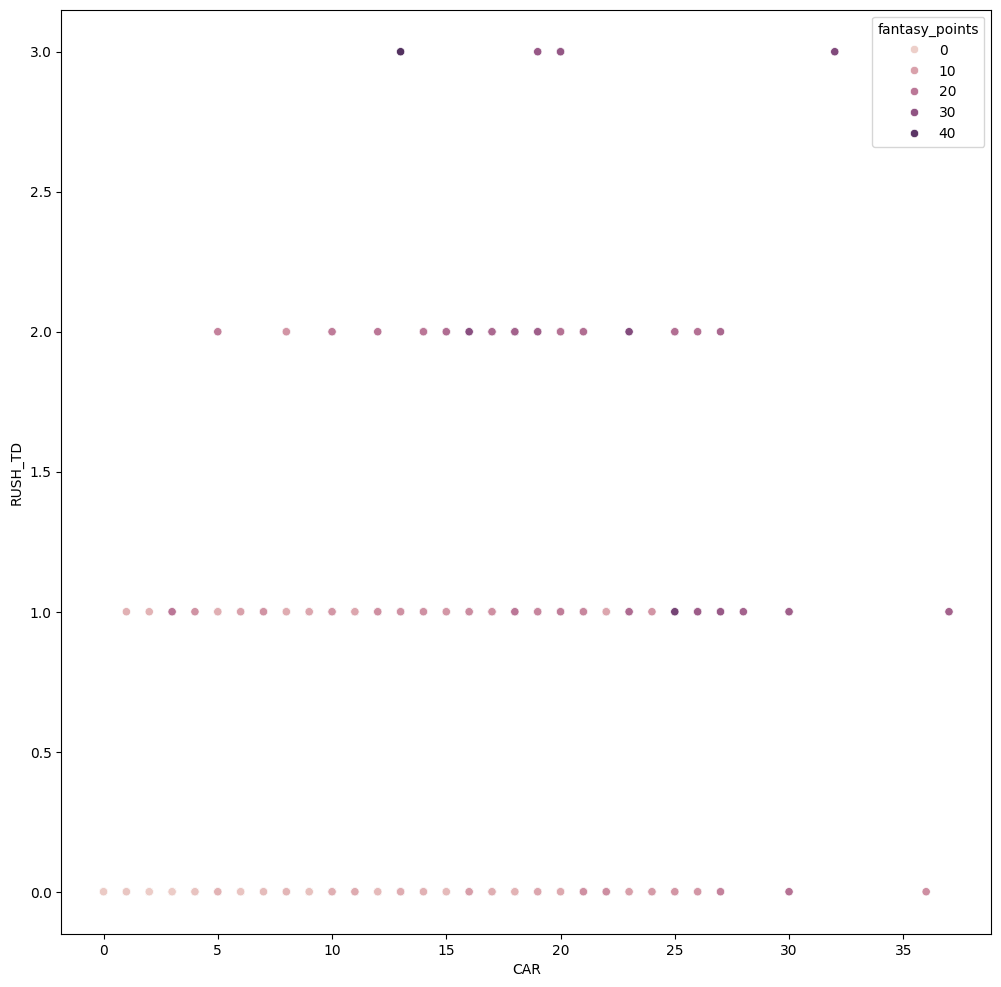

In [187]:
# 2. More carries a RB gets, the higher chance for a td?

# Remove text columns for correlation statistics.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

# Use seaborn to create with color
sns.scatterplot(data=Correlation_RunningbackWeektoWeek2023, x="CAR", y="RUSH_TD", hue="fantasy_points")

# Conclusion: More Carries may have a slight influence on the number of TDs.

In [191]:
# 3. Who are the RBs taking less snaps with high fantasy points? How do they do this?

# Remove text columns for group by statistics.
Groupby_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',  'Opponent', 'Game Result', 'OT?', 'Home/Away'])

# Group columns to look at receiver WeektoWeek 2023 dataset closer.
points_Groupby_QuarterbackWeektoWeek2023 = Groupby_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='fantasy_points', ascending=False).head(15)

# Find Top 10 fantasy scoring QB for the season
CAR_Groupby_QuarterbackWeektoWeek2023 = points_Groupby_QuarterbackWeektoWeek2023.sort_values(by='CAR', ascending=True)

CAR_Groupby_QuarterbackWeektoWeek2023

CAR  RUSH_YDS  RUSH_AVG  RUSH_TD  RUSH_LNG  REC  TGTS  \
playerName                                                                   
Alvin Kamara         180       694      50.1        5       165   75    86   
Jahmyr Gibbs         182       945      78.1       10       325   52    71   
Raheem Mostert       197       927      63.9       17       288   25    31   
Bijan Robinson       200       871      66.1        4       238   53    81   
David Montgomery     219      1015      66.7       13       278   16    24   
Travis Etienne Jr.   221       817      54.5        9       264   51    65   
Breece Hall          223       994      73.0        5       410   76    95   
Kyren Williams       228      1144      59.5       12       241   32    48   
James Cook           232      1126      75.8        2       287   41    50   
Saquon Barkley       247       962      54.9        6       290   41    60   
Tony Pollard         252      1005      68.9        6       279   55    67   
Joe Mixon            257      1034      68.9        9       260   52    64   
Derrick Henry        268      1070      60.9       11       289   26    34   
Christian McCaffrey  272      1459      85.4       14       430   67    83   
Rachaad White        272       990      62.1        6       254   64    70   

                     REC_YDS  REC_AVG  REC_TD  LNG_REC  FUM  LST  FF  KB  \
playerName                                                                 
Alvin Kamara             466     81.9       1      182    0    0   0   0   
Jahmyr Gibbs             316     67.8       1      131    2    1   0   0   
Raheem Mostert           175     74.8       3      101    3    1   0   0   
Bijan Robinson           455    111.6       4      264    4    3   0   0   
David Montgomery         117     67.8       0       84    2    1   0   0   
Travis Etienne Jr.       411    118.9       1      219    0    0   0   0   
Breece Hall              591    134.4       4      280    2    0   0   0   
Kyren Williams           206     57.0       3      120    3    2   0   0   
James Cook               420    158.0       4      237    4    2   0   0   
Saquon Barkley           280     96.4       4      173    2    2   0   0   
Tony Pollard             311     78.0       0      194    3    1   0   0   
Joe Mixon                376    124.8       3      255    0    0   0   0   
Derrick Henry            198    112.9       0      161    0    0   0   0   
Christian McCaffrey      564    138.1       7      289    3    2   0   0   
Rachaad White            549    161.4       3      293    3    2   0   0   

                     Winner Score  Loser Score  fantasy_points       REC%  
playerName                                                                 
Alvin Kamara                  362          199           189.5  11.394048  
Jahmyr Gibbs                  460          304           216.1  10.232540  
Raheem Mostert                492          250           240.7  10.433333  
Bijan Robinson                403          261           201.1   9.564286  
David Montgomery              438          308           197.2   7.500000  
Travis Etienne Jr.            437          236           208.3  12.233333  
Breece Hall                   420          203           250.5  12.916667  
Kyren Williams                351          229           237.0   6.950000  
James Cook                    452          265           207.1  11.690476  
Saquon Barkley                366          191           200.7   9.723810  
Tony Pollard                  581          243           193.1  13.223810  
Joe Mixon                     468          282           239.0  13.757143  
Derrick Henry                 391          241           205.8  10.166667  
Christian McCaffrey           506          242           357.8  13.582143  
Rachaad White                 417          256           235.9  15.730952

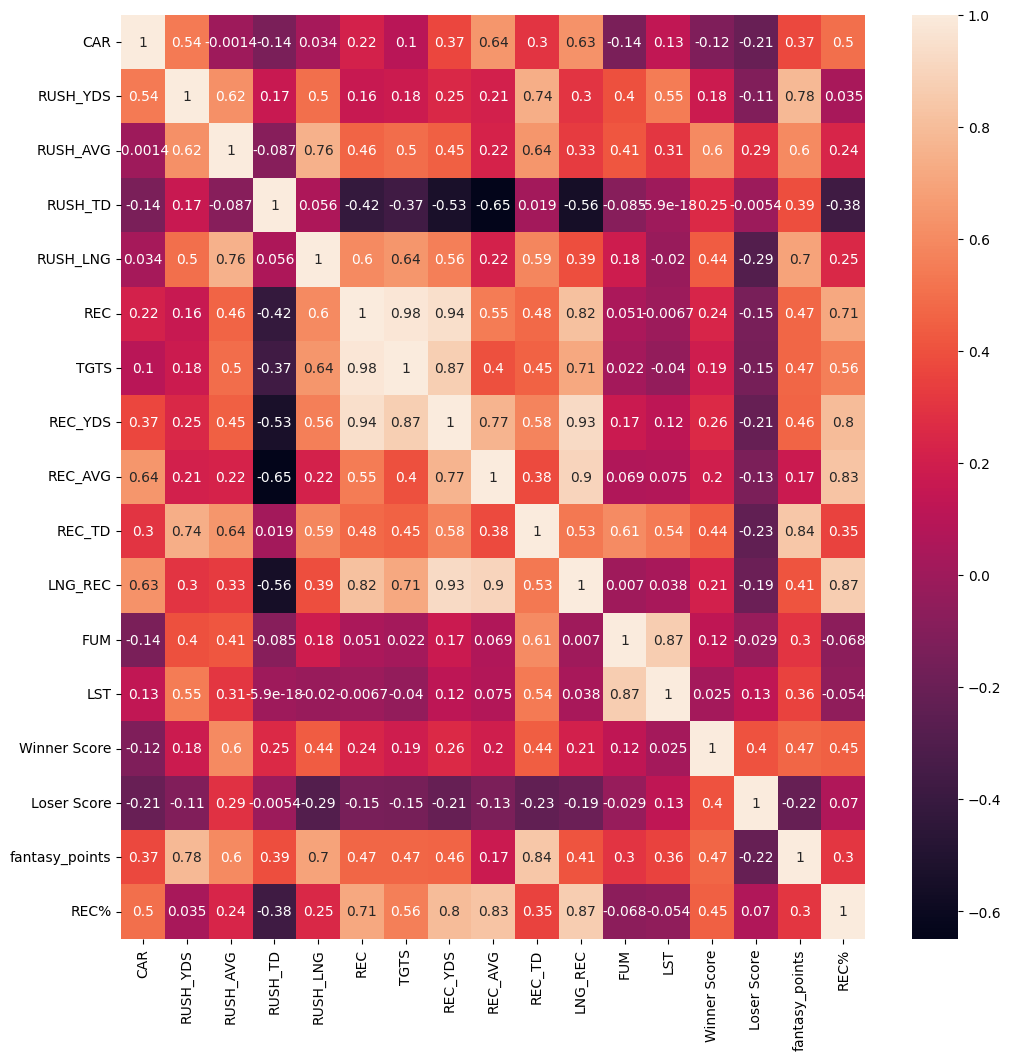

In [198]:
# 4. High correlation for Top 10 RB fantasy scorers between Rush average and fantasy points

# Remove text columns for correlation statistics.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date', 'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])
Correlation_RunningbackWeektoWeek2023 = Correlation_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='fantasy_points', ascending=False).head(10)


# Visualize correlations for quarterbacks week to week.
# Good step to understand what your focus should be on during data analysis.
sns.heatmap(Correlation_RunningbackWeektoWeek2023.groupby('playerName').mean().corr(), annot=True)

plt.rcParams['figure.figsize'] = (12, 12)

plt.show()

# Conclusion: Strong correlation between rush average and fantasy points. Even stronger correlation between Rush Yards and fantasy points.


In [202]:
# 6. Do high TD scoring RBs have more points than non high scoring TD RB?

# Remove text columns for correlation statistics.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date', 'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

High_TDgroup_RunningbackWeektoWeek2023 = Correlation_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='RUSH_TD', ascending=False).head(25)

Low_TDgroup_RunningbackWeektoWeek2023 = Correlation_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='RUSH_TD', ascending=True).head(25)


High_TDgroup_RunningbackWeektoWeek2023['Scoring'] = 'High'
Low_TDgroup_RunningbackWeektoWeek2023['Scoring'] = 'Low'

Final = pd.concat([High_TDgroup_RunningbackWeektoWeek2023, Low_TDgroup_RunningbackWeektoWeek2023], axis=0).sort_values(by='fantasy_points', ascending=False)

Final

# Yes, High TD RBs generally get more points than non high scoring TD RBs.

CAR  RUSH_YDS  RUSH_AVG  RUSH_TD  RUSH_LNG  REC  TGTS  \
playerName                                                                     
Christian McCaffrey    272      1459      85.4       14       430   67    83   
Breece Hall            223       994      73.0        5       410   76    95   
Raheem Mostert         197       927      63.9       17       288   25    31   
Joe Mixon              257      1034      68.9        9       260   52    64   
Kyren Williams         228      1144      59.5       12       241   32    48   
Rachaad White          272       990      62.1        6       254   64    70   
Jahmyr Gibbs           182       945      78.1       10       325   52    71   
Travis Etienne Jr.     221       817      54.5        9       264   51    65   
James Cook             232      1126      75.8        2       287   41    50   
Derrick Henry          268      1070      60.9       11       289   26    34   
Saquon Barkley         247       962      54.9        6       290   41    60   
David Montgomery       219      1015      66.7       13       278   16    24   
Tony Pollard           252      1005      68.9        6       279   55    67   
Alvin Kamara           180       694      50.1        5       165   75    86   
James Conner           208      1040      66.5        7       285   27    33   
Isiah Pacheco          189       869      57.5        7       262   44    48   
Kenneth Walker III     219       905      63.4        8       300   29    37   
Najee Harris           255      1035      67.2        8       278   29    38   
Brian Robinson Jr.     178       733      63.1        5       227   36    43   
De'Von Achane          103       800      74.8        8       323   27    37   
Gus Edwards            182       769      70.5       13       262   11    12   
Chuba Hubbard          238       902      67.5        5       224   39    44   
Josh Jacobs            233       805      42.2        6       224   37    54   
Austin Ekeler          179       628      47.9        5       195   51    74   
Jonathan Taylor        146       672      39.5        6       183   18    22   
Tyjae Spears            96       438      77.0        2       210   51    69   
Aaron Jones            142       656      47.7        2       164   30    43   
Alexander Mattison     180       700      60.5        0       182   30    44   
Kareem Hunt            135       411      40.4        9       124   15    21   
AJ Dillon              178       613      50.7        2       175   22    28   
Antonio Gibson          65       265      66.6        1       130   48    59   
Khalil Herbert         132       611      50.7        2       179   20    31   
Samaje Perine           53       238      68.7        1       111   50    56   
Jaleel McLaughlin       76       410      74.8        1       185   31    36   
Zach Charbonnet        108       462      67.4        1       170   33    40   
Roschon Johnson         81       352      68.6        2       163   34    40   
Rico Dowdle             89       361      59.0        2       150   17    22   
Kenneth Gainwell        84       364      71.9        2       173   30    37   
Miles Sanders          129       432      48.9        1       181   27    41   
Dameon Pierce          145       416      35.7        2       121   13    17   
Zamir White            104       451      41.8        1       132   15    19   
Emari Demercado         58       284      46.4        2       116   21    30   
Clyde Edwards-Helaire   70       223      45.7        1       109   17    22   
Joshua Kelley          107       405      52.5        2       162    8    12   
Jamaal Williams        106       306      38.2        1        94   18    20   
Royce Freeman           77       319      29.5        2        81    1     2   
Elijah Mitchell         75       281      31.2        2       100    6     8   
Pierre Strong Jr.       63       291      53.3        1       138    5     8   
Dalvin Cook            

In [ ]:
# 7. What are the characteristics of high scoring player? Age, OL, Schedule/Opponents, etc?

In [207]:
# 8. Are the fantasy point leaders the consistent ones week in week out, are they high and low players, or average with breakout weeks? 
# Which players are performing most consistently? Which have biggest games? 

# Remove text columns for correlation statistics.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date', 'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

scoreleaders_RunningbackWeektoWeek2023 = Correlation_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='fantasy_points', ascending=False).head(5)

# Identify outliers using the lower and upper bounds

# Compare the two lists
merged_data = pd.merge(Correlation_RunningbackWeektoWeek2023, scoreleaders_RunningbackWeektoWeek2023, on='playerName', how='inner')

merged_data


CAR_x  RUSH_YDS_x  RUSH_AVG_x  RUSH_TD_x  RUSH_LNG_x  REC_x  TGTS_x  \
0      14          64         4.6          0          13      4       5   
1      18         115         6.4          1          26      5       5   
2      17          93         5.5          1          16      3       4   
3      21          78         3.7          0          12      5       5   
4      12          54         4.5          1          16      6       7   
..    ...         ...         ...        ...         ...    ...     ...   
71     10          23         2.3          0          14      5       6   
72     16          50         3.1          0          10      4       4   
73     12          39         3.3          1           9      5       5   
74      6          56         9.3          0          43      3       4   
75      4           9         2.3          0           9      0       2   

    REC_YDS_x  REC_AVG_x  REC_TD_x  LNG_REC_x  FUM_x  LST_x  \
0          27        6.8         0         12      0      0   
1          72       14.4         2         41      0      0   
2          40       13.3         0         33      0      0   
3          25        5.0         1         11      0      0   
4          64       10.7         1         28      0      0   
..        ...        ...       ...        ...    ...    ...   
71         50       10.0         1         15      0      0   
72         10        2.5         0          5      0      0   
73         54       10.8         0         25      0      0   
74         13        4.3         0          7      0      0   
75          0        0.0         0          0      0      0   

             playerName  Winner Score_x  Loser Score_x  fantasy_points_x  \
0   Christian McCaffrey              27             10              11.1   
1   Christian McCaffrey              45             29              39.2   
2   Christian McCaffrey              42             19              20.8   
3   Christian McCaffrey              27             14              18.8   
4   Christian McCaffrey              31             17              26.8   
..                  ...             ...            ...               ...   
71          Breece Hall              32              6              15.8   
72          Breece Hall              27              6               8.0   
73          Breece Hall              20             14              17.8   
74          Breece Hall              23             20               8.4   
75          Breece Hall              30             10               0.9   

      REC%_x  CAR_y  RUSH_YDS_y  RUSH_AVG_y  RUSH_TD_y  RUSH_LNG_y  REC_y  \
0   0.800000    272        1459        85.4         14         430     67   
1   1.000000    272        1459        85.4         14         430     67   
2   0.750000    272        1459        85.4         14         430     67   
3   1.000000    272        1459        85.4         14         430     67   
4   0.857143    272        1459        85.4         14         430     67   
..       ...    ...         ...         ...        ...         ...    ...   
71  0.833333    223         994        73.0          5         410     76   
72  1.000000    223         994        73.0          5         410     76   
73  1.000000    223         994        73.0          5         410     76   
74  0.750000    223         994        73.0          5         410     76   
75  0.000000    223         994        73.0          5         410     76   

    TGTS_y  REC_YDS_y  REC_AVG_y  REC_TD_y  LNG_REC_y  FUM_y  LST_y  \
0       83        564      138.1         7        289      3      2   
1       83        564      138.1         7        289      3      2   
2       83        564      138.1         7        289      3      2   
3       83        564      138.1         7        289      3      2   
4       83        564      138.1         7        289      3      2   
..     ...        ...        ...       ...        ...    ...    ...   
71      95 

In [208]:
# 9. Who are the RB with reception TD? How do they stack up to overall TDs scored by RB?

Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date', 'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

High_RECTDgroup_RunningbackWeektoWeek2023 = Correlation_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='REC_TD', ascending=False).head(10)

High_RUSHTDgroup_RunningbackWeektoWeek2023 = Correlation_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='RUSH_TD', ascending=False).head(10)

High_RECTDgroup_RunningbackWeektoWeek2023['TD Leader'] = 'Receiving'
High_RUSHTDgroup_RunningbackWeektoWeek2023['TD Leader'] = 'Rushing'

Final = pd.concat([High_RECTDgroup_RunningbackWeektoWeek2023, High_RUSHTDgroup_RunningbackWeektoWeek2023], axis=0).sort_values(by='RUSH_TD', ascending=False)

Final

# Conclusion: Most RBs catching TDs aren't running it in as much. However, the exceptions are Raheem Mostert, Christian Mccafrey, and Joe Mixon

CAR  RUSH_YDS  RUSH_AVG  RUSH_TD  RUSH_LNG  REC  TGTS  \
playerName                                                                   
Raheem Mostert       197       927      63.9       17       288   25    31   
Raheem Mostert       197       927      63.9       17       288   25    31   
Christian McCaffrey  272      1459      85.4       14       430   67    83   
Christian McCaffrey  272      1459      85.4       14       430   67    83   
Gus Edwards          182       769      70.5       13       262   11    12   
David Montgomery     219      1015      66.7       13       278   16    24   
Kyren Williams       228      1144      59.5       12       241   32    48   
Derrick Henry        268      1070      60.9       11       289   26    34   
Jahmyr Gibbs         182       945      78.1       10       325   52    71   
Joe Mixon            257      1034      68.9        9       260   52    64   
Kareem Hunt          135       411      40.4        9       124   15    21   
Joe Mixon            257      1034      68.9        9       260   52    64   
Travis Etienne Jr.   221       817      54.5        9       264   51    65   
De'Von Achane        103       800      74.8        8       323   27    37   
Saquon Barkley       247       962      54.9        6       290   41    60   
Brian Robinson Jr.   178       733      63.1        5       227   36    43   
Breece Hall          223       994      73.0        5       410   76    95   
Jerome Ford          204       813      65.6        4       352   44    63   
Bijan Robinson       200       871      66.1        4       238   53    81   
James Cook           232      1126      75.8        2       287   41    50   

                     REC_YDS  REC_AVG  REC_TD  LNG_REC  FUM  LST  \
playerName                                                         
Raheem Mostert           175     74.8       3      101    3    1   
Raheem Mostert           175     74.8       3      101    3    1   
Christian McCaffrey      564    138.1       7      289    3    2   
Christian McCaffrey      564    138.1       7      289    3    2   
Gus Edwards              168    156.5       0      165    3    2   
David Montgomery         117     67.8       0       84    2    1   
Kyren Williams           206     57.0       3      120    3    2   
Derrick Henry            198    112.9       0      161    0    0   
Jahmyr Gibbs             316     67.8       1      131    2    1   
Joe Mixon                376    124.8       3      255    0    0   
Kareem Hunt               84     53.8       0       67    0    0   
Joe Mixon                376    124.8       3      255    0    0   
Travis Etienne Jr.       411    118.9       1      219    0    0   
De'Von Achane            197     80.1       3      126    1    1   
Saquon Barkley           280     96.4       4      173    2    2   
Brian Robinson Jr.       368    110.8       4      221    4    2   
Breece Hall              591    134.4       4      280    2    0   
Jerome Ford              319    119.7       5      203    1    1   
Bijan Robinson           455    111.6       4      264    4    3   
James Cook               420    158.0       4      237    4    2   

                     Winner Score  Loser Score  fantasy_points       REC%  \
playerName                                                                  
Raheem Mostert                492          250           240.7  10.433333   
Raheem Mostert                492          250           240.7  10.433333   
Christian McCaffrey           506          242           357.8  13.582143   
Christian McCaffrey           506          242           357.8  13.582143   
Gus Edwards                   478          245           173.2   7.666667   
David Montgomery              438          308           197.2   7.500000   
Kyren Williams                351          229           237.0   6.950000   
Derrick Henry                 391          241           205.8  10.166667   
Jahmyr Gibbs                  460    

<Axes: xlabel='RUSH_YDS', ylabel='RUSH_TD'>

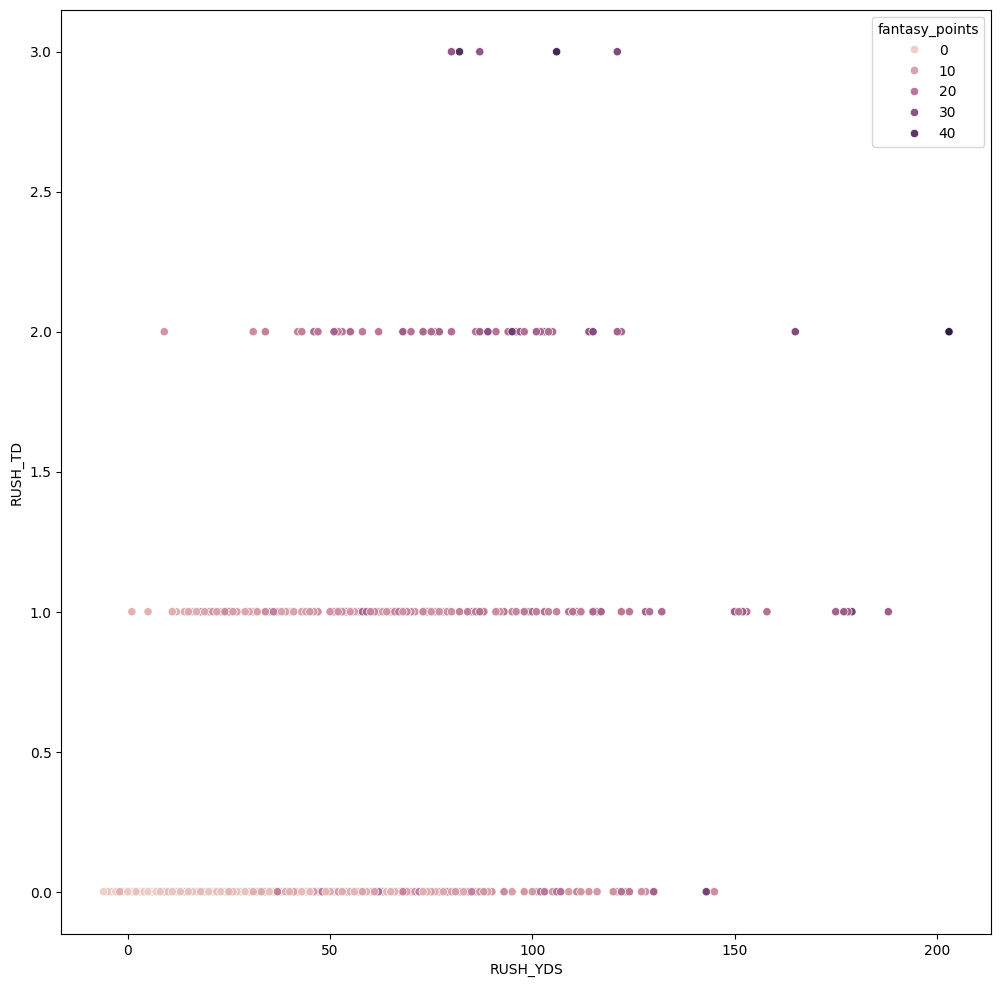

In [209]:
# 10. More rush Yards = More Tds?

# Remove text columns for correlation statistics.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

# Use seaborn to create with color
sns.scatterplot(data=Correlation_RunningbackWeektoWeek2023, x="RUSH_YDS", y="RUSH_TD", hue="fantasy_points")

# Conclusion: High Rush Yards do seem to result in more TDs.

<Axes: xlabel='REC%', ylabel='TGTS'>

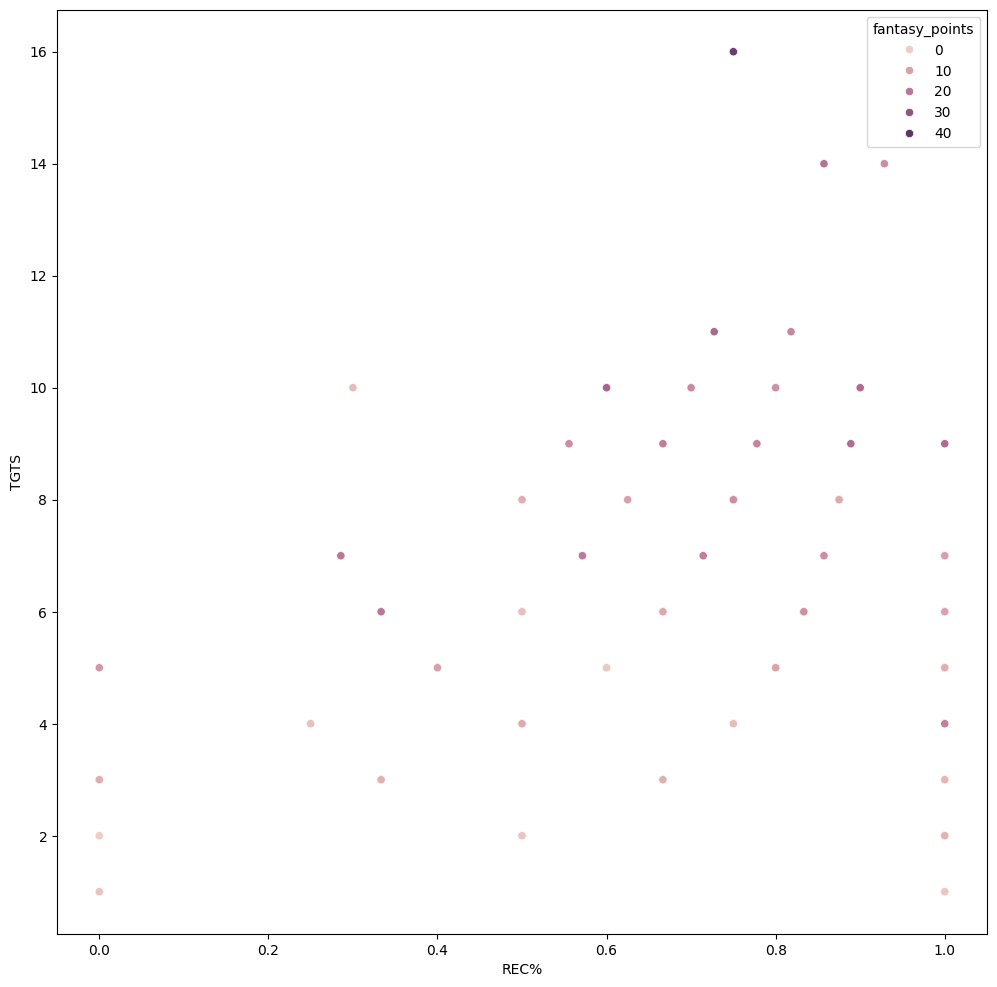

In [211]:
# 11. Higher Rec % = More Targets?

# Remove text columns for correlation statistics.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

# Use seaborn to create with color
sns.scatterplot(data=Correlation_RunningbackWeektoWeek2023, x="REC%", y="TGTS", hue="fantasy_points")

# Conclusion: High reception % do result in more targets.

In [214]:
# 12. Runningbacks don't really fumble the ball. Does this influence points scored?

# Remove text columns for correlation statistics.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

Correlation_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='LST', ascending=False).head(10)


CAR  RUSH_YDS  RUSH_AVG  RUSH_TD  RUSH_LNG  REC  TGTS  \
playerName                                                                  
Austin Ekeler       179       628      47.9        5       195   51    74   
Bijan Robinson      200       871      66.1        4       238   53    81   
Jaylen Warren       149       784      83.5        4       289   61    74   
Miles Sanders       129       432      48.9        1       181   27    41   
Alexander Mattison  180       700      60.5        0       182   30    44   
Gus Edwards         182       769      70.5       13       262   11    12   
Antonio Gibson       65       265      66.6        1       130   48    59   
Saquon Barkley      247       962      54.9        6       290   41    60   
Brian Robinson Jr.  178       733      63.1        5       227   36    43   
Samaje Perine        53       238      68.7        1       111   50    56   

                    REC_YDS  REC_AVG  REC_TD  LNG_REC  FUM  LST  Winner Score  \
playerName                                                                      
Austin Ekeler           436    105.9       1      232    5    4           374   
Bijan Robinson          455    111.6       4      264    4    3           403   
Jaylen Warren           370     94.2       0      193    4    2           398   
Miles Sanders           154     59.0       0       91    2    2           378   
Alexander Mattison      192     83.4       3      138    3    2           382   
Gus Edwards             168    156.5       0      165    3    2           478   
Antonio Gibson          389    123.8       2      245    3    2           504   
Saquon Barkley          280     96.4       4      173    2    2           366   
Brian Robinson Jr.      368    110.8       4      221    4    2           477   
Samaje Perine           455    154.1       0      228    3    2           477   

                    Loser Score  fantasy_points       REC%  
playerName                                                  
Austin Ekeler               226           159.9   9.371429  
Bijan Robinson              261           201.1   9.564286  
Jaylen Warren               230           165.9  13.850000  
Miles Sanders               211            74.1   8.422222  
Alexander Mattison          273           118.2  10.869048  
Gus Edwards                 245           173.2   7.666667  
Antonio Gibson              293           103.4  13.400000  
Saquon Barkley              191           200.7   9.723810  
Brian Robinson Jr.          264           178.1  10.111111  
Samaje Perine               293            96.3  15.433333

In [220]:
# 13. Are receiving RBs more valuable than just rushing? Or are players just splitting their time between receiving and running?

# Remove text columns for correlation statistics.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

print(Correlation_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='fantasy_points', ascending=False).head(10))

print(Correlation_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='TGTS', ascending=False).head(10))


# 8 of 10 top scoring RBs are above mean receiving targets. 6 of 10 are in the 75th percentile.

                     CAR  RUSH_YDS  RUSH_AVG  RUSH_TD  RUSH_LNG  REC  TGTS  \
playerName                                                                   
Christian McCaffrey  272      1459      85.4       14       430   67    83   
Breece Hall          223       994      73.0        5       410   76    95   
Raheem Mostert       197       927      63.9       17       288   25    31   
Joe Mixon            257      1034      68.9        9       260   52    64   
Kyren Williams       228      1144      59.5       12       241   32    48   
Rachaad White        272       990      62.1        6       254   64    70   
Jahmyr Gibbs         182       945      78.1       10       325   52    71   
Travis Etienne Jr.   221       817      54.5        9       264   51    65   
James Cook           232      1126      75.8        2       287   41    50   
Derrick Henry        268      1070      60.9       11       289   26    34   

                     REC_YDS  REC_AVG  REC_TD  LNG_REC  FUM  LS

In [230]:
# 14. Who are the top RBs when it comes to rush yards, rush TDs, Rush avg, rec, fantasy points? 
# column_names = [RUSH_YDS, RUSH_TD, RUSH_AVG, REC, fantasy_points]

# Remove text columns for group by statistics.
Groupby_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date', 'Game Result', 'Opponent', 'OT?', 'Home/Away'])


# Group columns to look at Quarterback WeektoWeek 2023 dataset closer.
Groupby_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='fantasy_points', ascending=False).head(10)

CAR  RUSH_YDS  RUSH_AVG  RUSH_TD  RUSH_LNG  REC  TGTS  \
playerName                                                                   
Christian McCaffrey  272      1459      85.4       14       430   67    83   
Breece Hall          223       994      73.0        5       410   76    95   
Raheem Mostert       197       927      63.9       17       288   25    31   
Joe Mixon            257      1034      68.9        9       260   52    64   
Kyren Williams       228      1144      59.5       12       241   32    48   
Rachaad White        272       990      62.1        6       254   64    70   
Jahmyr Gibbs         182       945      78.1       10       325   52    71   
Travis Etienne Jr.   221       817      54.5        9       264   51    65   
James Cook           232      1126      75.8        2       287   41    50   
Derrick Henry        268      1070      60.9       11       289   26    34   

                     REC_YDS  REC_AVG  REC_TD  LNG_REC  FUM  LST  FF  KB  \
playerName                                                                 
Christian McCaffrey      564    138.1       7      289    3    2   0   0   
Breece Hall              591    134.4       4      280    2    0   0   0   
Raheem Mostert           175     74.8       3      101    3    1   0   0   
Joe Mixon                376    124.8       3      255    0    0   0   0   
Kyren Williams           206     57.0       3      120    3    2   0   0   
Rachaad White            549    161.4       3      293    3    2   0   0   
Jahmyr Gibbs             316     67.8       1      131    2    1   0   0   
Travis Etienne Jr.       411    118.9       1      219    0    0   0   0   
James Cook               420    158.0       4      237    4    2   0   0   
Derrick Henry            198    112.9       0      161    0    0   0   0   

                     Winner Score  Loser Score  fantasy_points       REC%  
playerName                                                                 
Christian McCaffrey           506          242           357.8  13.582143  
Breece Hall                   420          203           250.5  12.916667  
Raheem Mostert                492          250           240.7  10.433333  
Joe Mixon                     468          282           239.0  13.757143  
Kyren Williams                351          229           237.0   6.950000  
Rachaad White                 417          256           235.9  15.730952  
Jahmyr Gibbs                  460          304           216.1  10.232540  
Travis Etienne Jr.            437          236           208.3  12.233333  
James Cook                    452          265           207.1  11.690476  
Derrick Henry                 391          241           205.8  10.166667

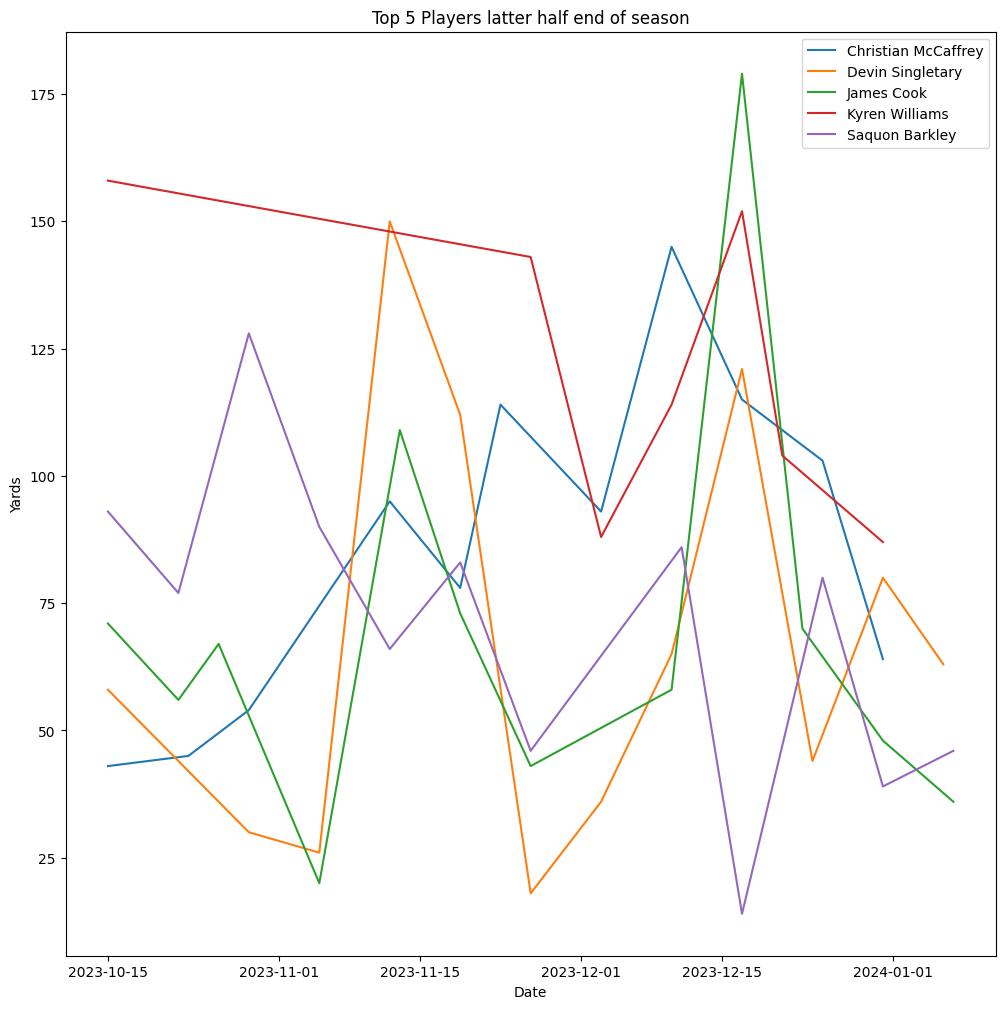

In [252]:
# Who are trending up in rush yards, rush TDs, Rush avg, rec, fantasy points past 3 months?
# column_names = [CAR, RUSH_YDS, RUSH_TD, RUSH_AVG, REC, fantasy_points]

# Make sure data is organized by date so line chart will portray correctly
RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.sort_values(by='Date')

# Find last date in dataset
last_date = RunningbackWeektoWeek2023['Date'].max()

# Create a variable that contains the date two months previous than the last game of 2023/24 season.
two_months_ago = last_date - timedelta(days=90)

# Only include data that is after the two month cutoff period.
filteredDate_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023[RunningbackWeektoWeek2023['Date'] >= two_months_ago]

# Remove date due to limitations from groupby
Top_10_players = filteredDate_RunningbackWeektoWeek2023.drop(columns=['Date'])

# Find Top 10 players from the last two months of season.
Top_10_players = Top_10_players.groupby('playerName', as_index=False).sum().sort_values(by='RUSH_YDS', ascending=False).head(5)

# Take players name from df
Top_10_players_names = Top_10_players['playerName']

# Keep only rows in the original DataFrame for the filtered players
filteredDate_RunningbackWeektoWeek2023 = filteredDate_RunningbackWeektoWeek2023[filteredDate_RunningbackWeektoWeek2023['playerName'].isin(Top_10_players_names)]

grouped_by_player = filteredDate_RunningbackWeektoWeek2023.groupby('playerName')

## Create a line plot for each player
for player, group in grouped_by_player:
    plt.plot(group['Date'], group['RUSH_YDS'], label=player)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Yards')
plt.title('Top 5 Players latter half end of season')
plt.legend(loc='best')  # 'best' location for the legend

# Show the plot
plt.show()

## Conclusion: Plot explains the conclusion.

In [253]:
# 15. Based on PPR value alone, who is the most valuable? 

# Remove text columns for correlation statistics.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

Correlation_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='REC', ascending=False).head(10)

CAR  RUSH_YDS  RUSH_AVG  RUSH_TD  RUSH_LNG  REC  TGTS  \
playerName                                                                   
Breece Hall          223       994      73.0        5       410   76    95   
Alvin Kamara         180       694      50.1        5       165   75    86   
Christian McCaffrey  272      1459      85.4       14       430   67    83   
Rachaad White        272       990      62.1        6       254   64    70   
Jaylen Warren        149       784      83.5        4       289   61    74   
Tony Pollard         252      1005      68.9        6       279   55    67   
Bijan Robinson       200       871      66.1        4       238   53    81   
Jahmyr Gibbs         182       945      78.1       10       325   52    71   
Joe Mixon            257      1034      68.9        9       260   52    64   
Austin Ekeler        179       628      47.9        5       195   51    74   

                     REC_YDS  REC_AVG  REC_TD  LNG_REC  FUM  LST  \
playerName                                                         
Breece Hall              591    134.4       4      280    2    0   
Alvin Kamara             466     81.9       1      182    0    0   
Christian McCaffrey      564    138.1       7      289    3    2   
Rachaad White            549    161.4       3      293    3    2   
Jaylen Warren            370     94.2       0      193    4    2   
Tony Pollard             311     78.0       0      194    3    1   
Bijan Robinson           455    111.6       4      264    4    3   
Jahmyr Gibbs             316     67.8       1      131    2    1   
Joe Mixon                376    124.8       3      255    0    0   
Austin Ekeler            436    105.9       1      232    5    4   

                     Winner Score  Loser Score  fantasy_points       REC%  
playerName                                                                 
Breece Hall                   420          203           250.5  12.916667  
Alvin Kamara                  362          199           189.5  11.394048  
Christian McCaffrey           506          242           357.8  13.582143  
Rachaad White                 417          256           235.9  15.730952  
Jaylen Warren                 398          230           165.9  13.850000  
Tony Pollard                  581          243           193.1  13.223810  
Bijan Robinson                403          261           201.1   9.564286  
Jahmyr Gibbs                  460          304           216.1  10.232540  
Joe Mixon                     468          282           239.0  13.757143  
Austin Ekeler                 374          226           159.9   9.371429

In [256]:
# What about most valuable receiving RB (include TDs and YDs)?

scoring = {

# Receiving
'REC':0.5,
'REC_YDS':0.1,
'REC_TD':6

}

# What did each player get for those scoring areas?

def calculate_fantasy_points(row):
    fantasy_points = 0
    for stat, value in scoring.items():
        fantasy_points += row[stat] * value

    return fantasy_points

# Run function and then add to dataframe
RunningbackWeektoWeek2023['PPR_fantasy_points'] = RunningbackWeektoWeek2023.apply(calculate_fantasy_points, axis=1)


# Remove text columns for correlation statistics.
Correlation_RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.drop(columns=['Date',	'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

Correlation_RunningbackWeektoWeek2023.groupby('playerName').sum().sort_values(by='PPR_fantasy_points', ascending=False).head(10)

CAR  RUSH_YDS  RUSH_AVG  RUSH_TD  RUSH_LNG  REC  TGTS  \
playerName                                                                   
Christian McCaffrey  272      1459      85.4       14       430   67    83   
Breece Hall          223       994      73.0        5       410   76    95   
Rachaad White        272       990      62.1        6       254   64    70   
Bijan Robinson       200       871      66.1        4       238   53    81   
Alvin Kamara         180       694      50.1        5       165   75    86   
James Cook           232      1126      75.8        2       287   41    50   
Jerome Ford          204       813      65.6        4       352   44    63   
Joe Mixon            257      1034      68.9        9       260   52    64   
Brian Robinson Jr.   178       733      63.1        5       227   36    43   
Austin Ekeler        179       628      47.9        5       195   51    74   

                     REC_YDS  REC_AVG  REC_TD  LNG_REC  FUM  LST  \
playerName                                                         
Christian McCaffrey      564    138.1       7      289    3    2   
Breece Hall              591    134.4       4      280    2    0   
Rachaad White            549    161.4       3      293    3    2   
Bijan Robinson           455    111.6       4      264    4    3   
Alvin Kamara             466     81.9       1      182    0    0   
James Cook               420    158.0       4      237    4    2   
Jerome Ford              319    119.7       5      203    1    1   
Joe Mixon                376    124.8       3      255    0    0   
Brian Robinson Jr.       368    110.8       4      221    4    2   
Austin Ekeler            436    105.9       1      232    5    4   

                     Winner Score  Loser Score  fantasy_points       REC%  \
playerName                                                                  
Christian McCaffrey           506          242           357.8  13.582143   
Breece Hall                   420          203           250.5  12.916667   
Rachaad White                 417          256           235.9  15.730952   
Bijan Robinson                403          261           201.1   9.564286   
Alvin Kamara                  362          199           189.5  11.394048   
James Cook                    452          265           207.1  11.690476   
Jerome Ford                   480          278           187.2  11.402381   
Joe Mixon                     468          282           239.0  13.757143   
Brian Robinson Jr.            477          264           178.1  10.111111   
Austin Ekeler                 374          226           159.9   9.371429   

                     PPR_fantasy_points  
playerName                               
Christian McCaffrey               131.9  
Breece Hall                       121.1  
Rachaad White                     104.9  
Bijan Robinson                     96.0  
Alvin Kamara                       90.1  
James Cook                         86.5  
Jerome Ford                        83.9  
Joe Mixon                          81.6  
Brian Robinson Jr.                 78.8  
Austin Ekeler                      75.1

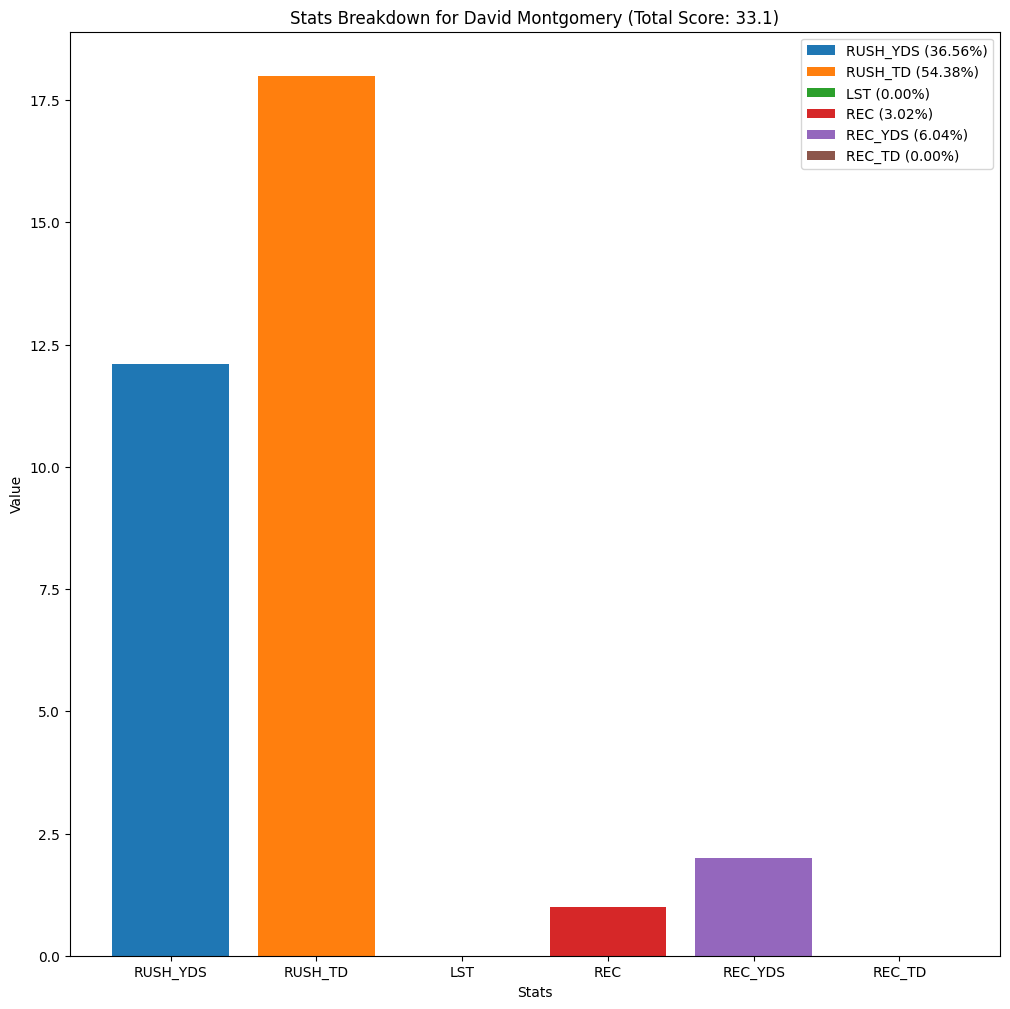

In [274]:
# 16. What stat(s) is contributing to high fantasy scores? Who are the leaders in that stat(s)?

# Sort the DataFrame by 'Total_Score' in descending order
RunningbackWeektoWeek2023 = RunningbackWeektoWeek2023.sort_values(by='fantasy_points', ascending=False)

# Select the top player for visualization (you can choose any player)
top_player = RunningbackWeektoWeek2023.iloc[7]

# Calculate the percentage contribution of each stat to the final score
RUSH_YDS_pct = (top_player['RUSH_YDS'] * 0.1 / top_player['fantasy_points']) * 100
RUSH_TD_pct = (top_player['RUSH_TD'] * 6 / top_player['fantasy_points']) * 100
LST_pct = (top_player['LST'] * -2 / top_player['fantasy_points']) * 100
REC_pct = (top_player['REC'] * 0.5 / top_player['fantasy_points']) * 100
REC_YDS_pct = (top_player['REC_YDS'] * 0.1 / top_player['fantasy_points']) * 100
REC_TD_pct = (top_player['REC_TD'] * 6 / top_player['fantasy_points']) * 100

# Create a stacked bar chart to visualize the stats and their percentages
fig, ax = plt.subplots()

# Plot the individual stats as bars
ax.bar('RUSH_YDS', top_player['RUSH_YDS'] * 0.1, label=f'RUSH_YDS ({RUSH_YDS_pct:.2f}%)')
ax.bar('RUSH_TD', top_player['RUSH_TD'] * 6, label=f'RUSH_TD ({RUSH_TD_pct:.2f}%)')
ax.bar('LST', top_player['LST']  * -2, label=f'LST ({LST_pct:.2f}%)')
ax.bar('REC', top_player['REC']  * 0.5, label=f'REC ({REC_pct:.2f}%)')
ax.bar('REC_YDS', top_player['REC_YDS'] * 0.1, label=f'REC_YDS ({REC_YDS_pct:.2f}%)')
ax.bar('REC_TD', top_player['REC_TD'] * 6, label=f'REC_TD ({REC_TD_pct:.2f}%)')

# Add labels and legend
ax.set_xlabel('Stats')
ax.set_ylabel('Value')
ax.set_title(f'Stats Breakdown for {top_player["playerName"]} (Total Score: {top_player["fantasy_points"]})')
ax.legend()

# Show the plot
plt.show()

## Receiver Exploration Questions

In [280]:
# 1. Who are the leading receivers in dataset with big rushing totals?

Correlation_ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop(columns=['Date', 'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

top_receiving_ReceiverWeektoWeek2023 = Correlation_ReceiverWeektoWeek2023.groupby('playerName').sum().sort_values(by='REC_YDS', ascending=False).head(10)

top_rushing_ReceiverWeektoWeek2023 = Correlation_ReceiverWeektoWeek2023.groupby('playerName').sum().sort_values(by='RUSH_YDS', ascending=False).head(10)

top_receiving_ReceiverWeektoWeek2023['TD Leader'] = 'Receiving'
top_rushing_ReceiverWeektoWeek2023['TD Leader'] = 'Rushing'

Final = pd.concat([top_receiving_ReceiverWeektoWeek2023, top_rushing_ReceiverWeektoWeek2023], axis=0).sort_values(by='fantasy_points', ascending=False)


Final.head(10)

REC  TGTS  REC_YDS  REC_AVG  REC_TD  LNG_REC  CAR  \
playerName                                                             
CeeDee Lamb        135   181     1749    221.3      12      516   14   
CeeDee Lamb        135   181     1749    221.3      12      516   14   
Tyreek Hill        111   161     1737    244.0      13      565    5   
Amon-Ra St. Brown  119   164     1515    219.0      10      463    4   
Puka Nacua         105   160     1486    241.1       6      525   12   
Puka Nacua         105   160     1486    241.1       6      525   12   
Mike Evans          79   136     1255    258.0      13      522    0   
DJ Moore            96   136     1364    233.9       8      466    4   
A.J. Brown         106   158     1456    218.8       7      451    0   
Nico Collins        80   109     1297    229.7       8      452    1   

                   RUSH_YDS  RUSH_AVG  LNG_RUSH  RUSH_TD  FUM  LST  \
playerName                                                           
CeeDee Lamb             113      86.5       102        2    3    2   
CeeDee Lamb             113      86.5       102        2    3    2   
Tyreek Hill              12      14.0        22        0    0    0   
Amon-Ra St. Brown        24      19.5        21        0    1    1   
Puka Nacua               89      51.0        74        0    1    0   
Puka Nacua               89      51.0        74        0    1    0   
Mike Evans                0       0.0         0        0    0    0   
DJ Moore                 21       7.7        17        1    1    1   
A.J. Brown                0       0.0         0        0    2    2   
Nico Collins              7       7.0         7        0    1    0   

                   Winner Score  Loser Score  fantasy_points       REC%  \
playerName                                                                
CeeDee Lamb                 581          243           333.7  12.696306   
CeeDee Lamb                 581          243           333.7  12.696306   
Tyreek Hill                 539          283           308.4  10.399373   
Amon-Ra St. Brown           480          310           271.4  11.366570   
Puka Nacua                  476          305           246.0  10.838672   
Puka Nacua                  476          305           246.0  10.838672   
Mike Evans                  417          256           243.0  10.302778   
DJ Moore                    468          271           238.5  11.965049   
A.J. Brown                  506          355           236.6  11.632756   
Nico Collins                400          238           218.4  11.156818   

                   TD Leader  
playerName                    
CeeDee Lamb        Receiving  
CeeDee Lamb          Rushing  
Tyreek Hill        Receiving  
Amon-Ra St. Brown  Receiving  
Puka Nacua         Receiving  
Puka Nacua           Rushing  
Mike Evans         Receiving  
DJ Moore           Receiving  
A.J. Brown         Receiving  
Nico Collins       Receiving

In [ ]:
# 2. Are QBS fantasy scoring more than the RB and WR? Meaning better RB & WR will give you more distribution from mean?

Correlation_ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop(columns=['Date', 'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

top_receiving_ReceiverWeektoWeek2023 = Correlation_ReceiverWeektoWeek2023.groupby('playerName').sum().sort_values(by='REC_YDS', ascending=False).head(10)

top_receiving_ReceiverWeektoWeek2023 = Correlation_ReceiverWeektoWeek2023.groupby('playerName').sum().sort_values(by='REC_YDS', ascending=False).head(10)


In [ ]:
# 3. How do TEs compare to WRs?

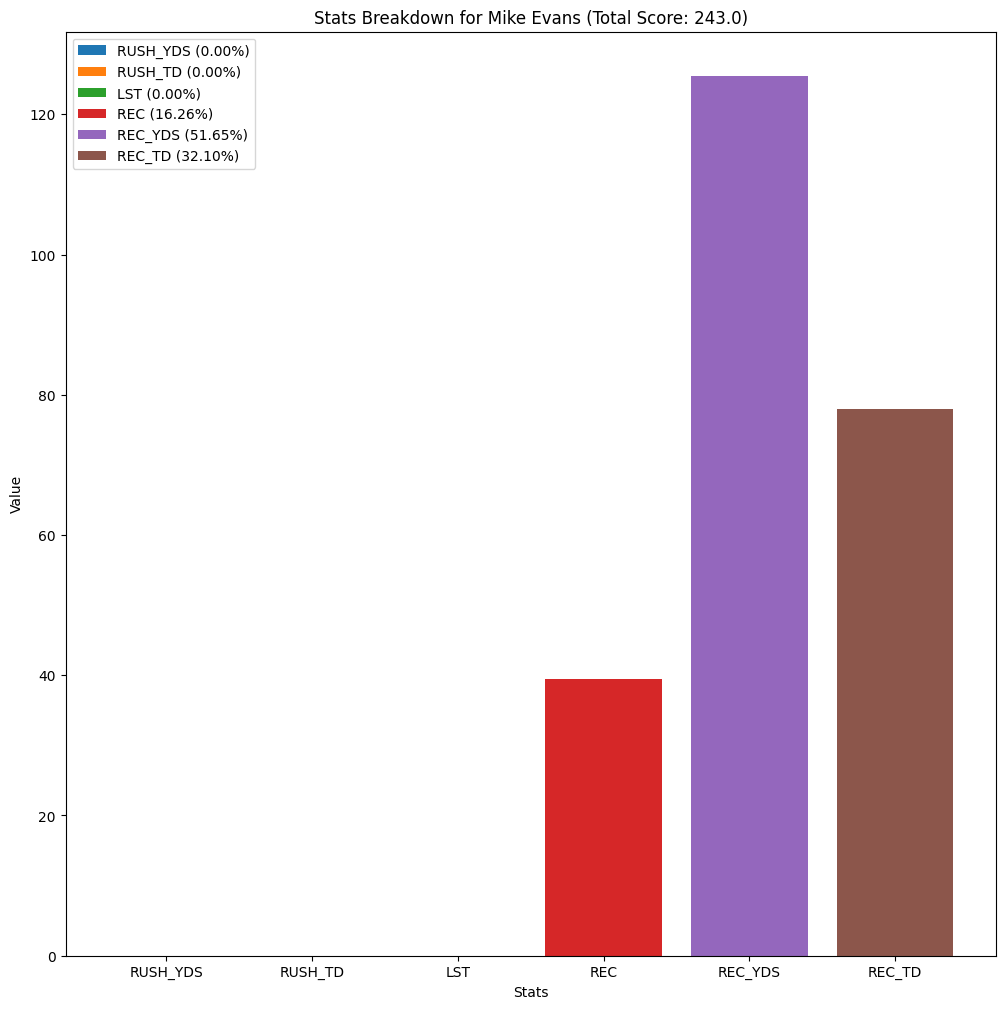

In [289]:
# 4. Where do most receiver points come from?

groupby_ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop(columns=['Date', 'Opponent', 'Game Result', 'OT?', 'Home/Away', 'FF', 'KB'])

groupby_ReceiverWeektoWeek2023 = groupby_ReceiverWeektoWeek2023.groupby('playerName', as_index=False).sum().sort_values(by='fantasy_points', ascending=False).head(5)

# Sort the DataFrame by 'Total_Score' in descending order
groupby_ReceiverWeektoWeek2023 = groupby_ReceiverWeektoWeek2023.sort_values(by='fantasy_points', ascending=False)

# Select the top player for visualization (you can choose any player)
top_player = groupby_ReceiverWeektoWeek2023.iloc[4]

# Calculate the percentage contribution of each stat to the final score
RUSH_YDS_pct = (top_player['RUSH_YDS'] * 0.1 / top_player['fantasy_points']) * 100
RUSH_TD_pct = (top_player['RUSH_TD'] * 6 / top_player['fantasy_points']) * 100
LST_pct = (top_player['LST'] * -2 / top_player['fantasy_points']) * 100
REC_pct = (top_player['REC'] * 0.5 / top_player['fantasy_points']) * 100
REC_YDS_pct = (top_player['REC_YDS'] * 0.1 / top_player['fantasy_points']) * 100
REC_TD_pct = (top_player['REC_TD'] * 6 / top_player['fantasy_points']) * 100

# Create a stacked bar chart to visualize the stats and their percentages
fig, ax = plt.subplots()

# Plot the individual stats as bars
ax.bar('RUSH_YDS', top_player['RUSH_YDS'] * 0.1, label=f'RUSH_YDS ({RUSH_YDS_pct:.2f}%)')
ax.bar('RUSH_TD', top_player['RUSH_TD'] * 6, label=f'RUSH_TD ({RUSH_TD_pct:.2f}%)')
ax.bar('LST', top_player['LST']  * -2, label=f'LST ({LST_pct:.2f}%)')
ax.bar('REC', top_player['REC']  * 0.5, label=f'REC ({REC_pct:.2f}%)')
ax.bar('REC_YDS', top_player['REC_YDS'] * 0.1, label=f'REC_YDS ({REC_YDS_pct:.2f}%)')
ax.bar('REC_TD', top_player['REC_TD'] * 6, label=f'REC_TD ({REC_TD_pct:.2f}%)')

# Add labels and legend
ax.set_xlabel('Stats')
ax.set_ylabel('Value')
ax.set_title(f'Stats Breakdown for {top_player["playerName"]} (Total Score: {top_player["fantasy_points"]})')
ax.legend()

# Show the plot
plt.show()

In [295]:
# 6. Who are the outliers when it comes to Rec_YDs, receptions, and reception tds?

Groupby_ReceiverWeektoWeek2023 = ReceiverWeektoWeek2023.drop(columns=['Date',  'Opponent', 'Game Result', 'OT?', 'Home/Away'])
Groupby_ReceiverWeektoWeek2023 = Groupby_ReceiverWeektoWeek2023.groupby('playerName').sum()

# Assuming you have a DataFrame 'data' with a column 'value' containing your data
# Calculate the IQR (Interquartile Range)
Q1 = Groupby_ReceiverWeektoWeek2023['REC_YDS'].quantile(0.25)
Q3 = Groupby_ReceiverWeektoWeek2023['REC_YDS'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers using the lower and upper bounds
outliers = Groupby_ReceiverWeektoWeek2023[Groupby_ReceiverWeektoWeek2023['REC_YDS'] > upper_bound]

outliers.sort_values(by='REC_YDS', ascending=False)

REC  TGTS  REC_YDS  REC_AVG  REC_TD  LNG_REC  CAR  RUSH_YDS  \
playerName                                                                 
CeeDee Lamb  135   181     1749    221.3      12      516   14       113   
Tyreek Hill  111   161     1737    244.0      13      565    5        12   

             RUSH_AVG  LNG_RUSH  RUSH_TD  FUM  LST  FF  KB  Winner Score  \
playerName                                                                 
CeeDee Lamb      86.5       102        2    3    2   0   0           581   
Tyreek Hill      14.0        22        0    0    0   0   0           539   

             Loser Score  fantasy_points       REC%  
playerName                                           
CeeDee Lamb          243           333.7  12.696306  
Tyreek Hill          283           308.4  10.399373

## Additional Exploration Questions

In [ ]:
# 1. What is the most valuable position in FFB? Take into account the supply and demand.

In [ ]:
# 2. What is percentage of drafting a breakout player early in draft? Late in draft? Early in Waivers? Late in Waivers? 
# Does it vary by position?

## Load cleaned files into CSVs

In [296]:
# Load

QuarterbackWeektoWeek2023.to_csv(r'/Users/jacoblender/Desktop/Football dash/Data/PasserGamelog.csv')
RunningbackWeektoWeek2023.to_csv(r'/Users/jacoblender/Desktop/Football dash/Data/RunningbackGamelog.csv')
ReceiverWeektoWeek2023.to_csv(r'/Users/jacoblender/Desktop/Football dash/Data/ReceiverGamelog.csv')